In [13]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import os
import matplotlib.pyplot as plt

In [4]:
os.chdir('/Users/d260-mb001-wl/ark-analysis/data/hackathon/')

In [5]:
df= pd.read_csv('cell_table_colon.csv')

In [7]:
df.columns

Index(['cell_size', 'label', 'area', 'eccentricity', 'major_axis_length',
       'minor_axis_length', 'perimeter', 'convex_area', 'equivalent_diameter',
       'X', 'Y', 'major_minor_axis_ratio', 'perim_square_over_area',
       'major_axis_equiv_diam_ratio', 'convex_hull_resid', 'centroid_dif',
       'num_concavities', 'fov', 'nucleus_area', 'ASCT2', 'ATP5A', 'CD14',
       'CD163', 'CD20', 'CD31', 'CD36', 'CD3e', 'CD4', 'CD45', 'CD45RO',
       'CD56', 'CD68', 'CD8', 'CD98', 'COL1A1', 'CPT1A', 'CS', 'Calprotectin',
       'Caveolin', 'ChyTry', 'CytC', 'EpCAM', 'Fe', 'FoxP3', 'G6PD', 'GLS',
       'GLUT1', 'HLADR', 'IL17A', 'Ki67', 'LDH', 'MCT1', 'Noodle', 'PD1',
       'PDL1', 'PKM2', 'PanCK', 'SMA', 'Vimentin', 'chan_39', 'chan_48',
       'chan_69', 'chan_71', 'membrane', 'nuclei', 'nucleus_prop'],
      dtype='object')

In [8]:
#define your markers to be normalized
channel_columns=['ASCT2', 'ATP5A', 'CD14',
       'CD163', 'CD20', 'CD31', 'CD36', 'CD3e', 'CD4', 'CD45', 'CD45RO',
       'CD56', 'CD68', 'CD8', 'CD98', 'COL1A1', 'CPT1A', 'CS', 'Calprotectin',
       'Caveolin', 'ChyTry', 'CytC', 'EpCAM', 'Fe', 'FoxP3', 'G6PD', 'GLS',
       'GLUT1', 'HLADR', 'IL17A', 'Ki67', 'LDH', 'MCT1', 'Noodle', 'PD1',
       'PDL1', 'PKM2', 'PanCK', 'SMA', 'Vimentin']

#z normalization per channel:

In [10]:
z_normalized_df = df.copy()
z_normalized_df[channel_columns] = zscore(df[channel_columns])
z_normalized_df.to_csv ('z_normalized_df.csv')

#log(double z) normalization per channel:

In [11]:
#  Z normalization for each row after column normalization
double_z_normalized_df = z_normalized_df.copy()
# Apply Z normalization to each row (excluding non-channel columns)
double_z_normalized_df[channel_columns] = zscore(double_z_normalized_df[channel_columns], axis=1)
#log transform
double_z_normalized_df[channel_columns] =np.log(double_z_normalized_df[channel_columns])
double_z_normalized_df.to_csv('double_z_normalized_df.csv')

/Users/d260-mb001-wl/anaconda3/envs/scyan/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


#arcsinh transformation with a cofactor:

In [12]:
arcsinh_df = df.copy()
cofactor= 150
arcsinh_df[channel_columns] = np.arcsinh(df[channel_columns] * cofactor)
arcsinh_df.to_csv( 'arcsinh_df.csv')

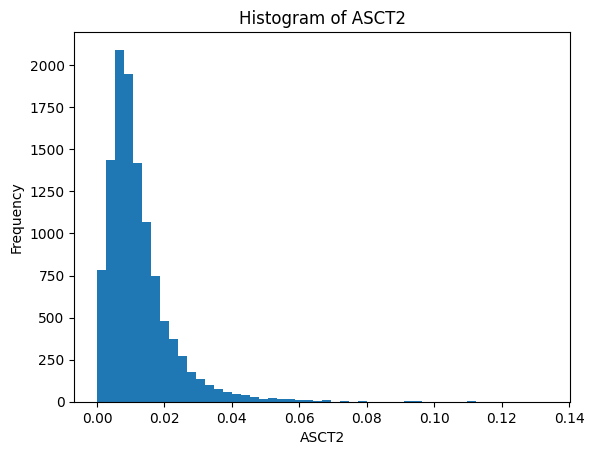

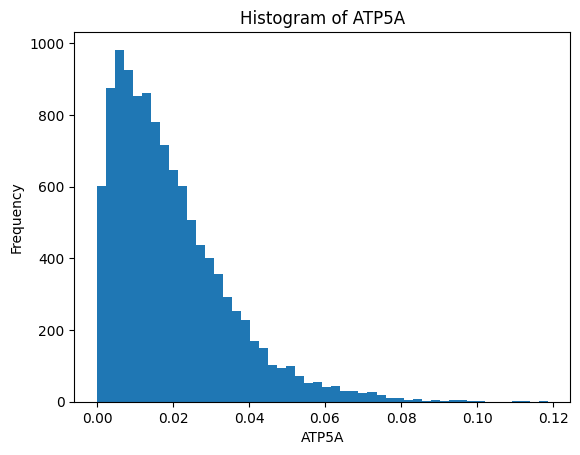

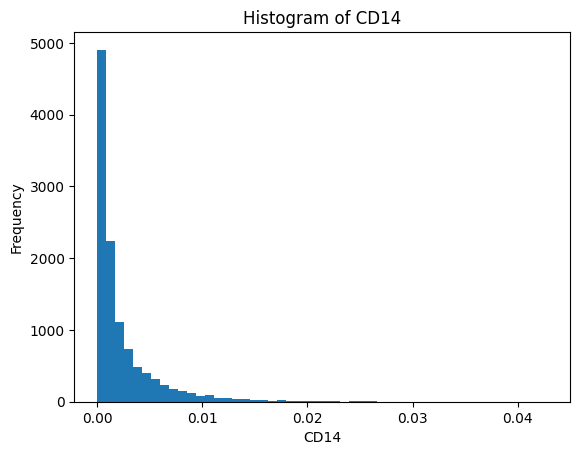

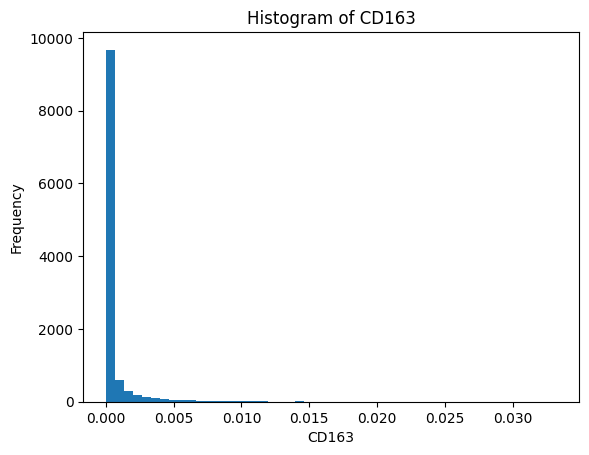

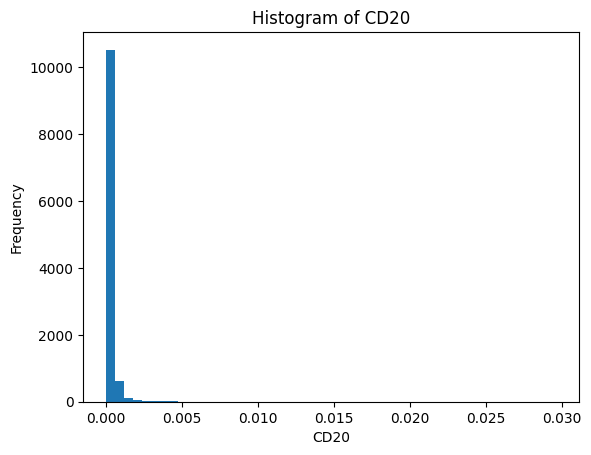

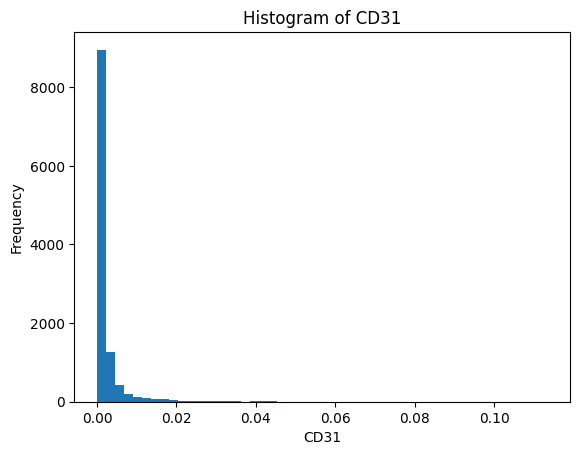

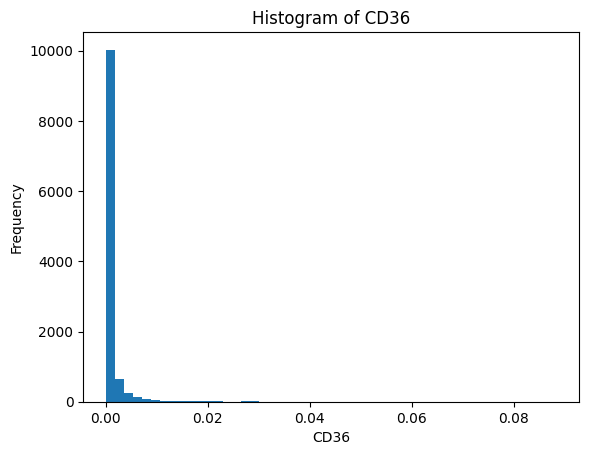

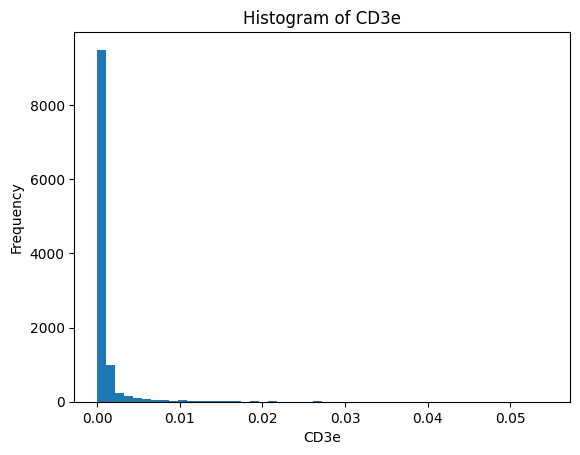

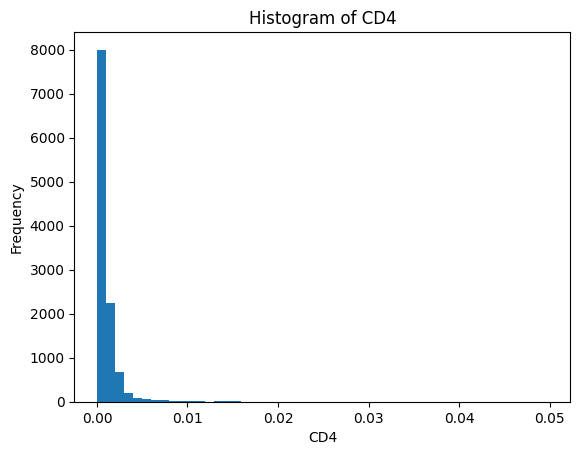

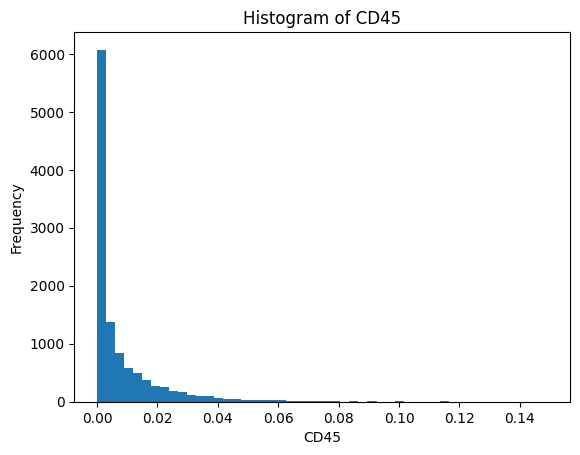

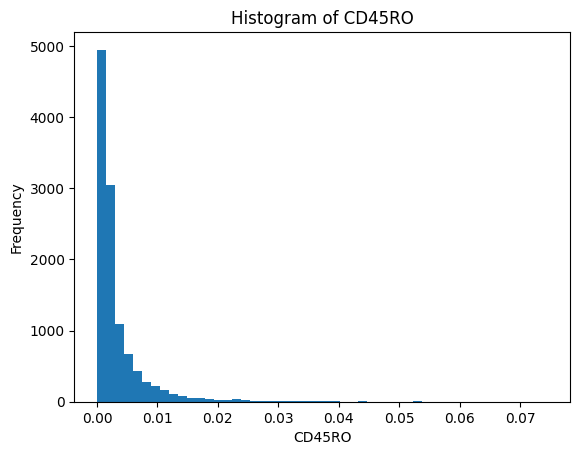

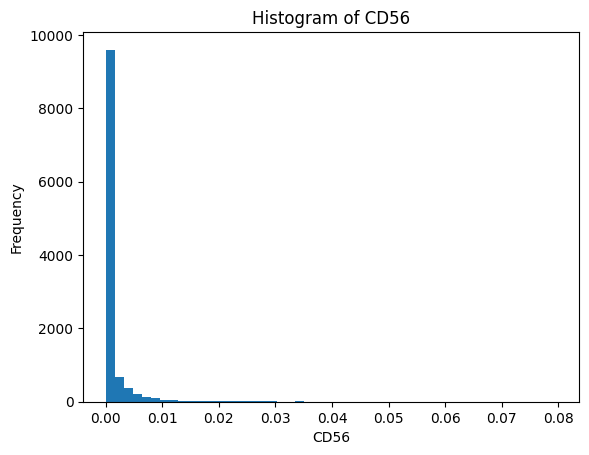

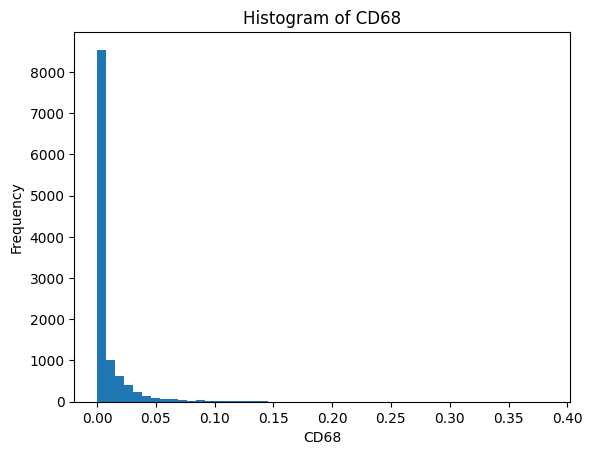

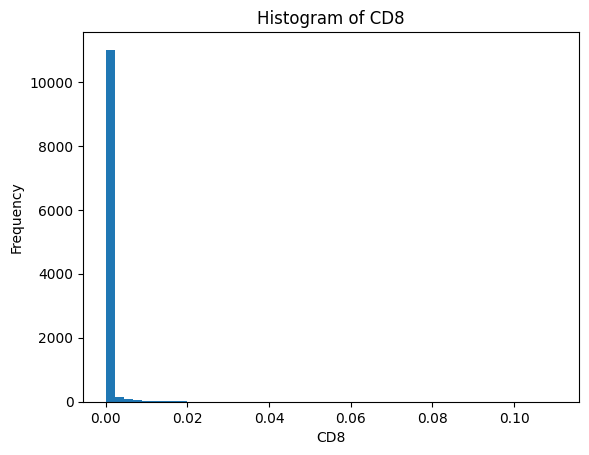

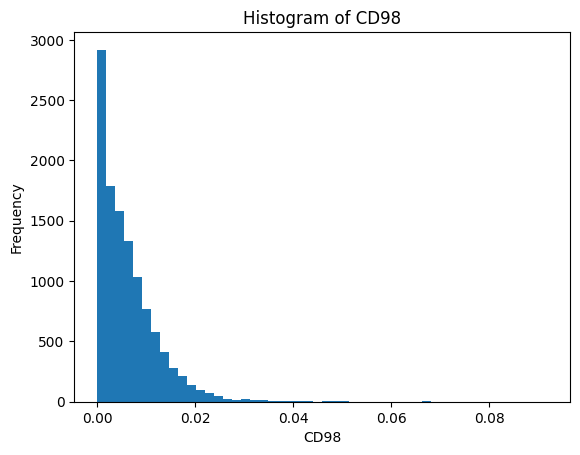

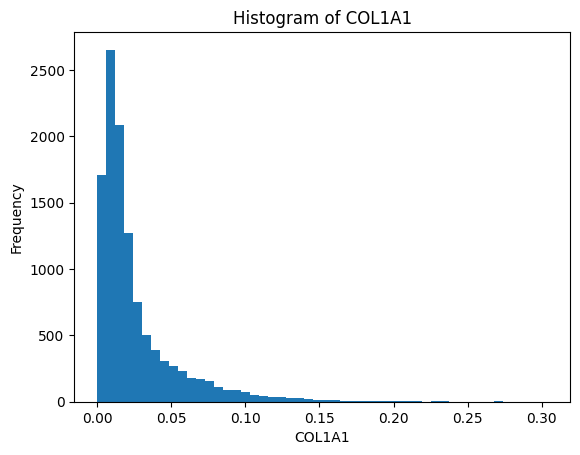

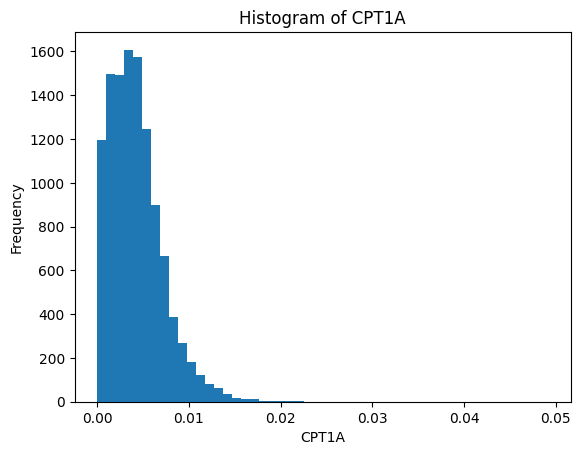

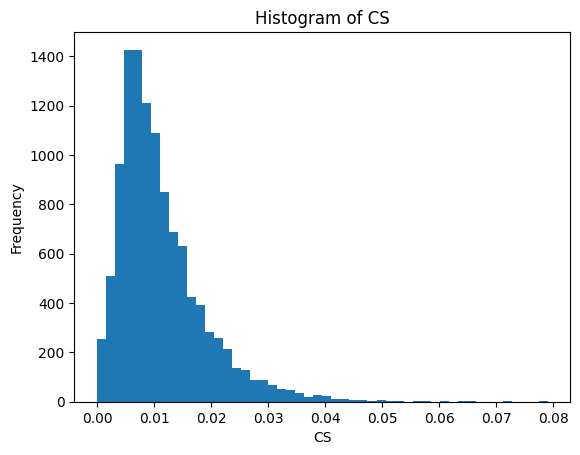

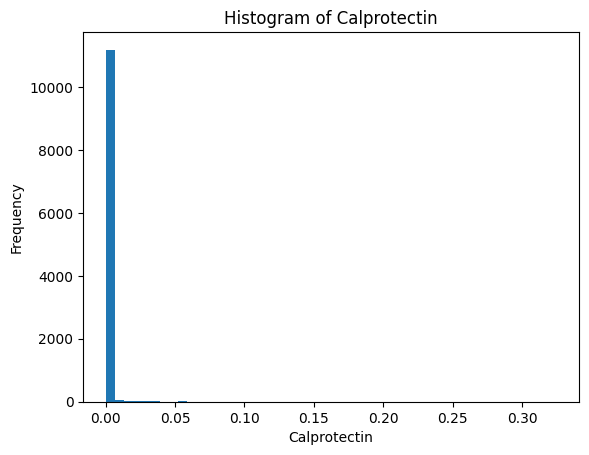

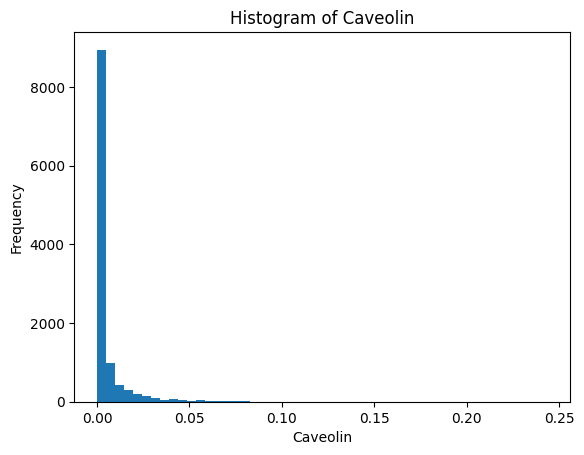

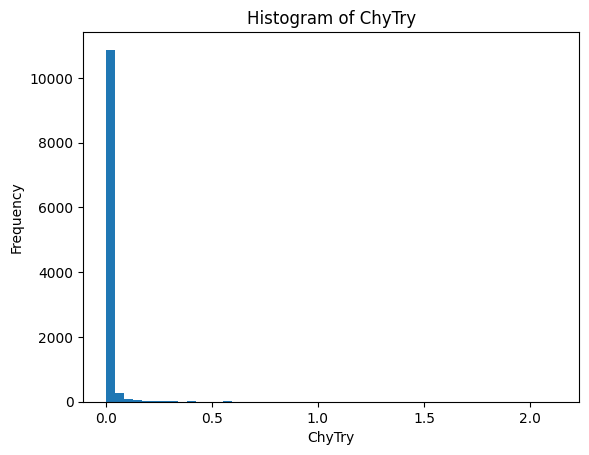

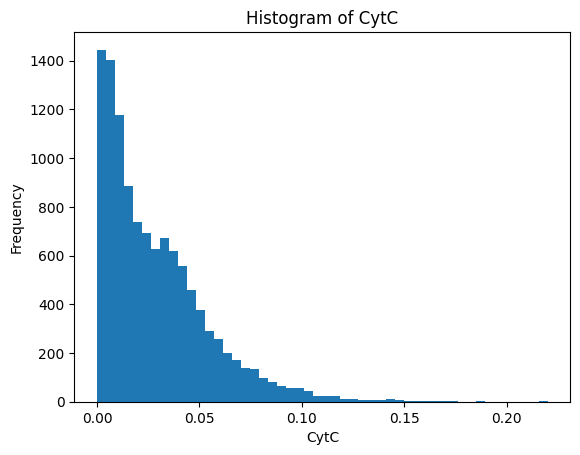

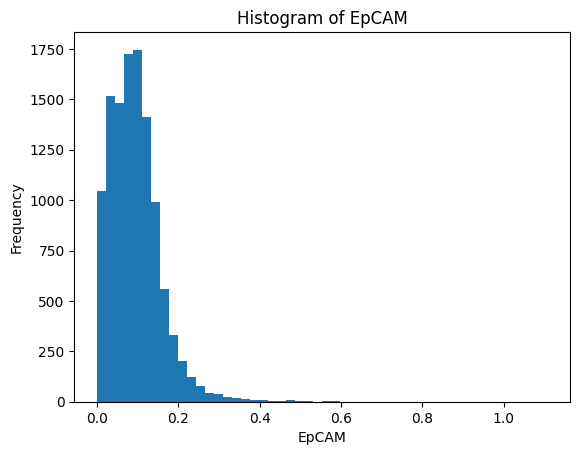

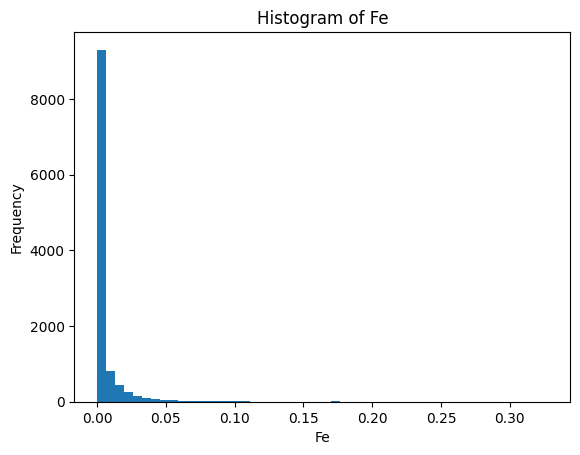

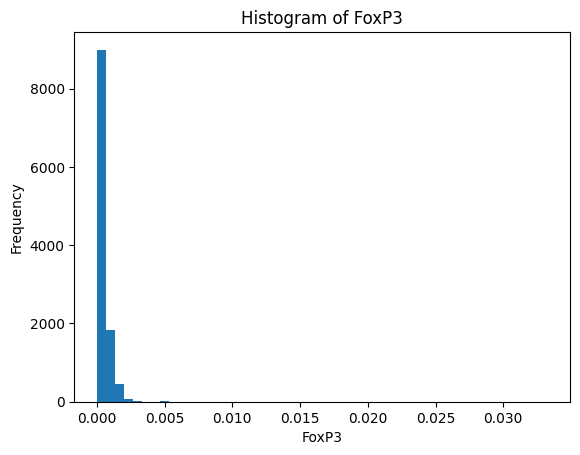

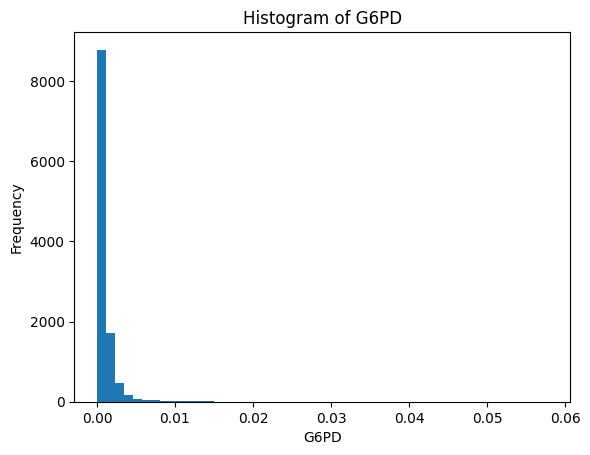

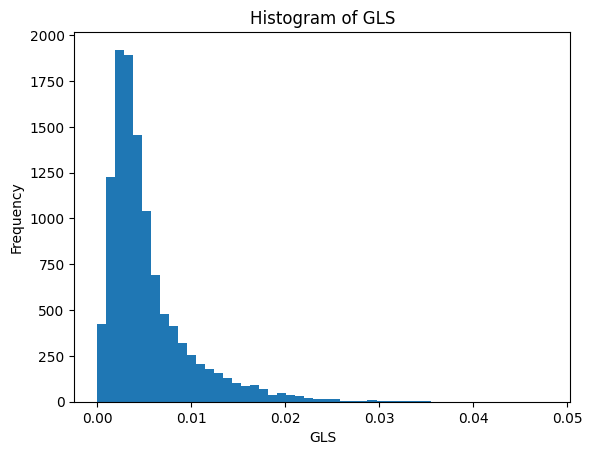

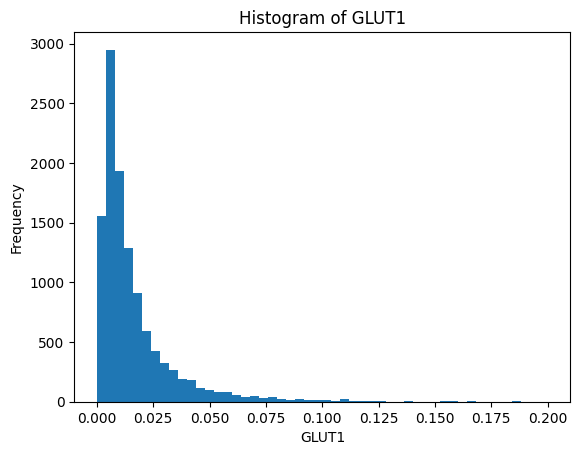

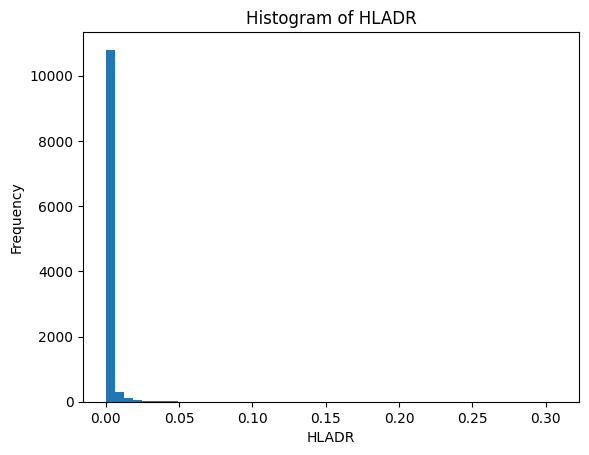

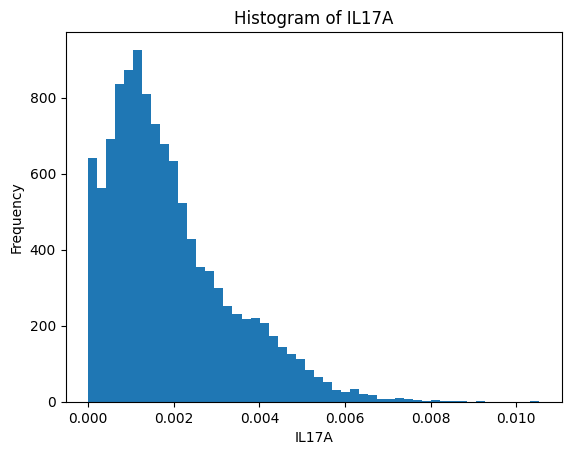

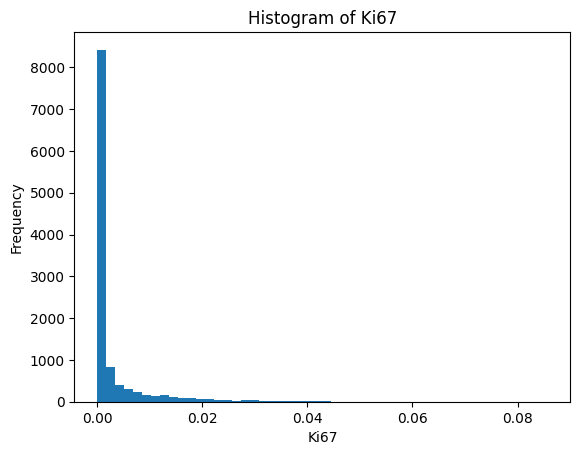

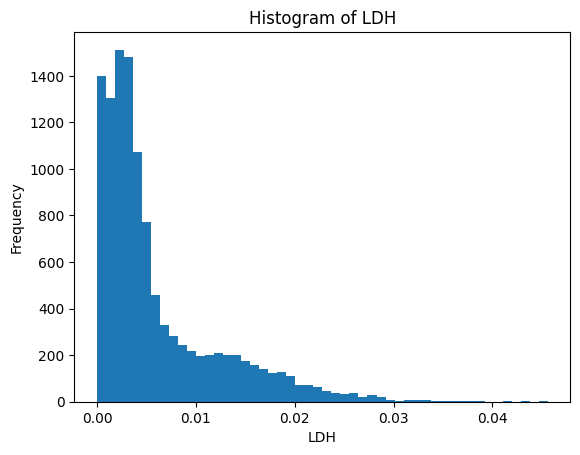

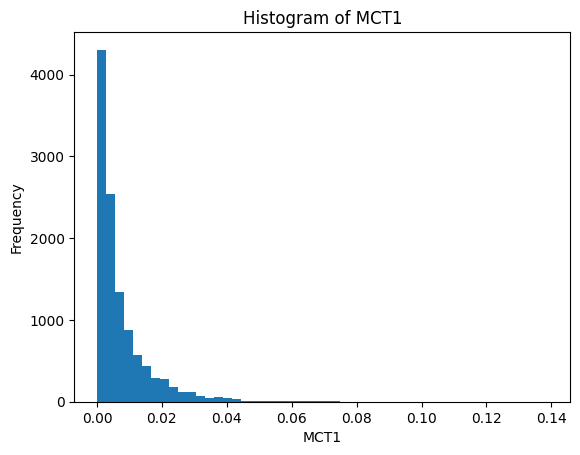

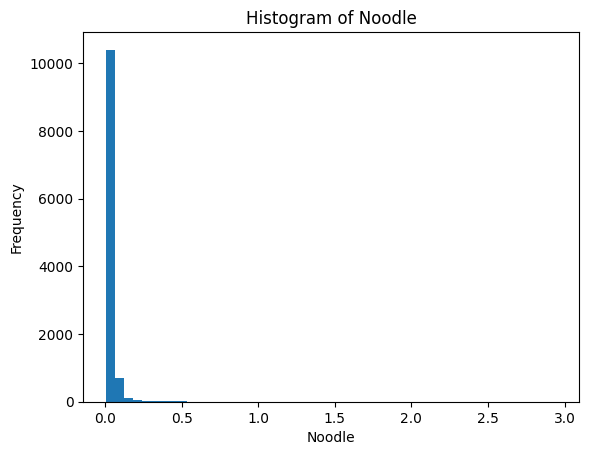

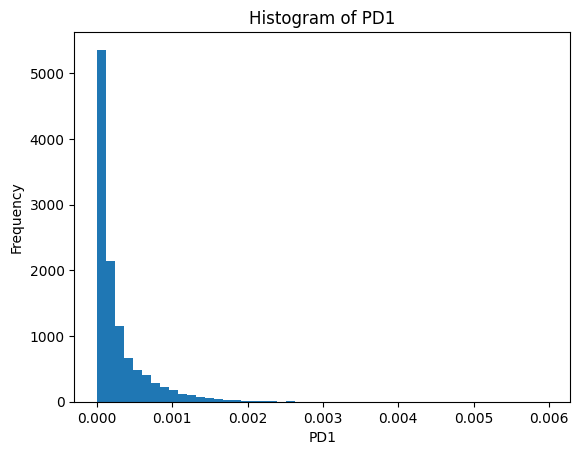

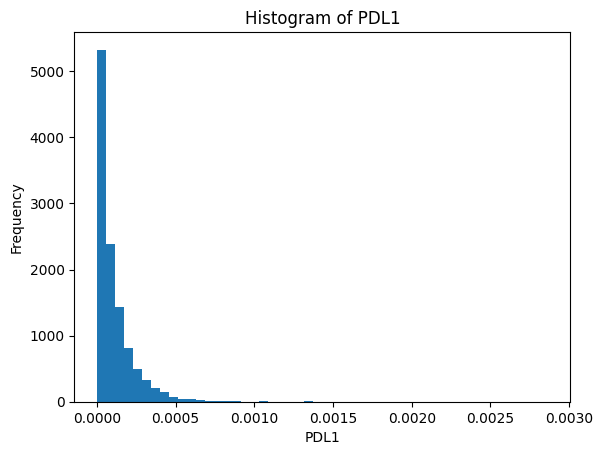

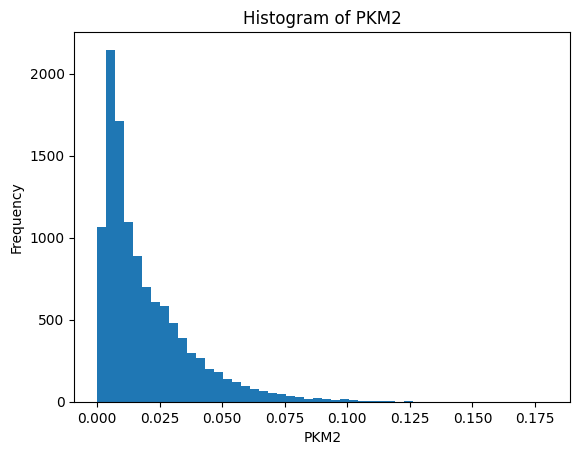

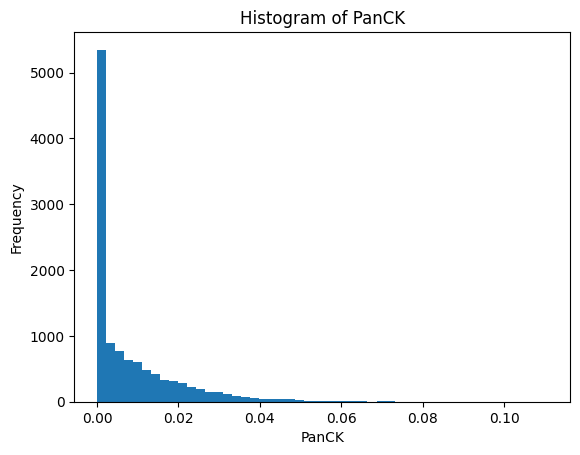

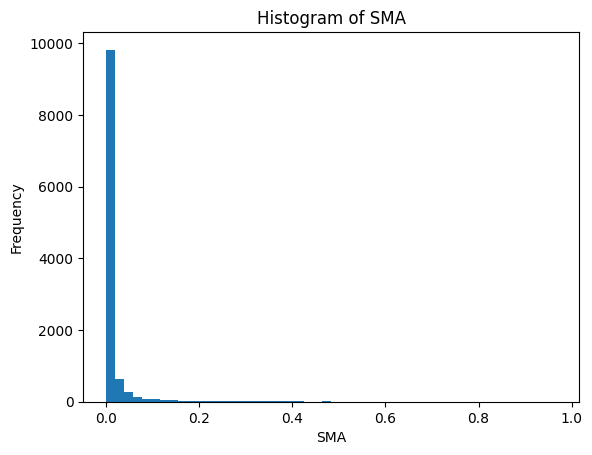

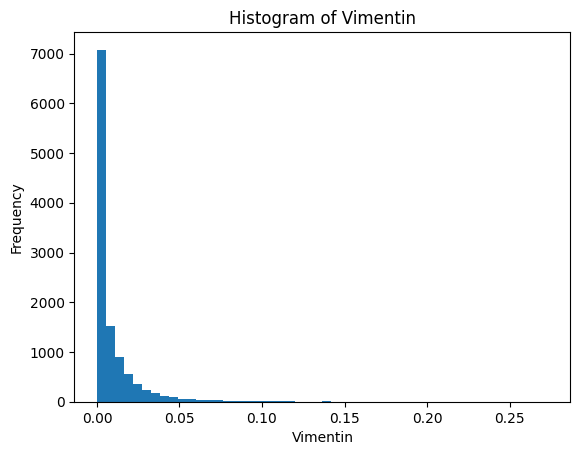

In [14]:

# Create a histogram for each column
for column in channel_columns:
    plt.figure()  
    plt.hist(df[column], bins=50) 
    plt.title(f'Histogram of {column}')  
    plt.xlabel(column)  
    plt.ylabel('Frequency') 
    plt.show()  

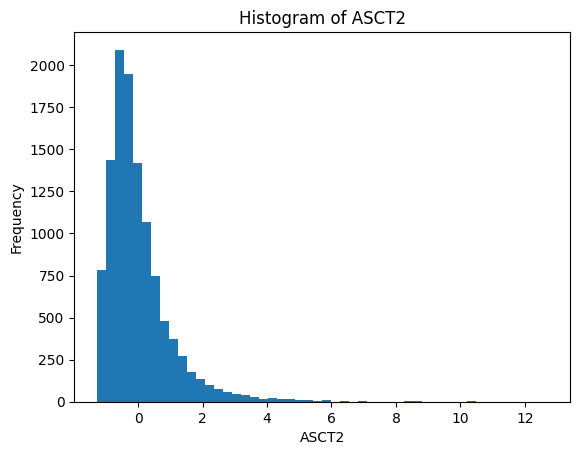

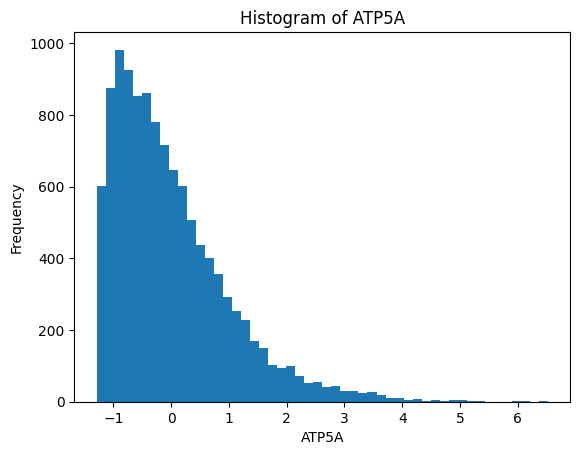

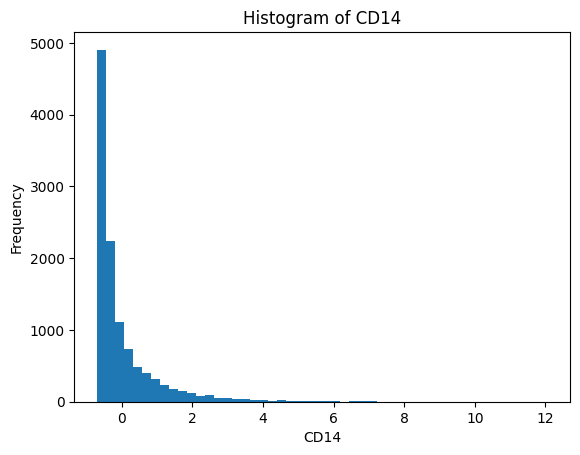

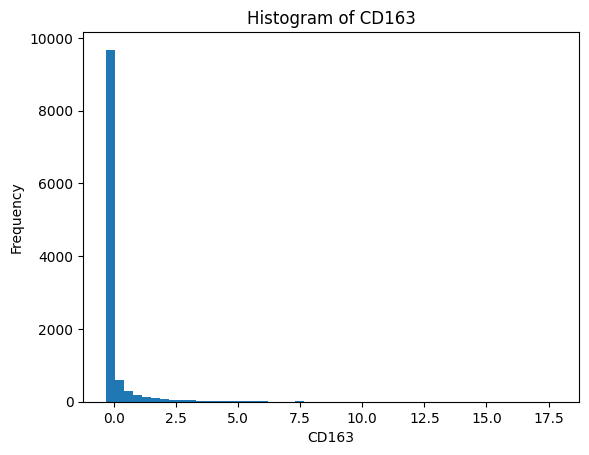

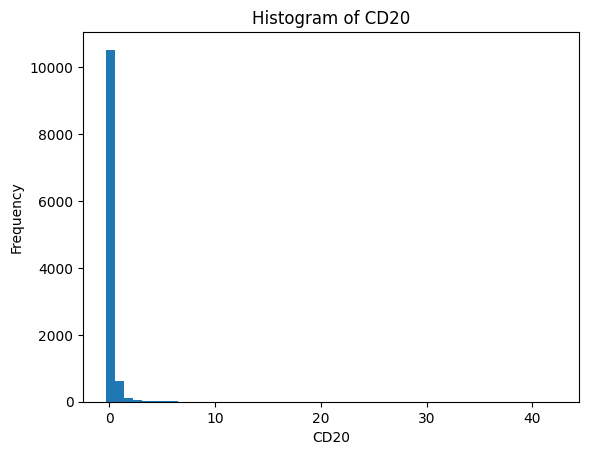

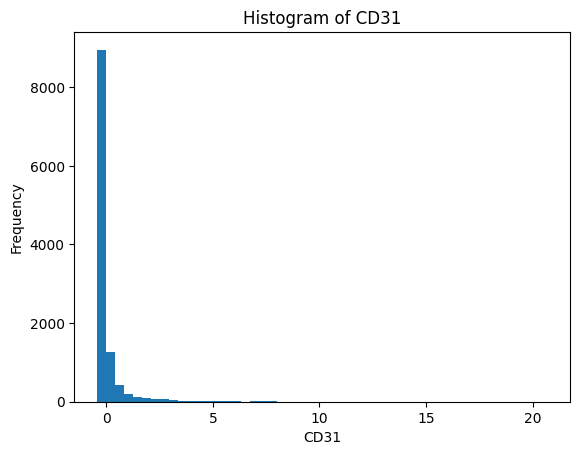

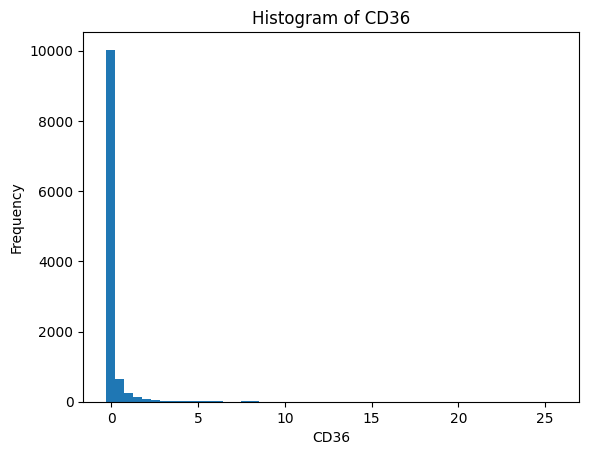

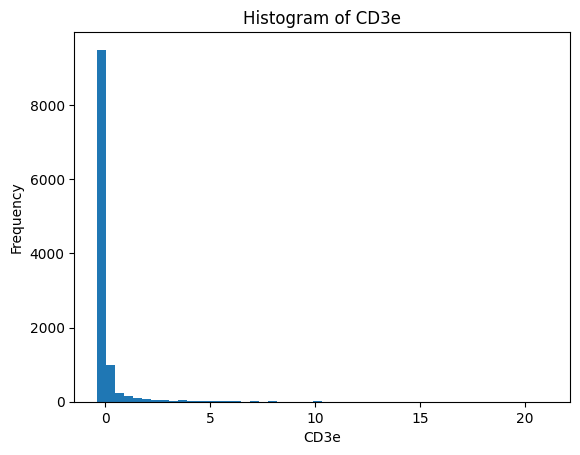

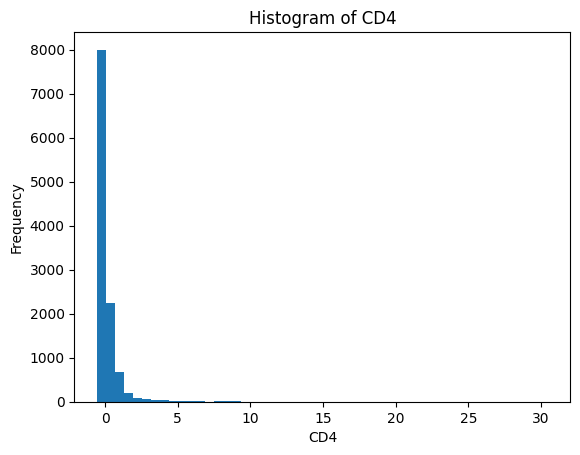

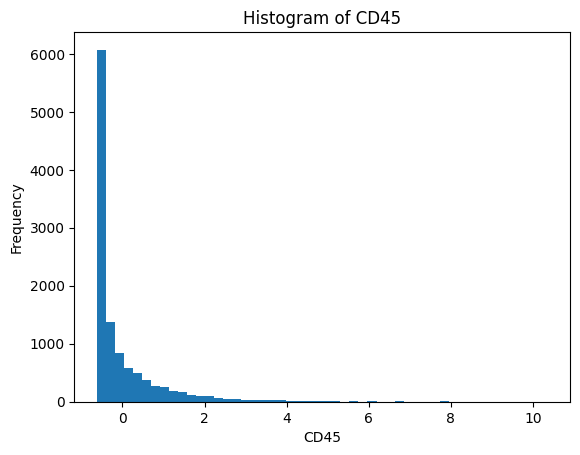

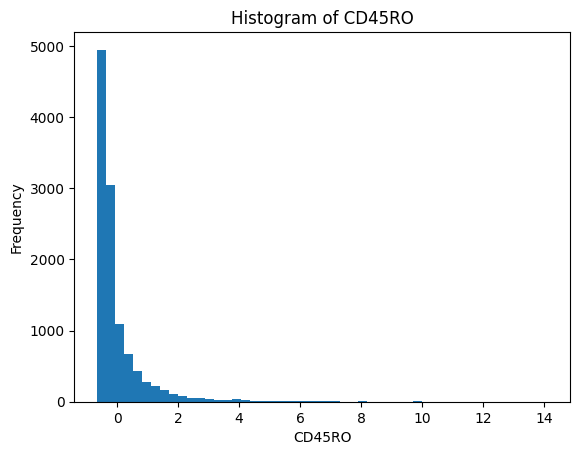

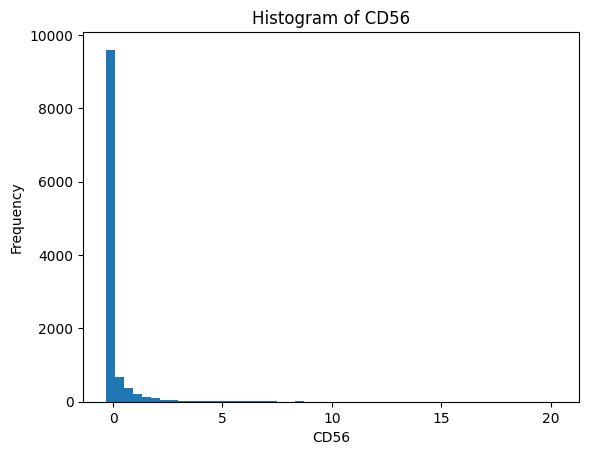

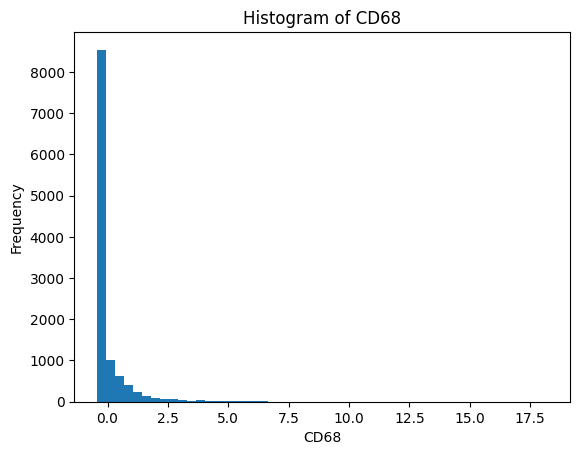

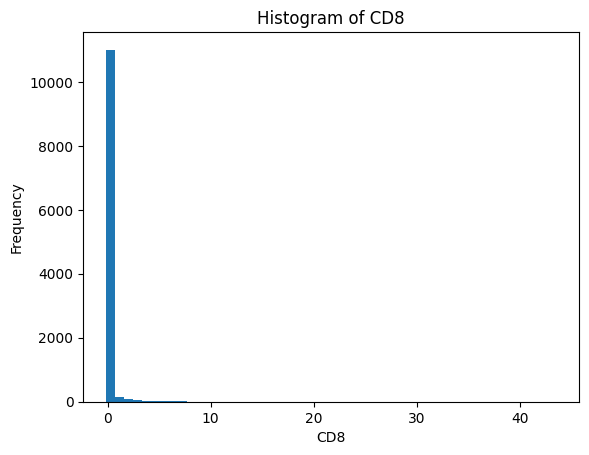

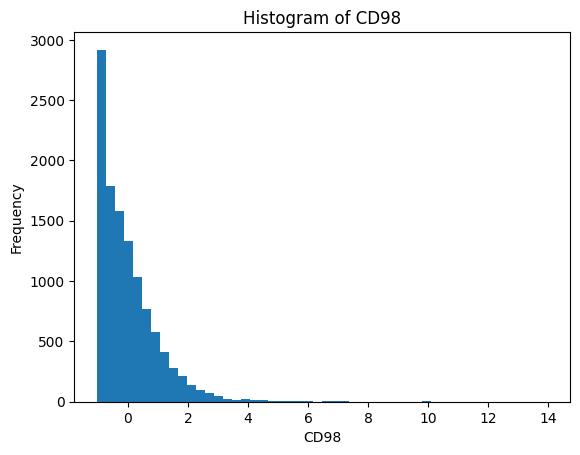

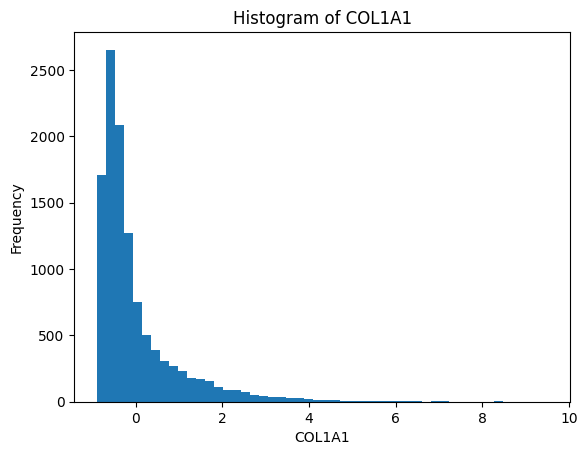

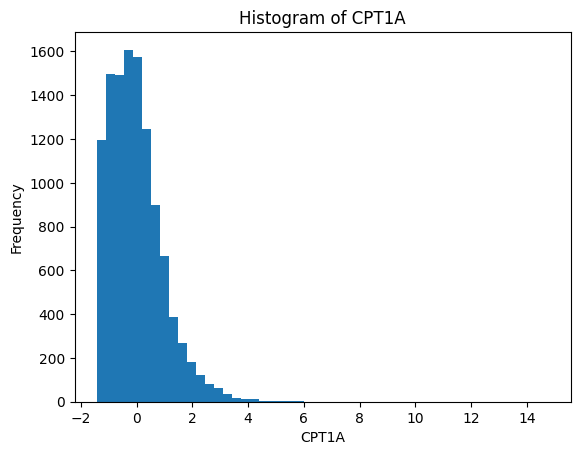

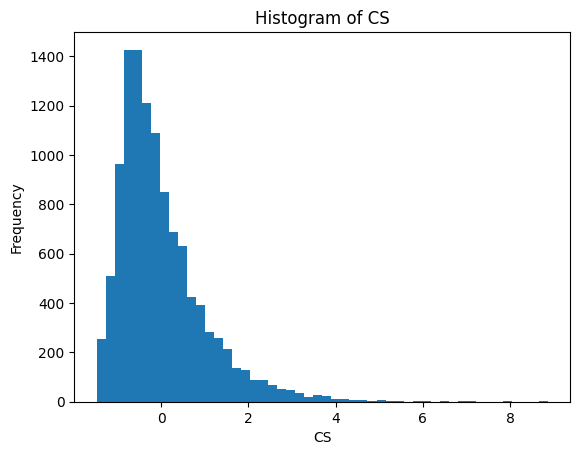

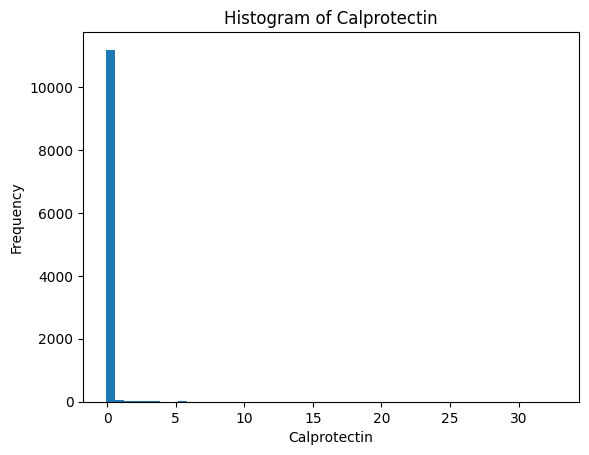

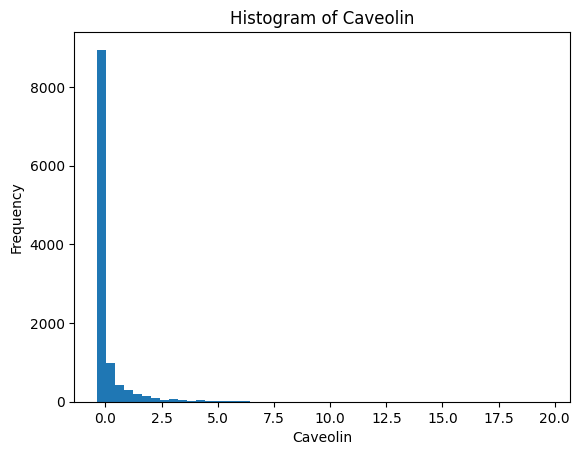

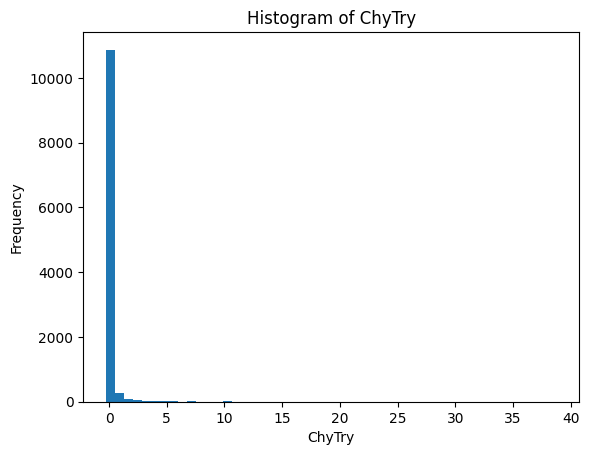

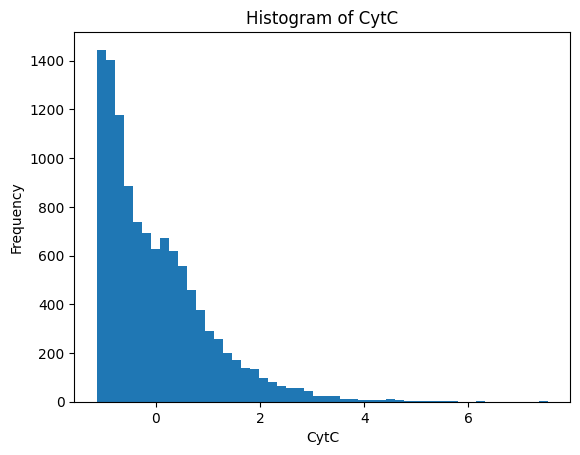

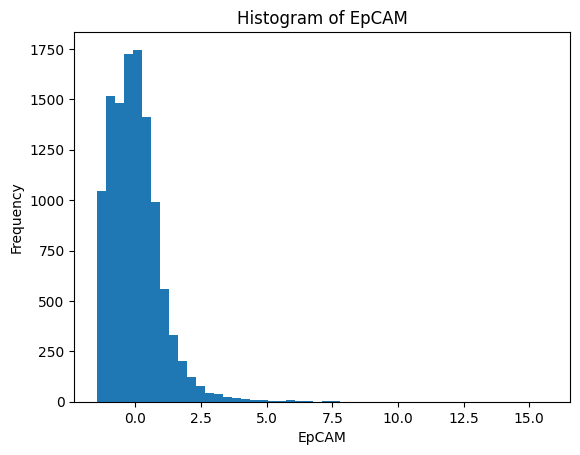

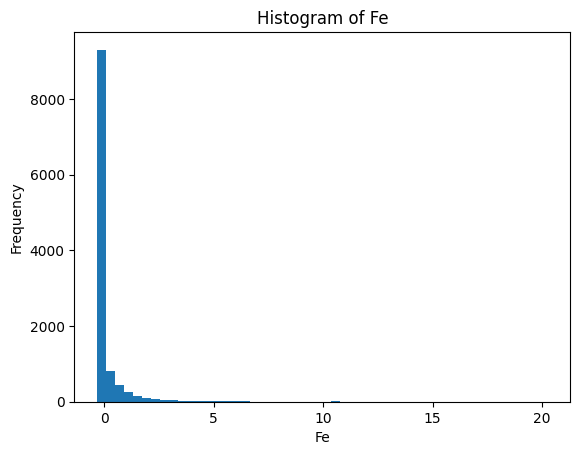

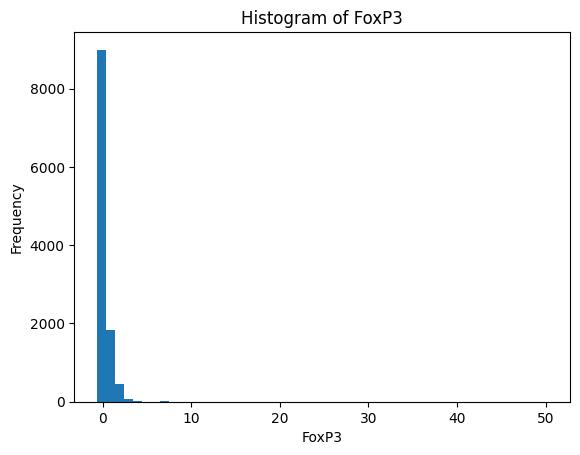

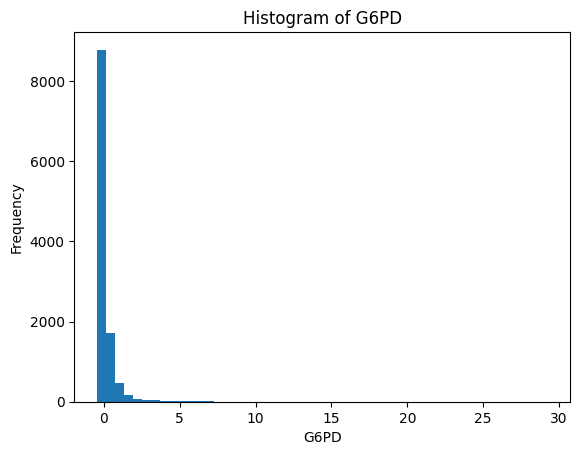

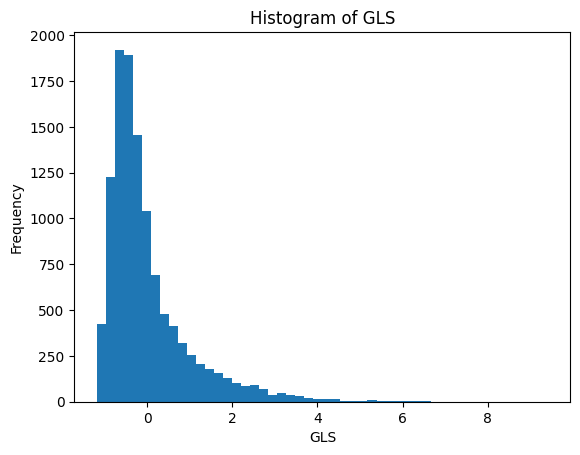

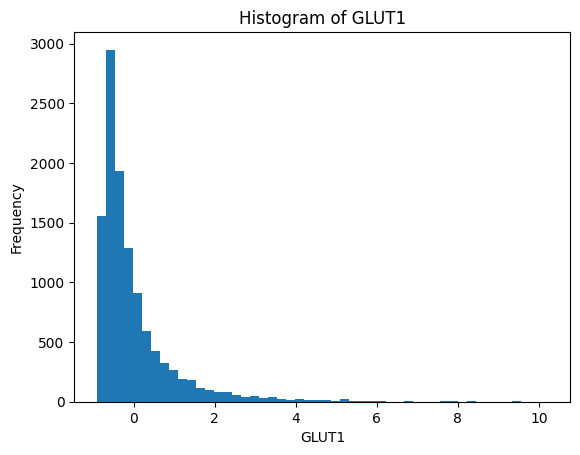

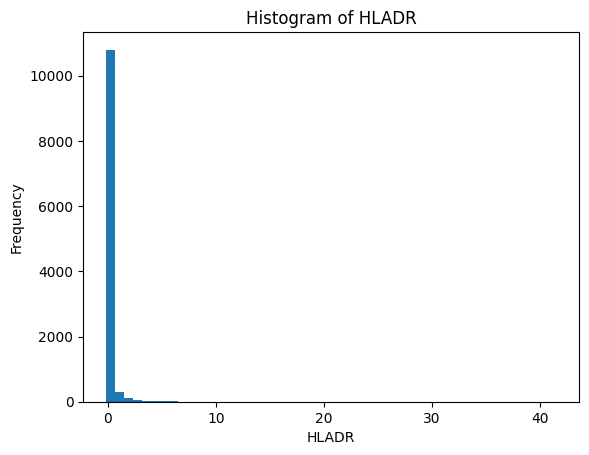

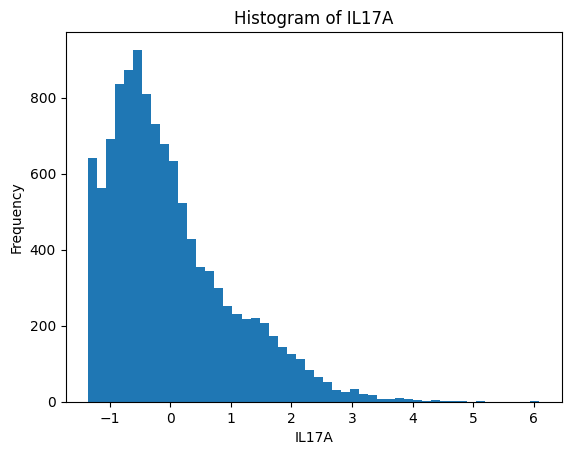

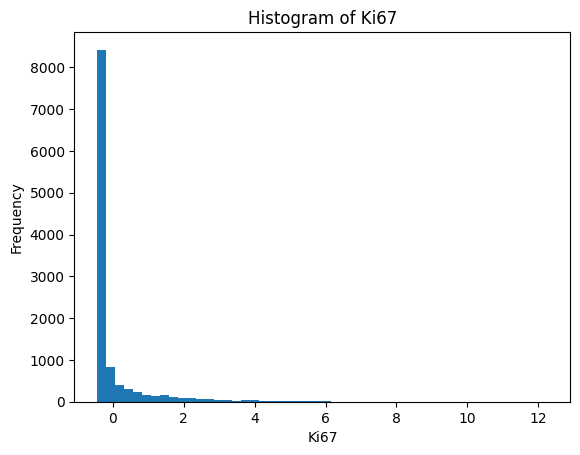

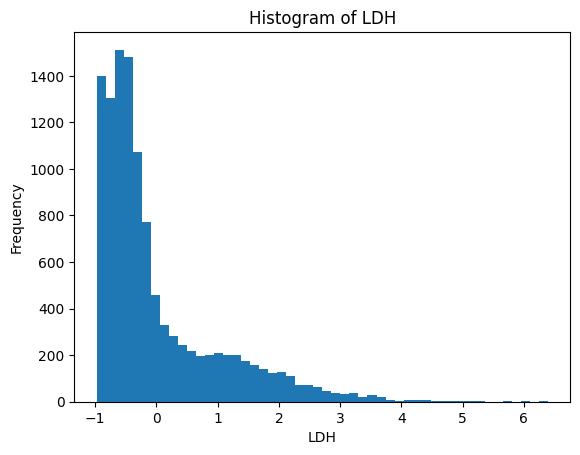

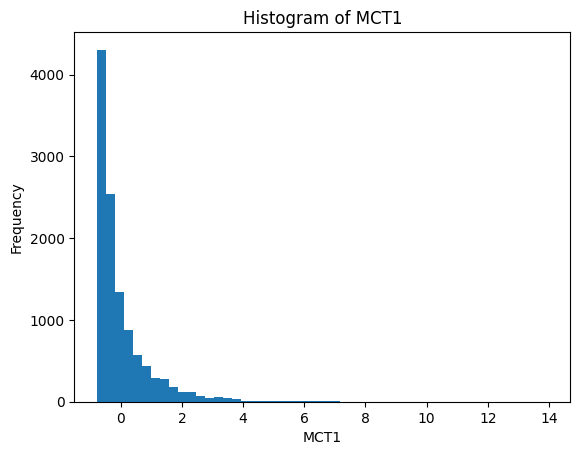

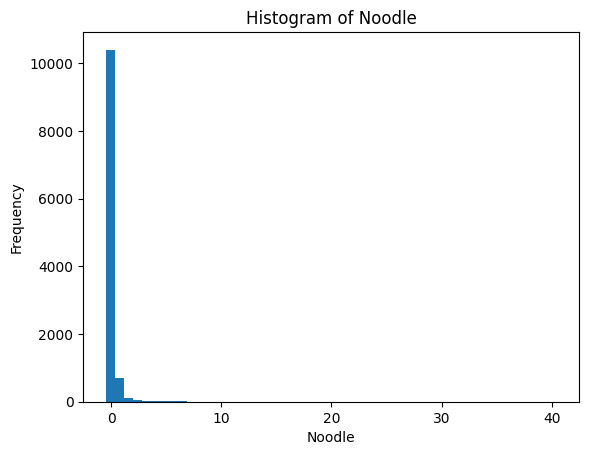

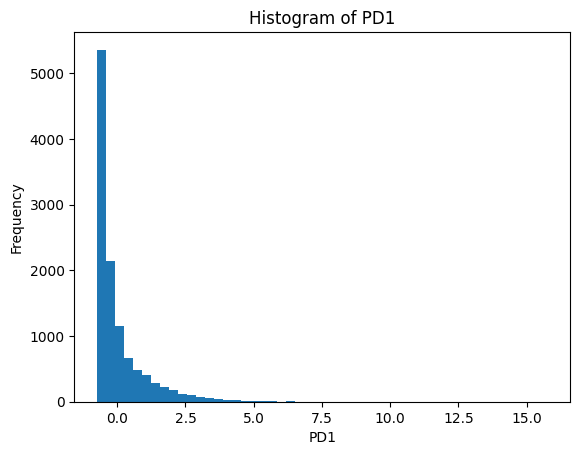

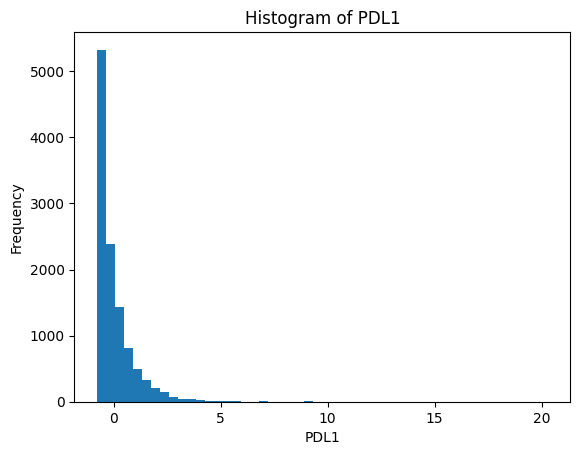

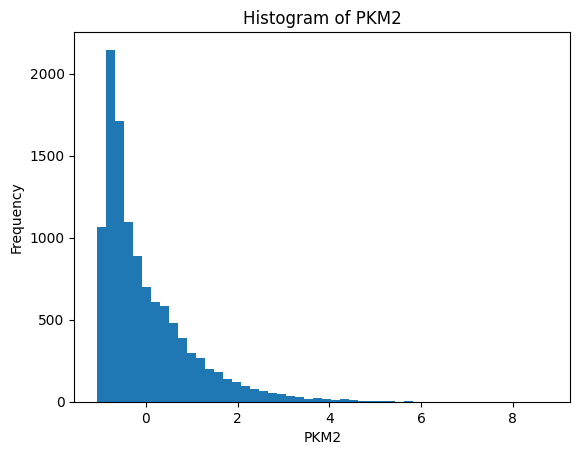

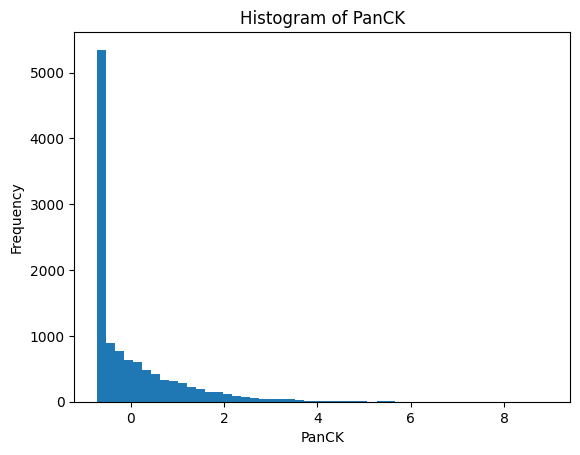

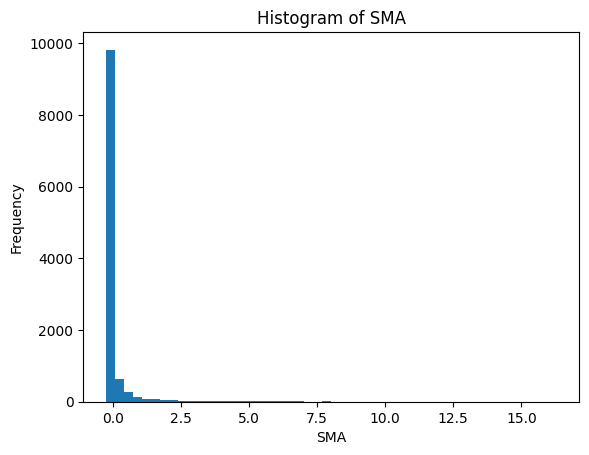

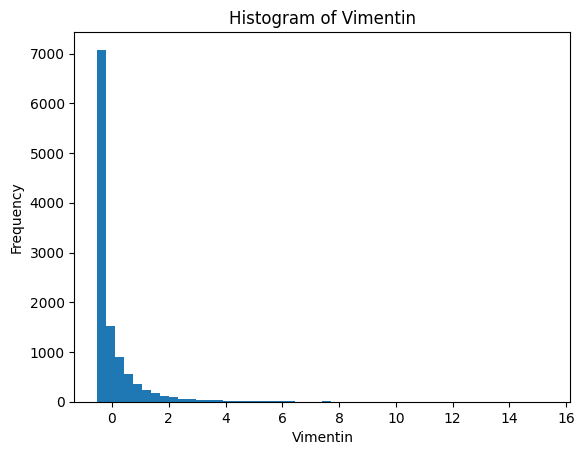

In [15]:
for column in channel_columns:
    plt.figure()  
    plt.hist(z_normalized_df[column], bins=50) 
    plt.title(f'Histogram of {column}')  
    plt.xlabel(column)  
    plt.ylabel('Frequency') 
    plt.show()  

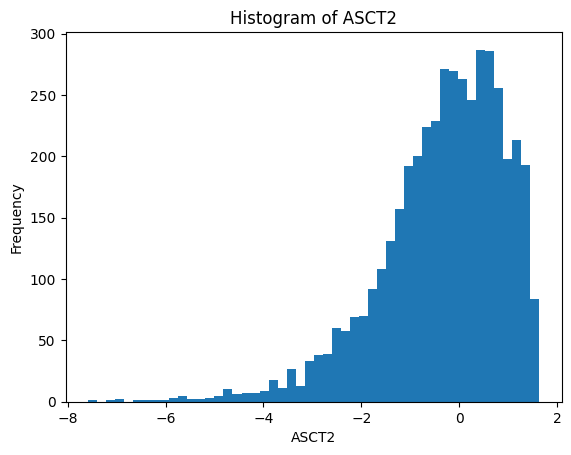

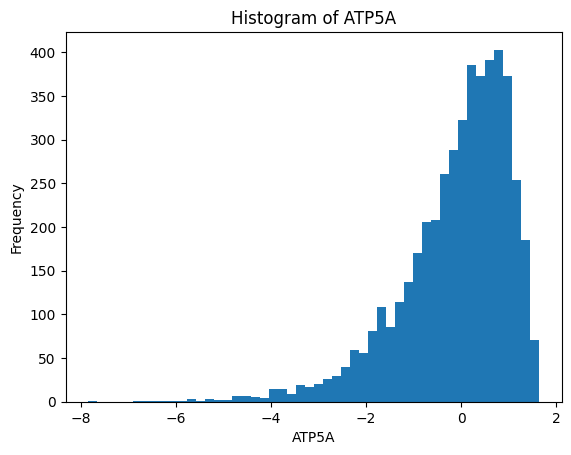

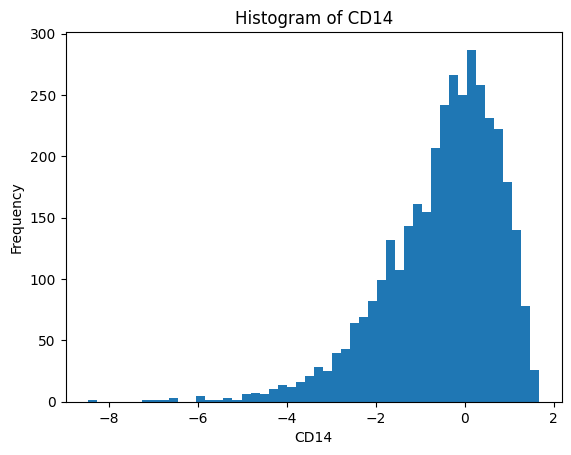

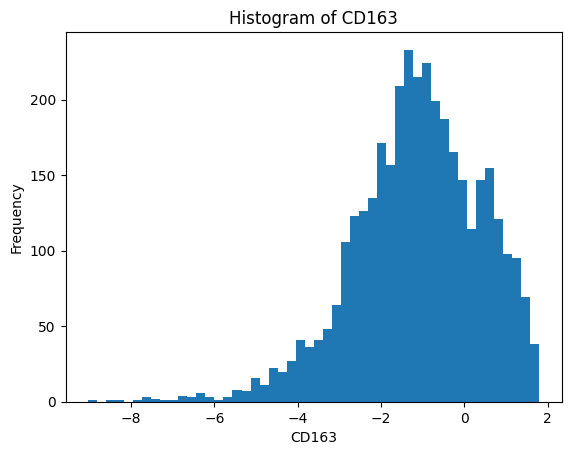

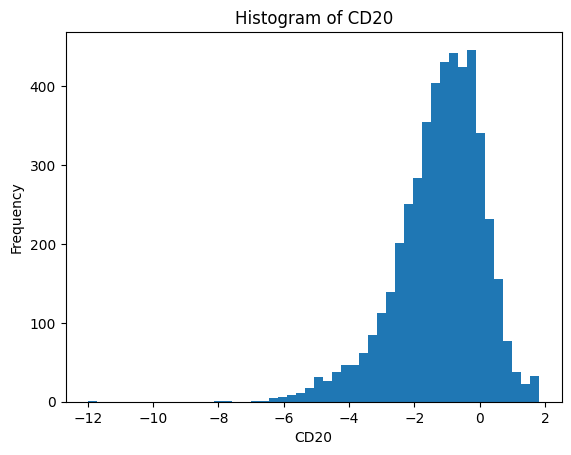

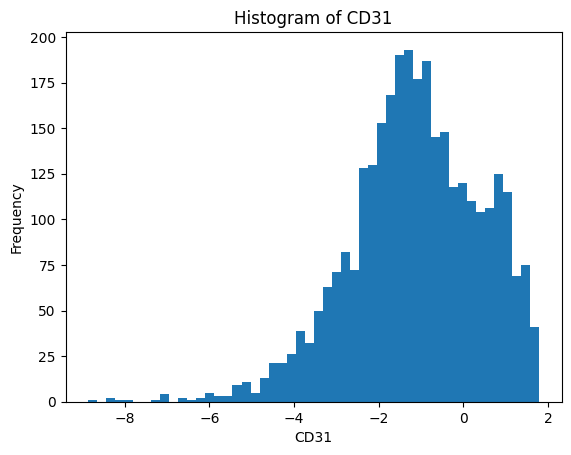

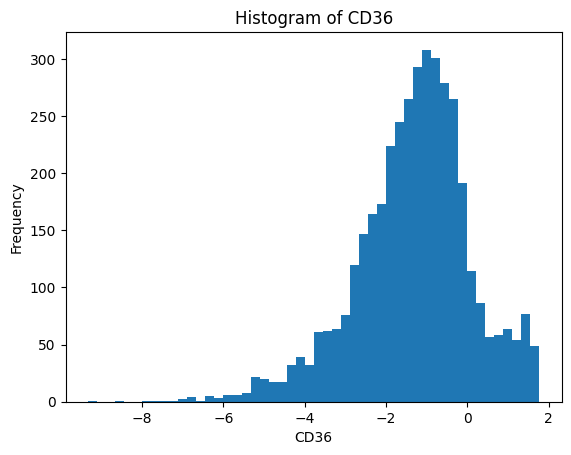

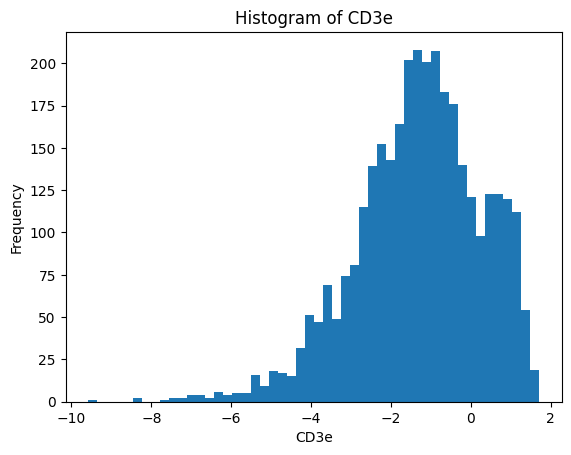

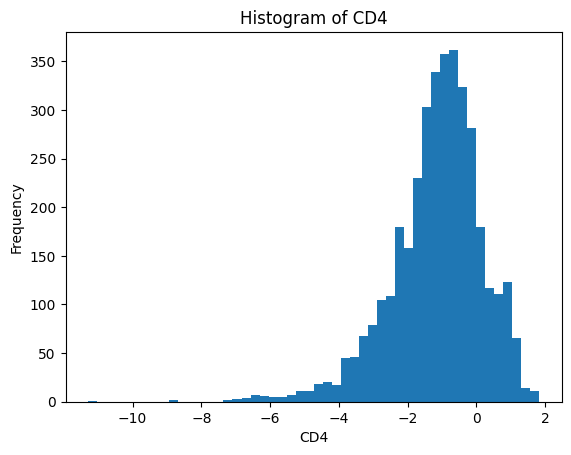

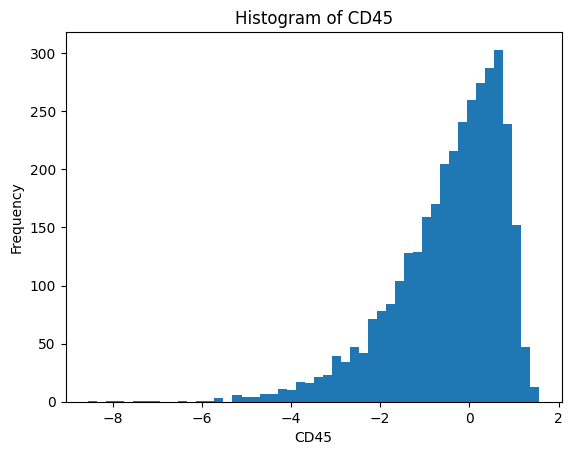

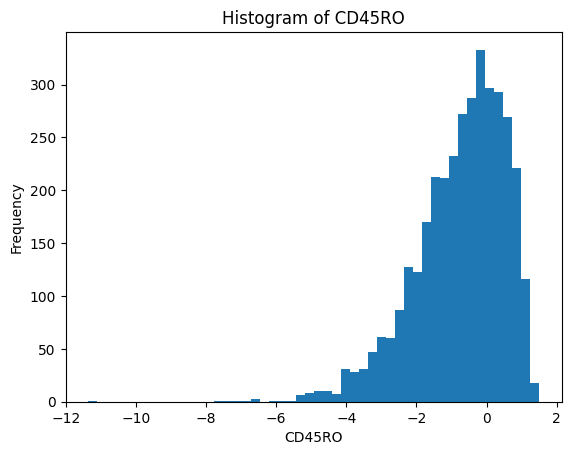

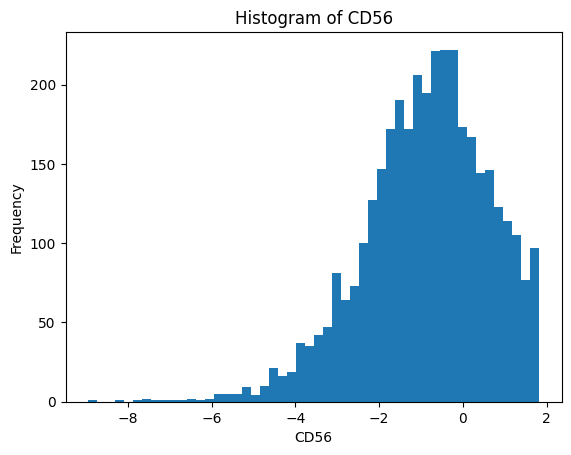

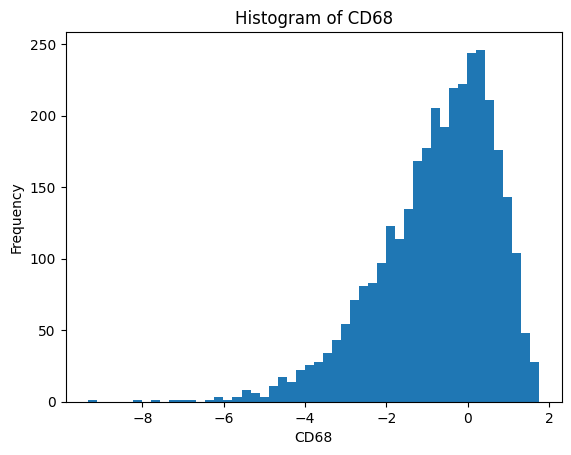

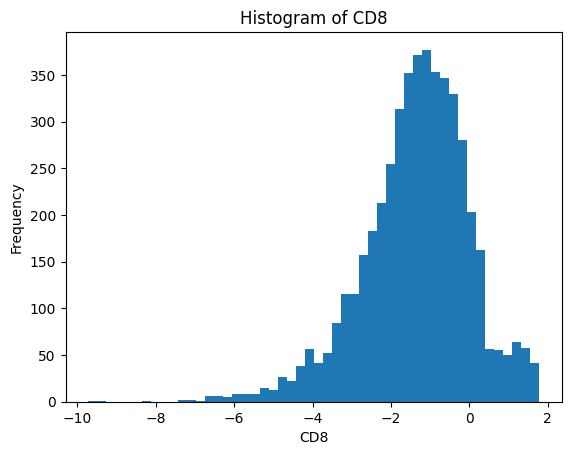

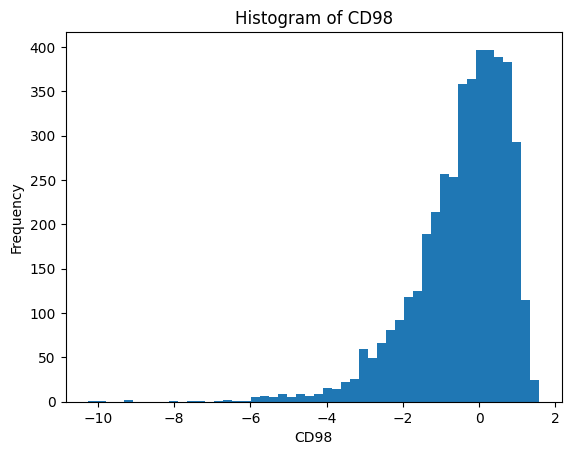

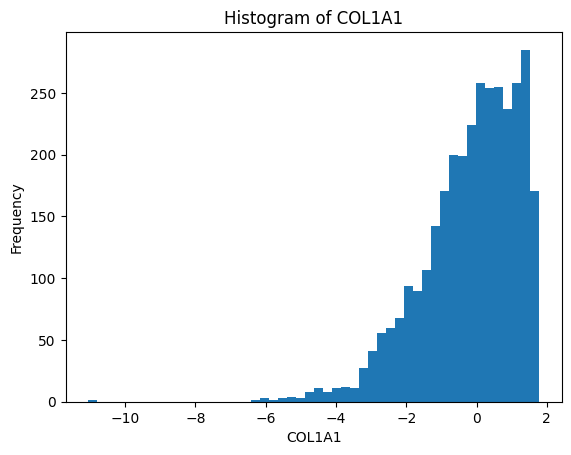

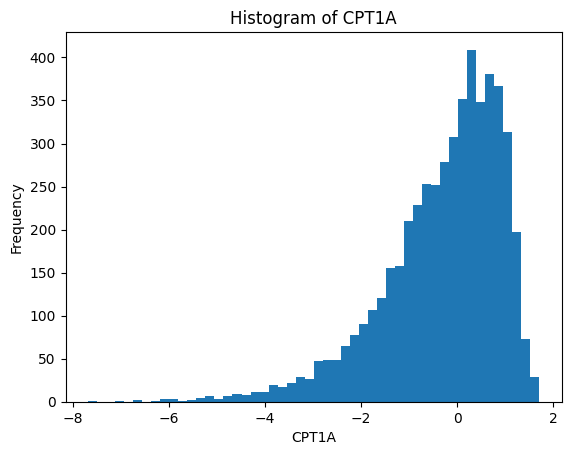

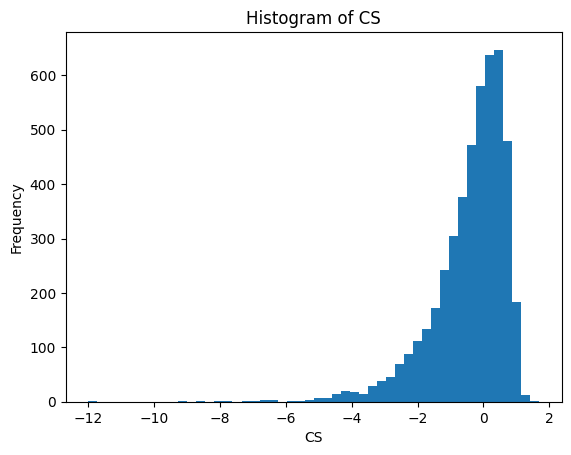

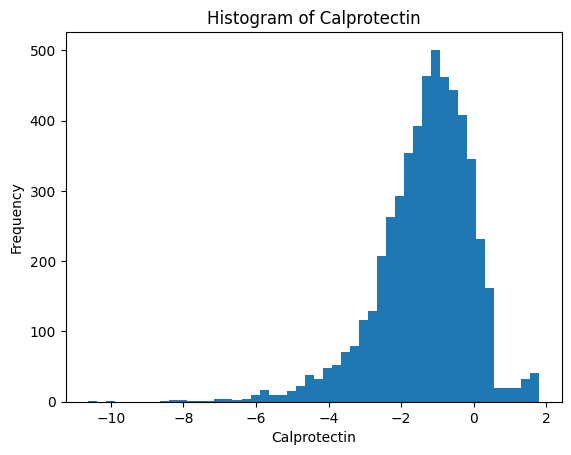

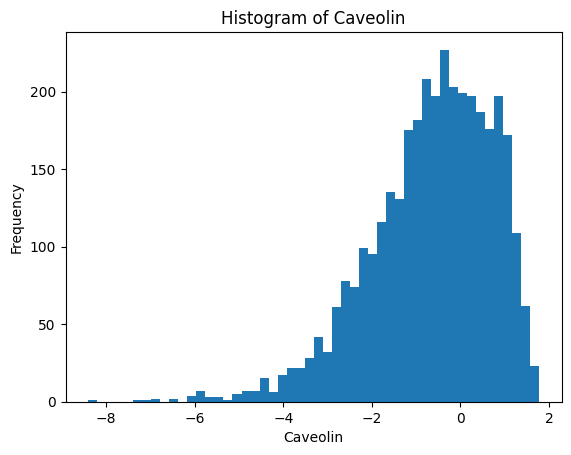

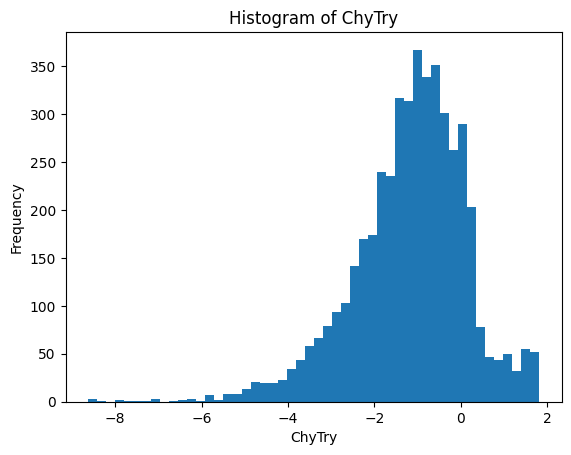

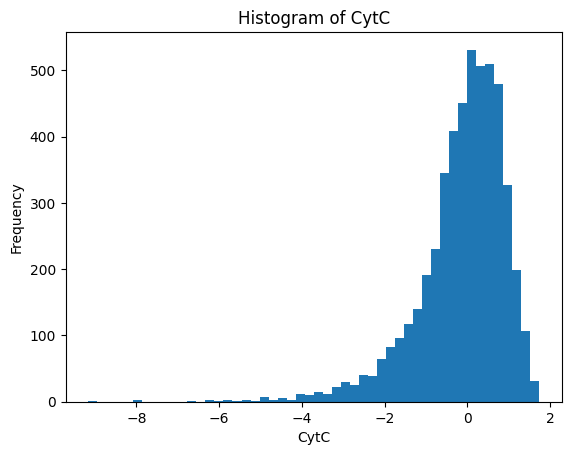

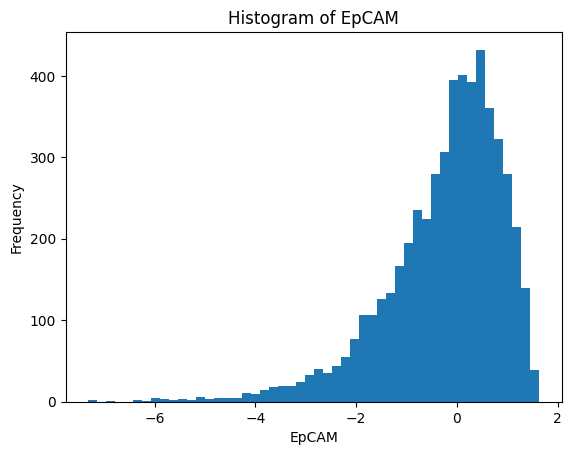

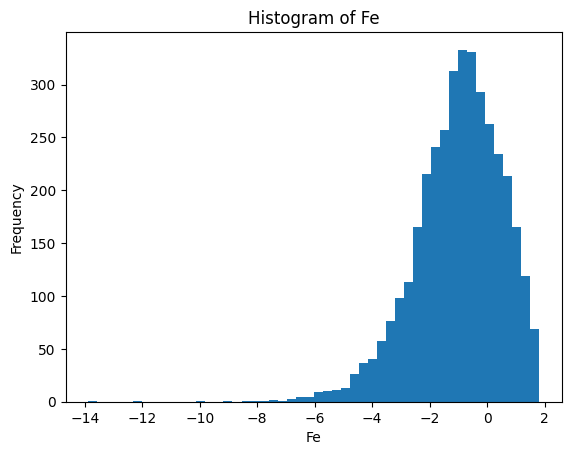

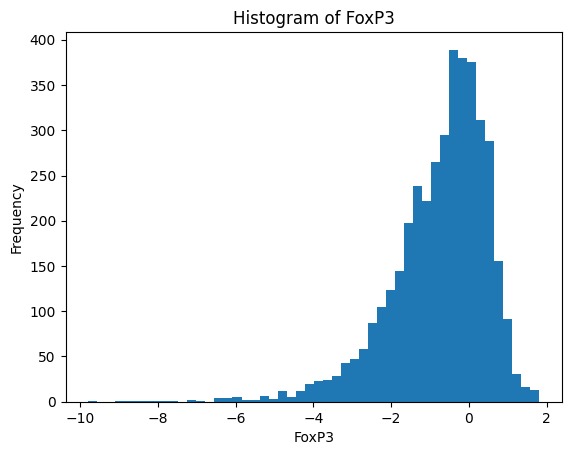

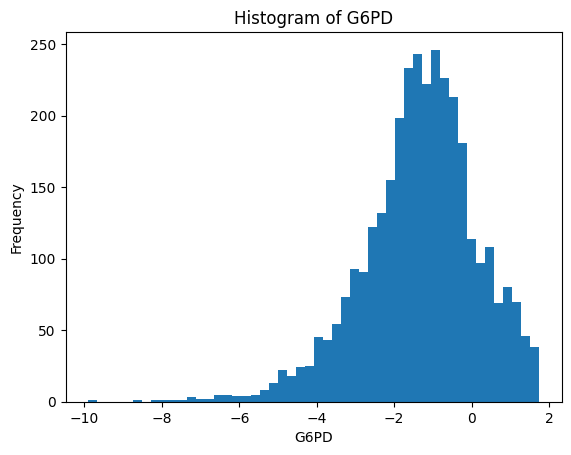

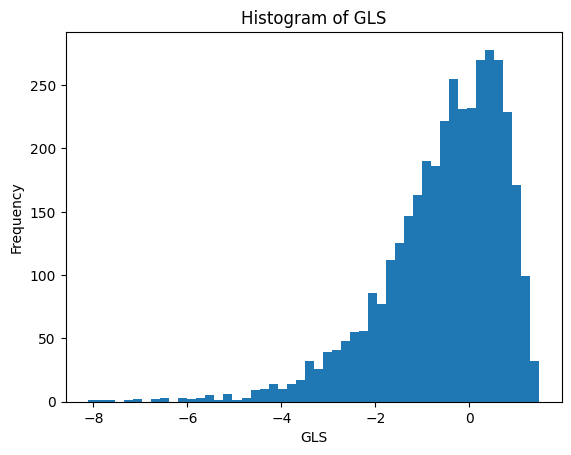

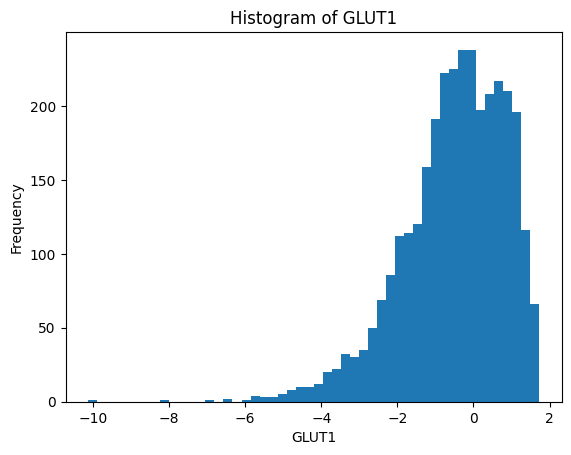

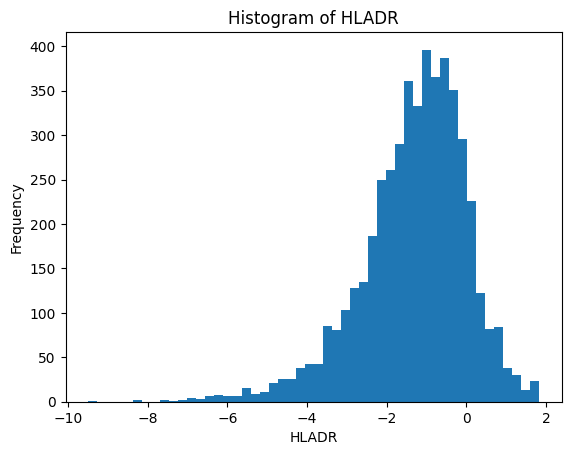

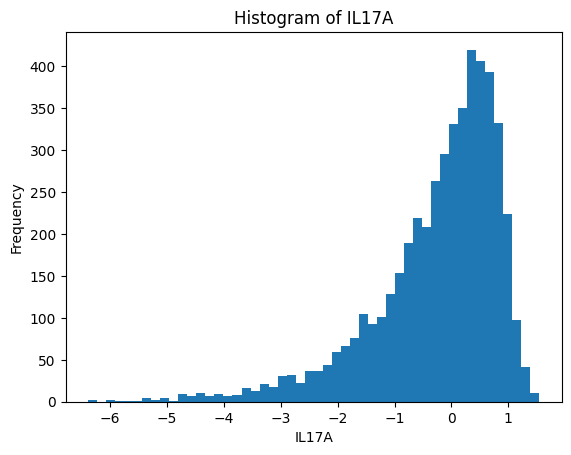

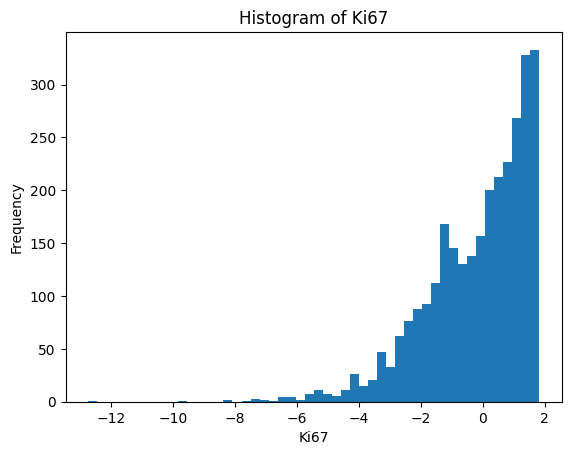

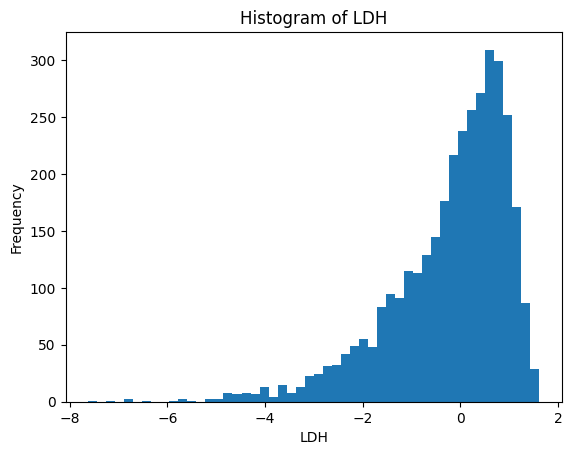

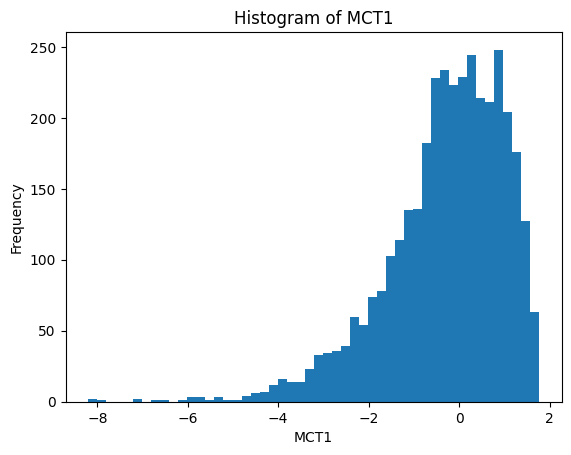

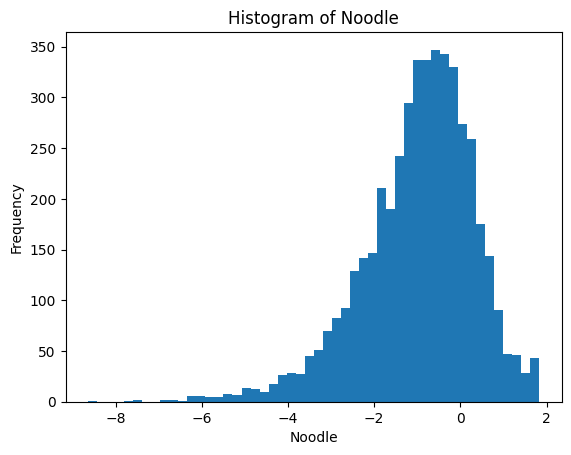

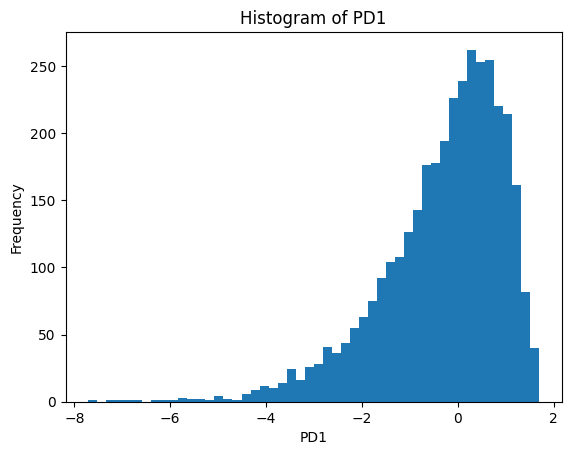

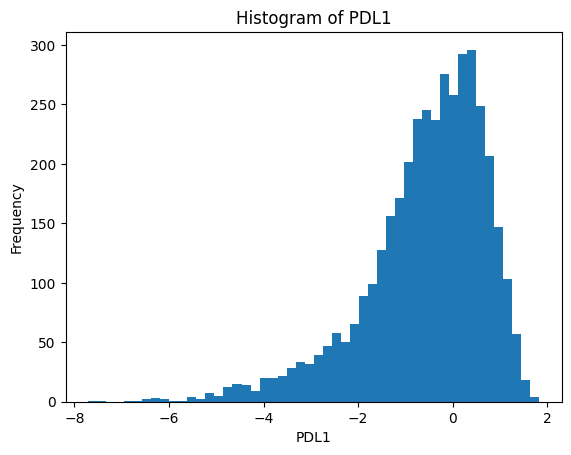

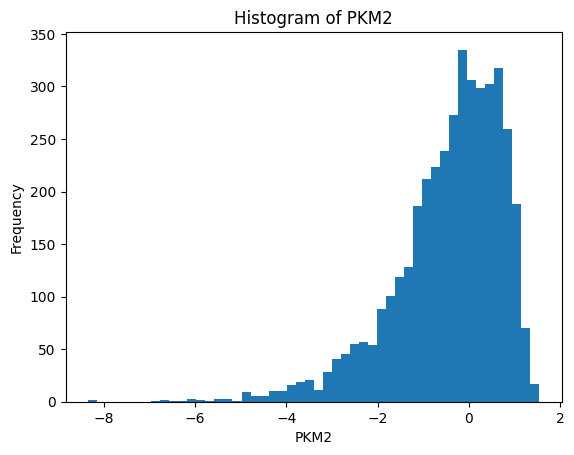

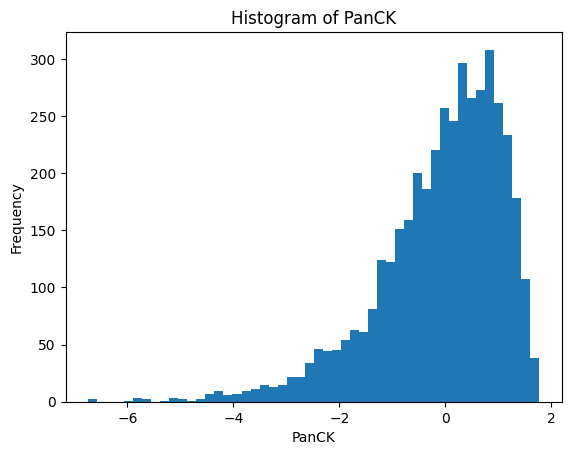

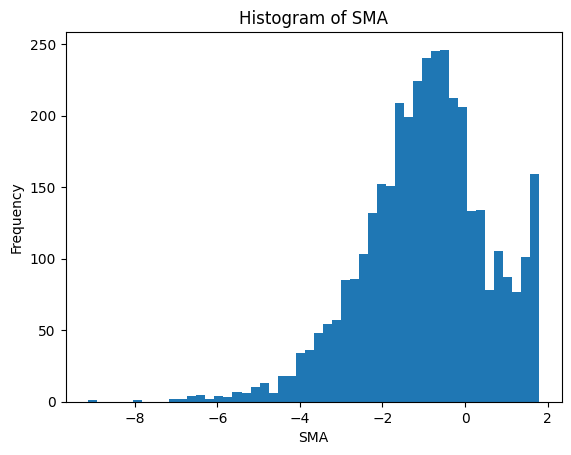

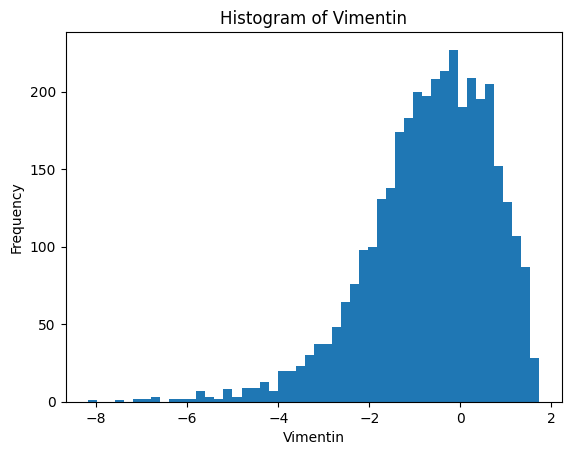

In [16]:
for column in channel_columns:
    plt.figure()  
    plt.hist(double_z_normalized_df[column], bins=50) 
    plt.title(f'Histogram of {column}')  
    plt.xlabel(column)  
    plt.ylabel('Frequency') 
    plt.show()  

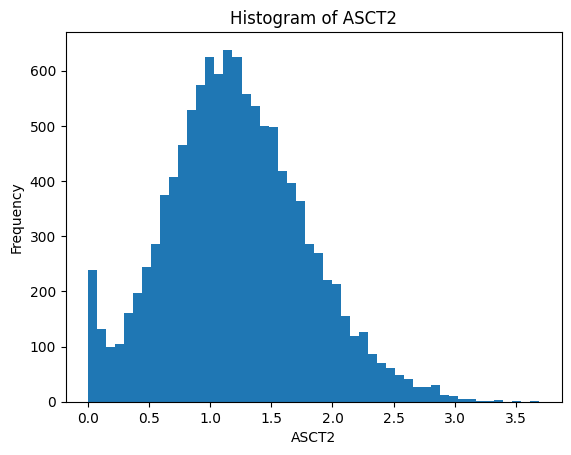

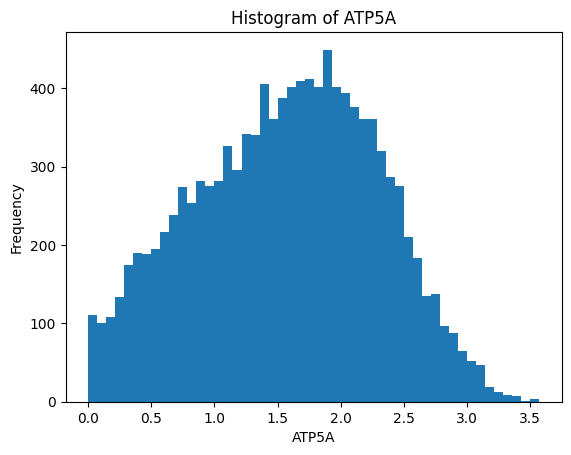

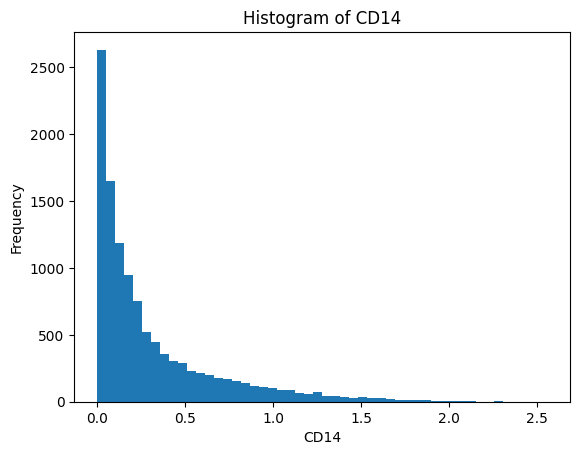

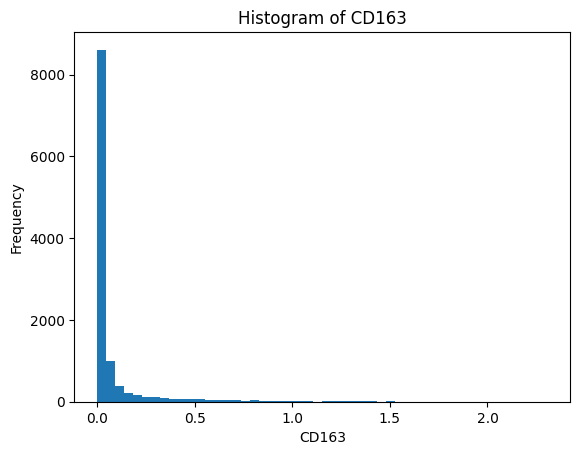

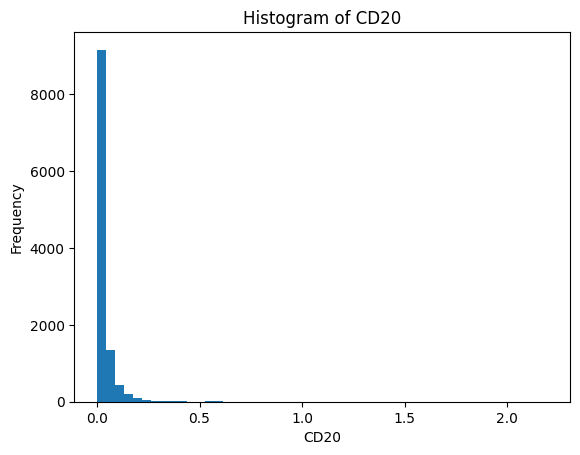

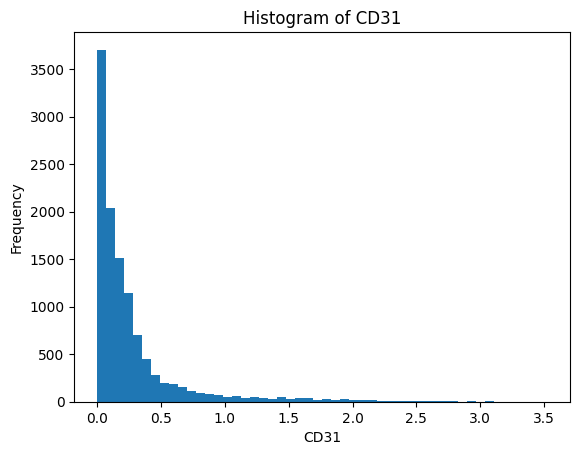

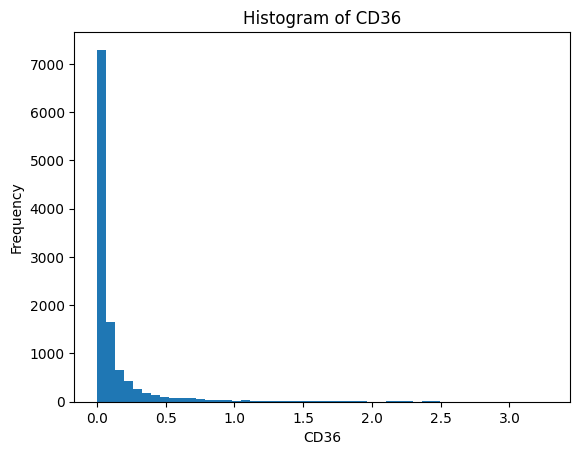

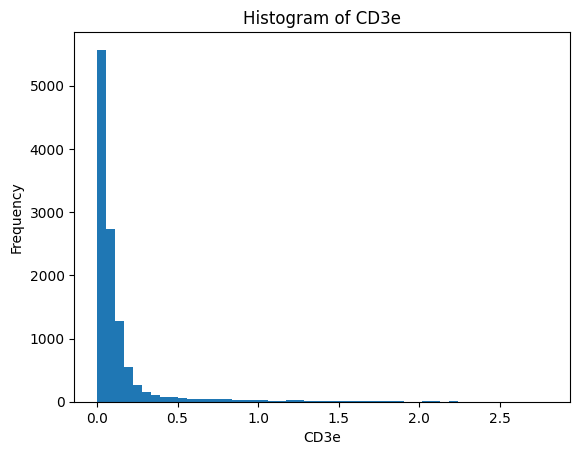

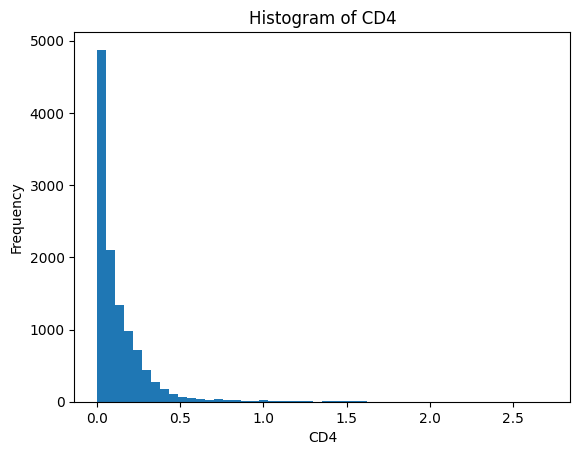

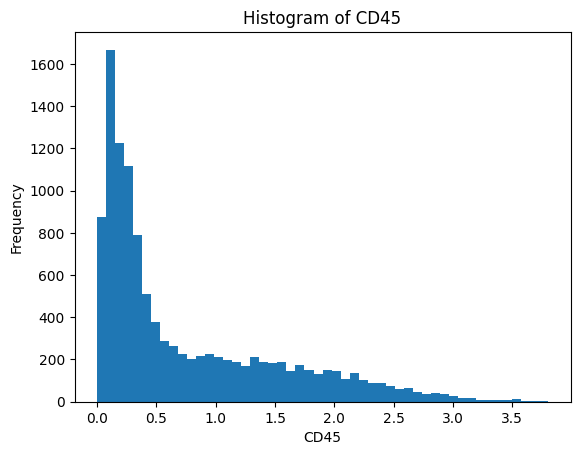

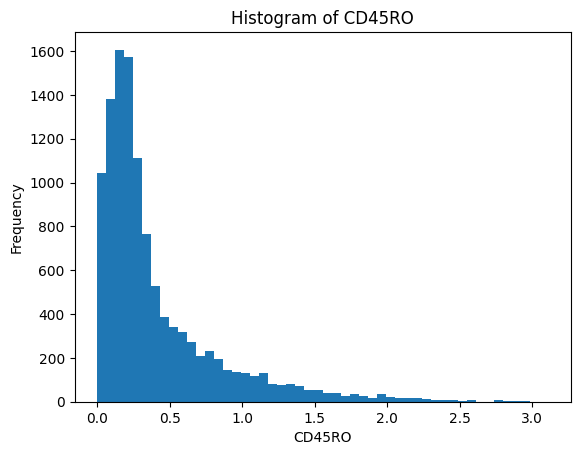

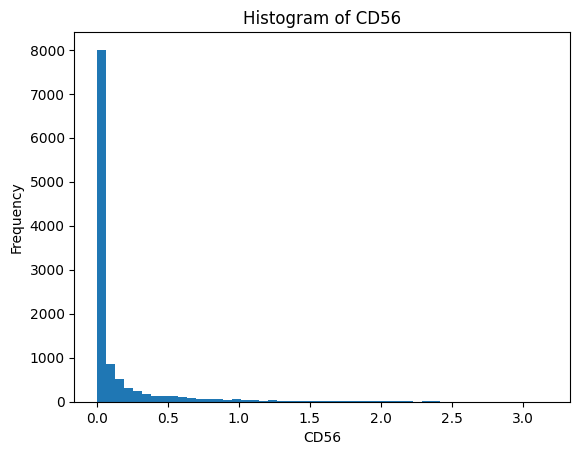

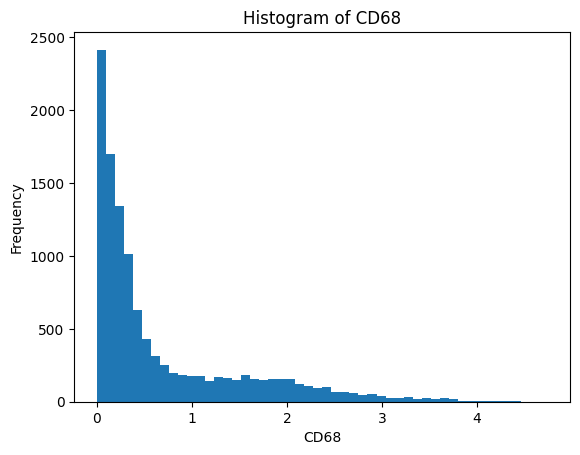

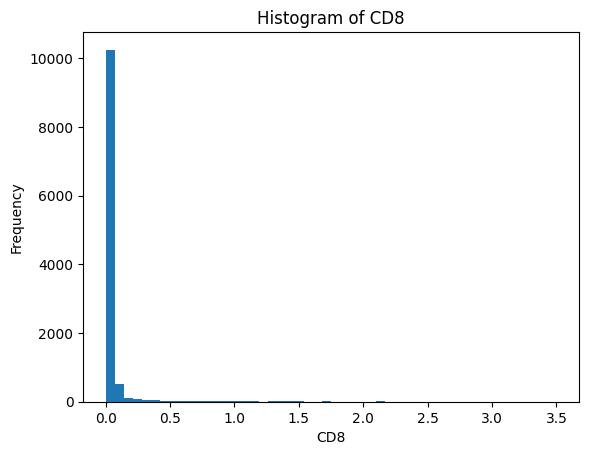

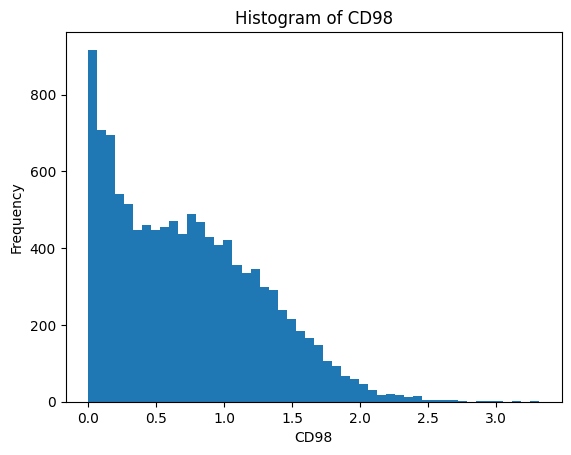

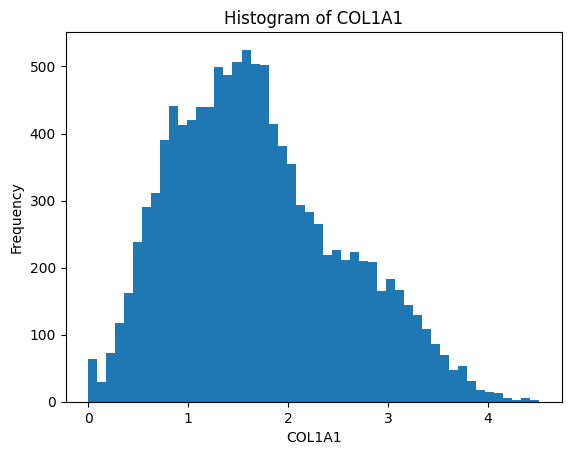

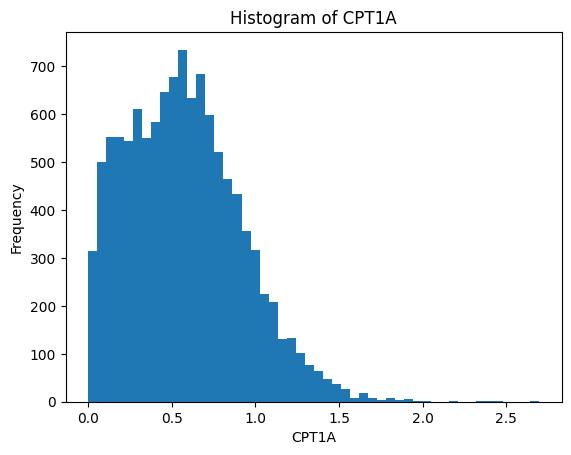

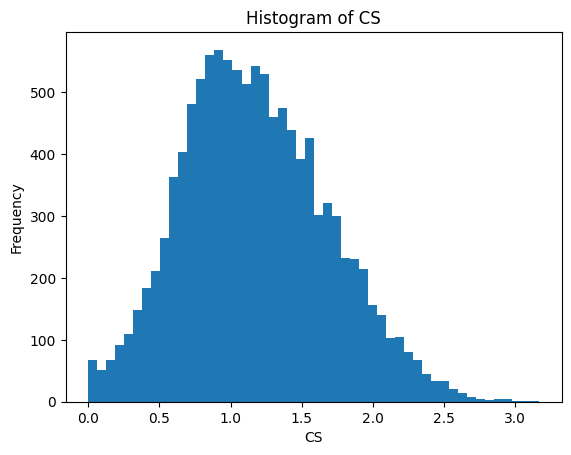

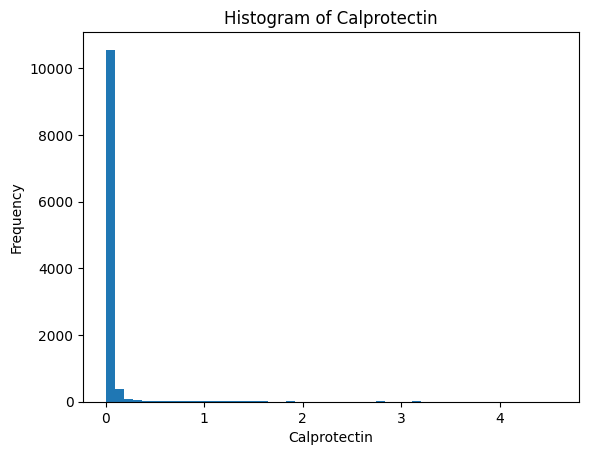

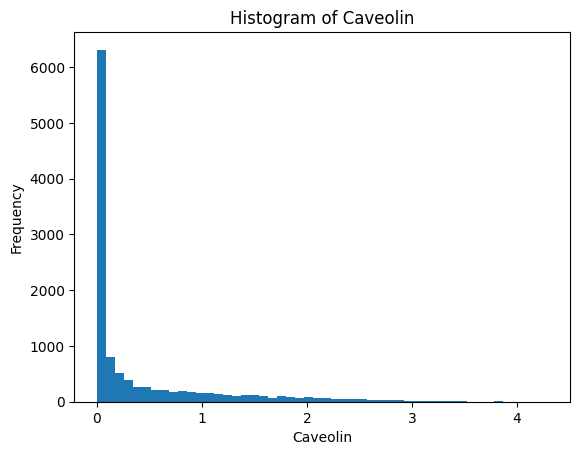

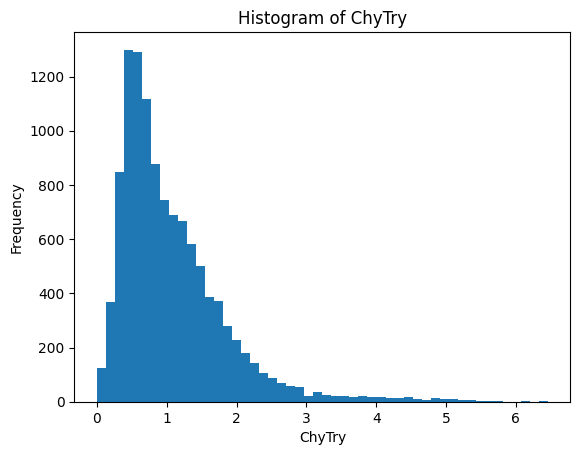

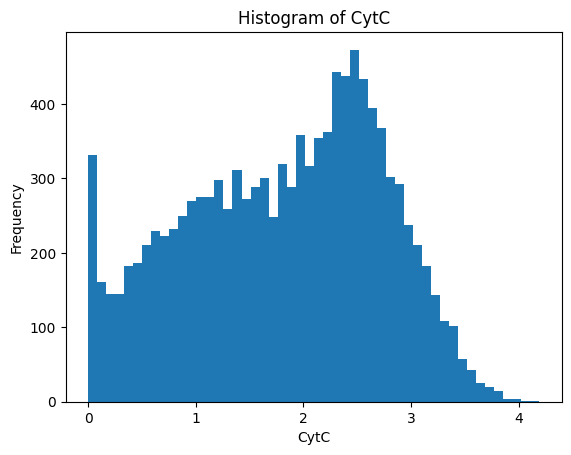

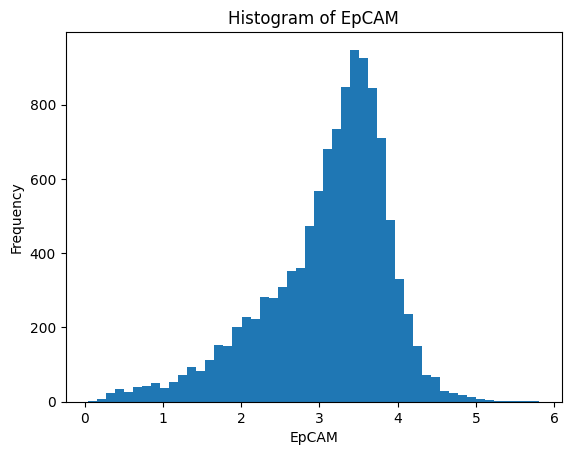

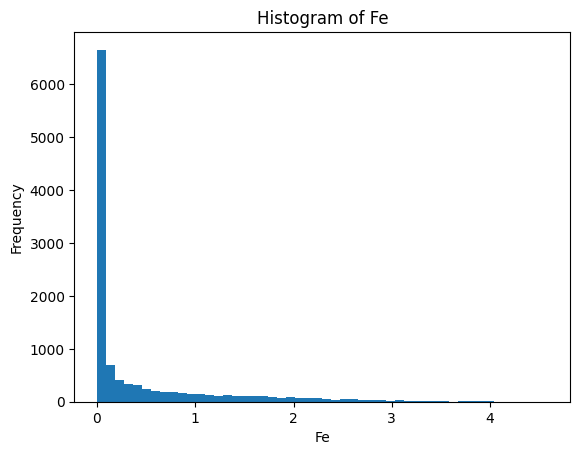

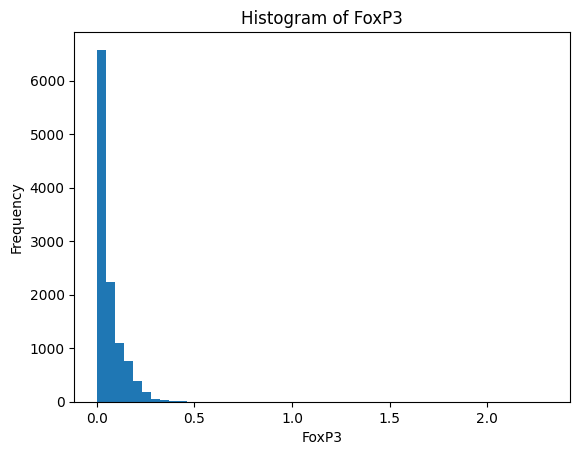

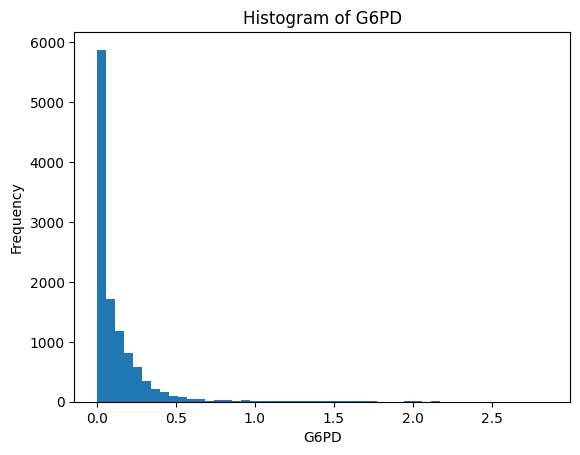

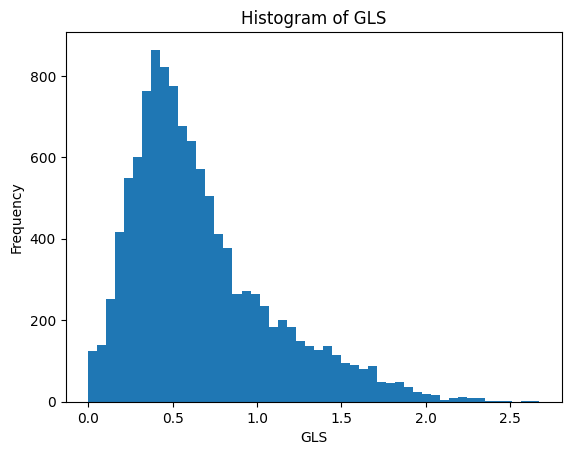

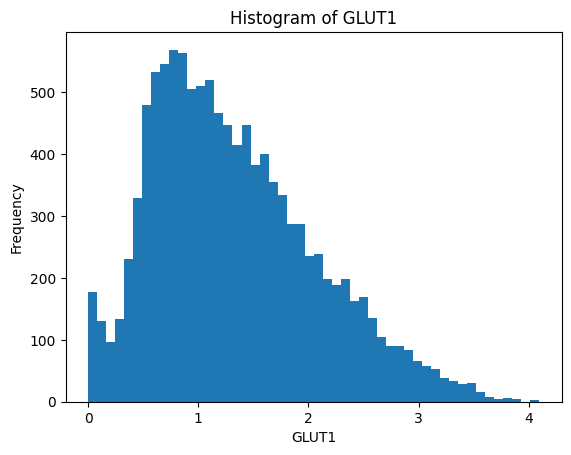

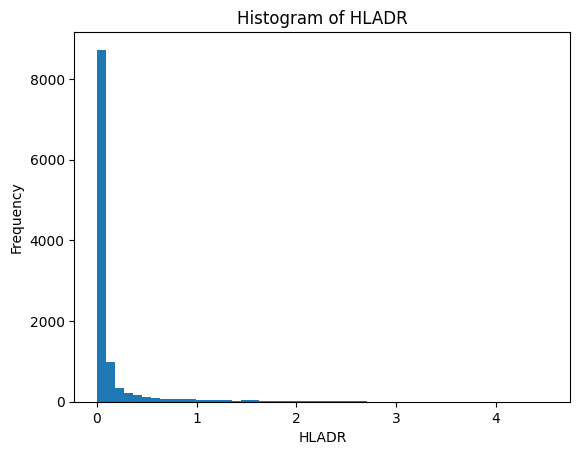

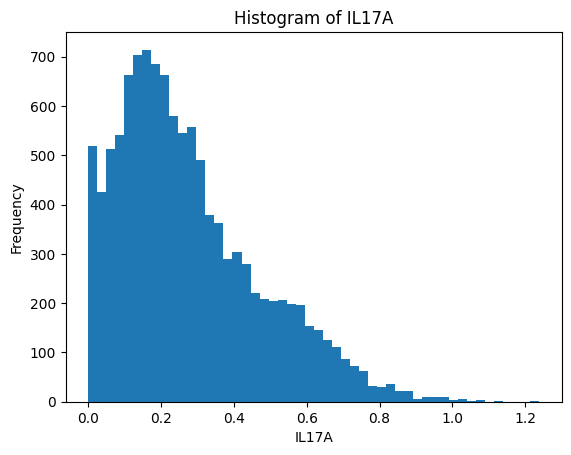

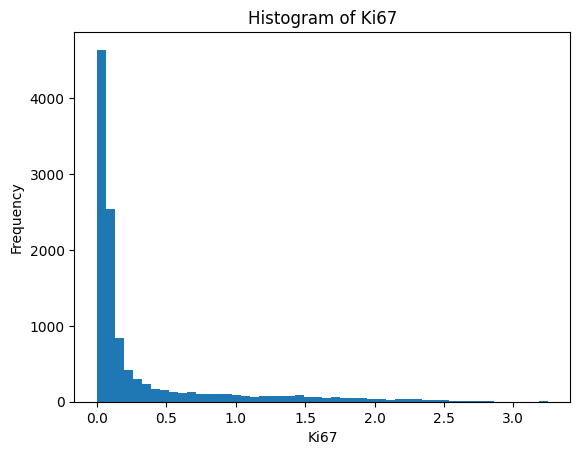

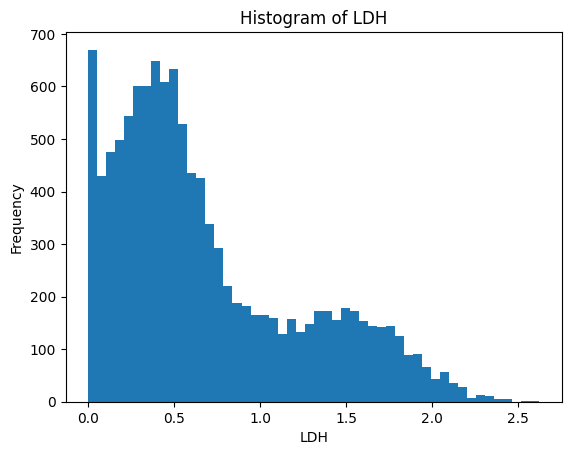

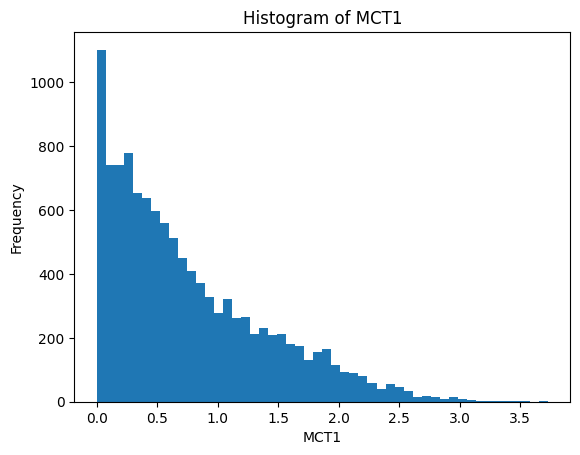

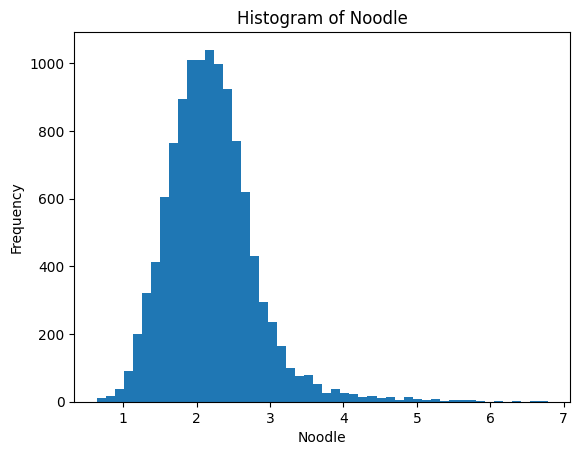

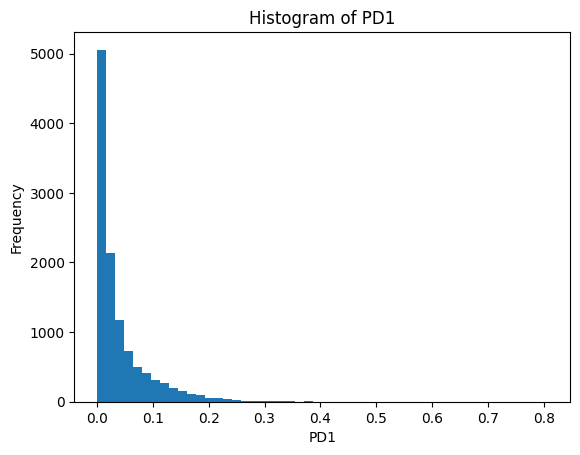

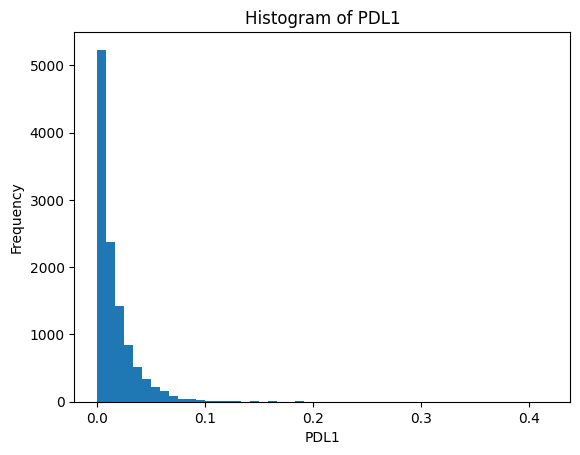

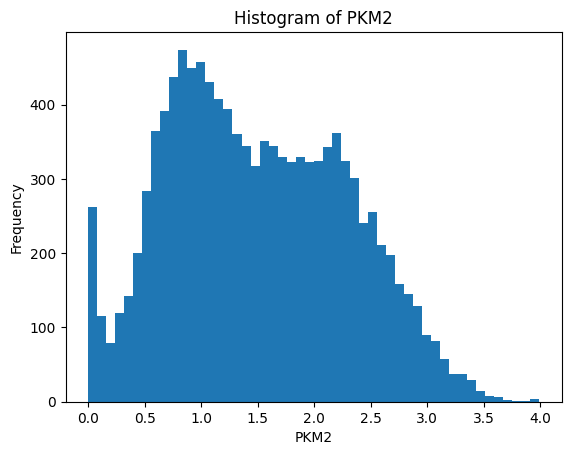

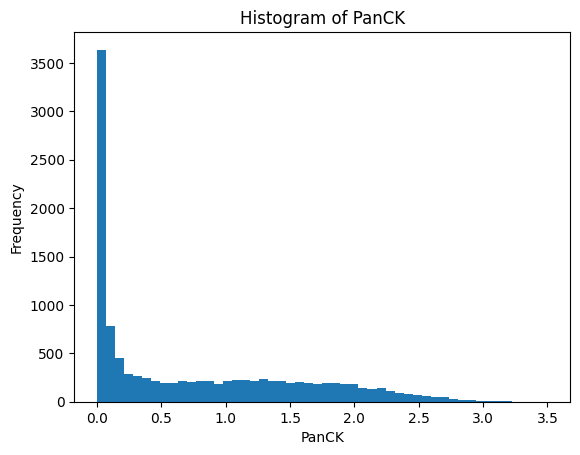

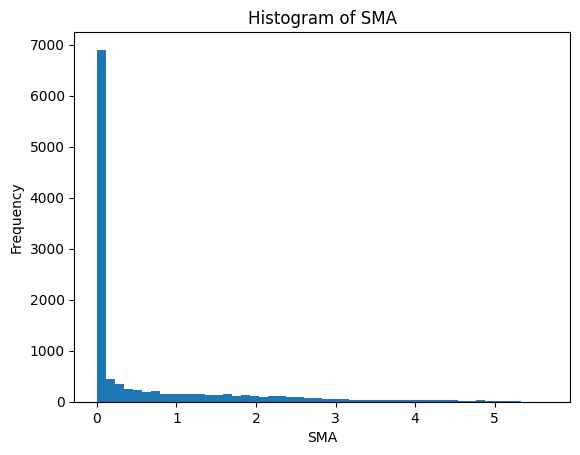

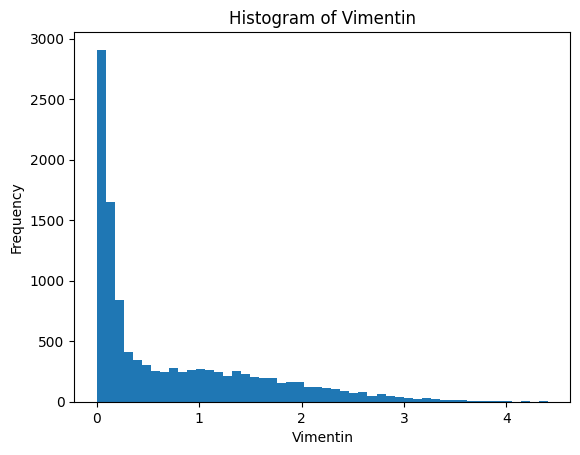

In [17]:
for column in channel_columns:
    plt.figure()  
    plt.hist(arcsinh_df[column], bins=50) 
    plt.title(f'Histogram of {column}')  
    plt.xlabel(column)  
    plt.ylabel('Frequency') 
    plt.show()  

In [38]:
#Keren paper: Arcsinh transformed, and standardized across markers using std normalization.
# https://doi.org/10.1016/j.cell.2018.08.039

keren_df= arcsinh_df.copy()

keren_df[channel_columns] = (keren_df[channel_columns] - keren_df[channel_columns].mean()) / keren_df[channel_columns].std()

keren_df.to_csv('kerenetal_norm_df.csv')

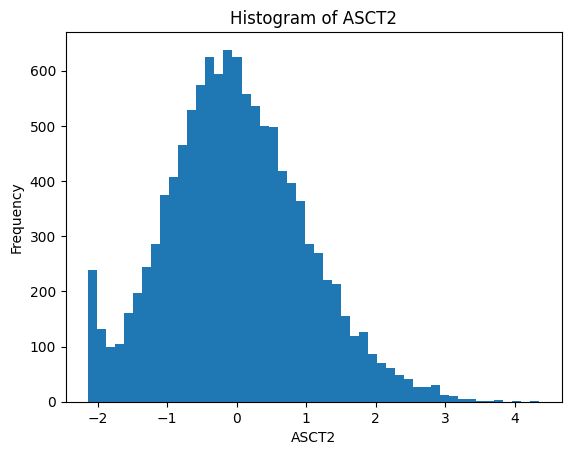

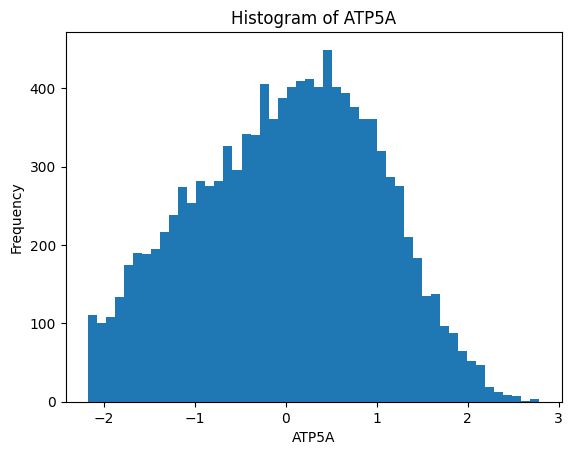

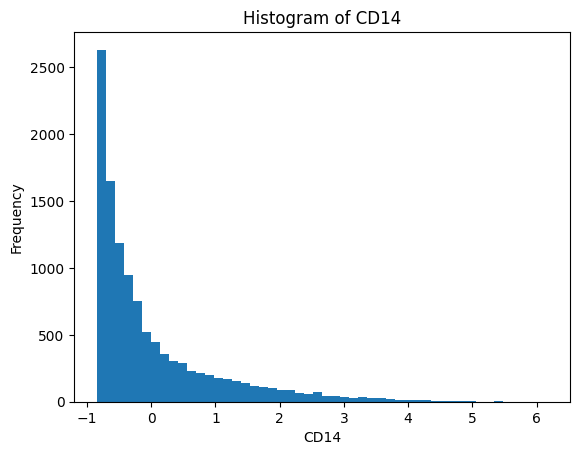

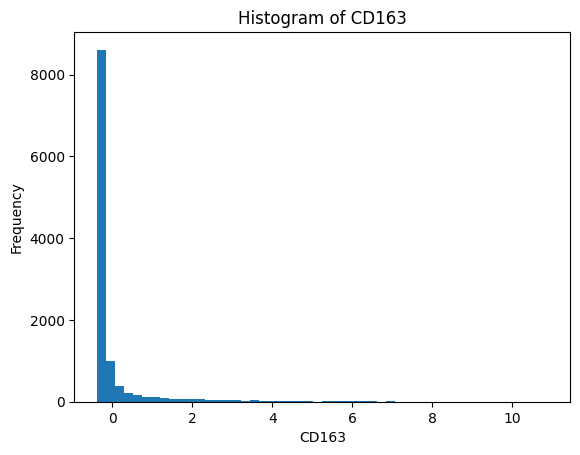

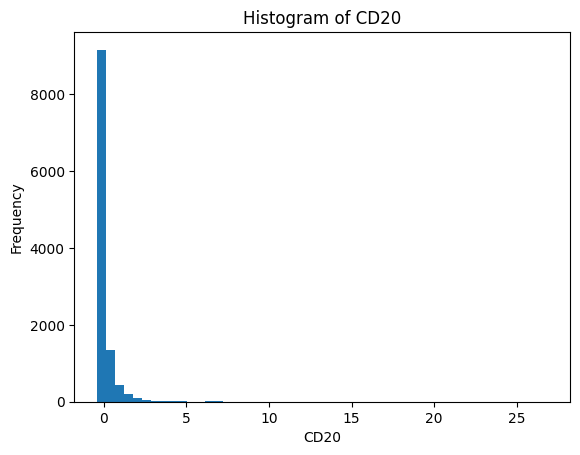

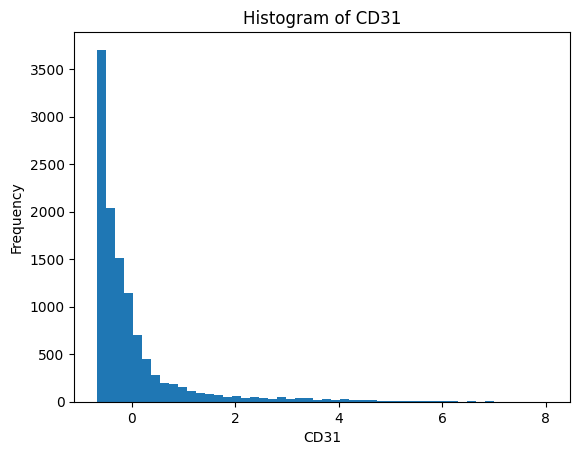

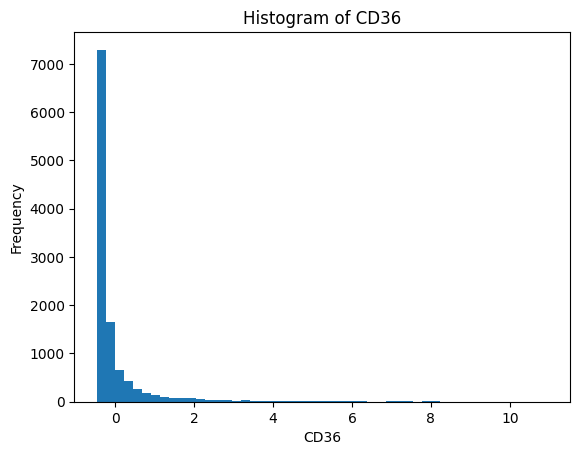

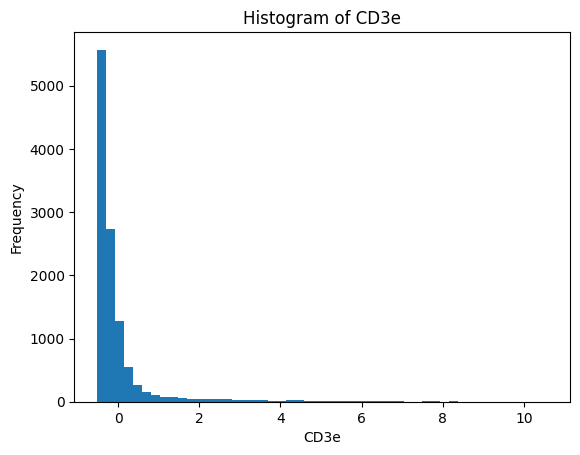

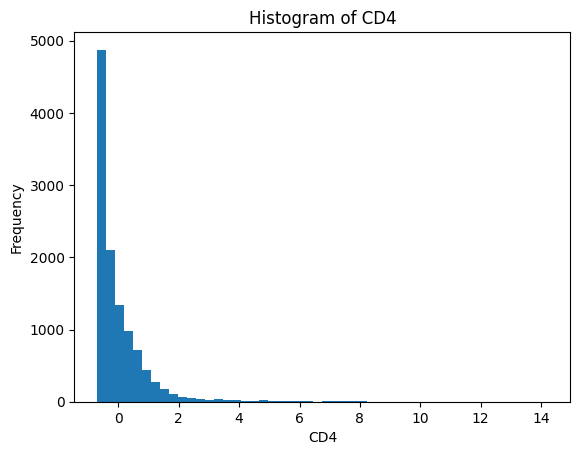

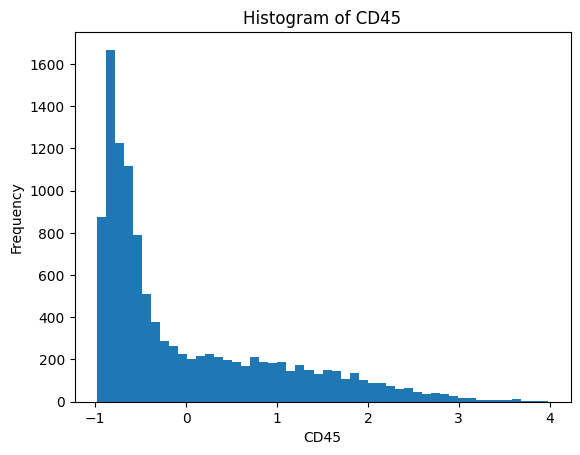

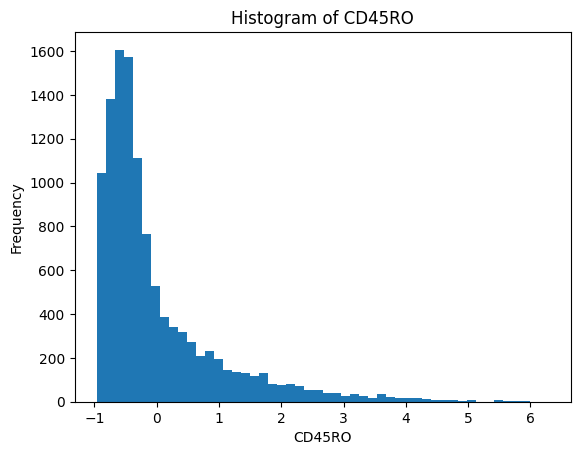

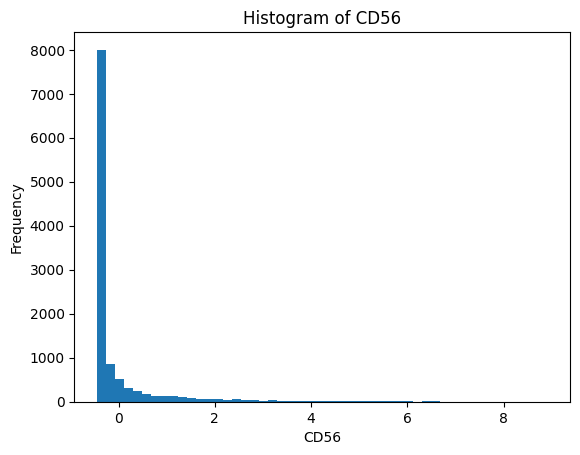

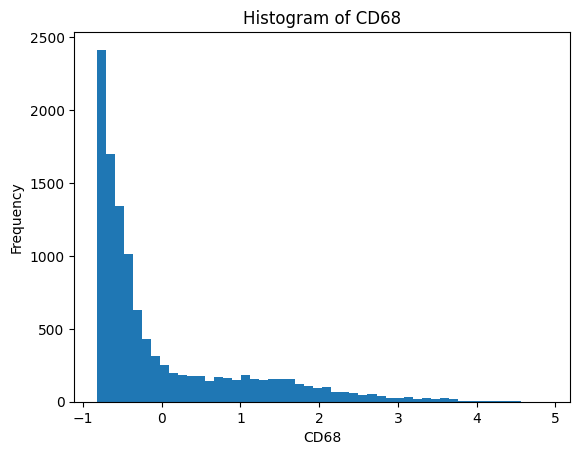

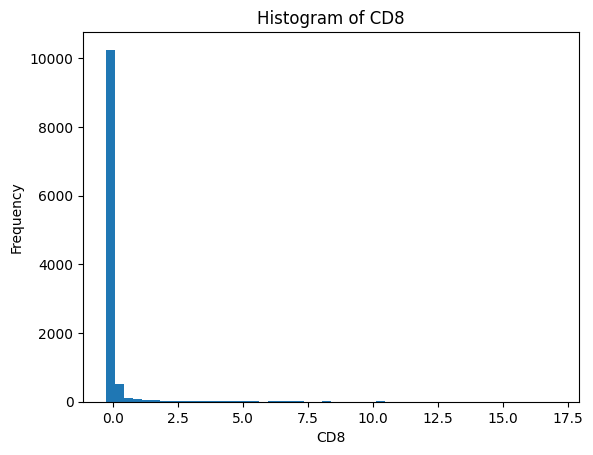

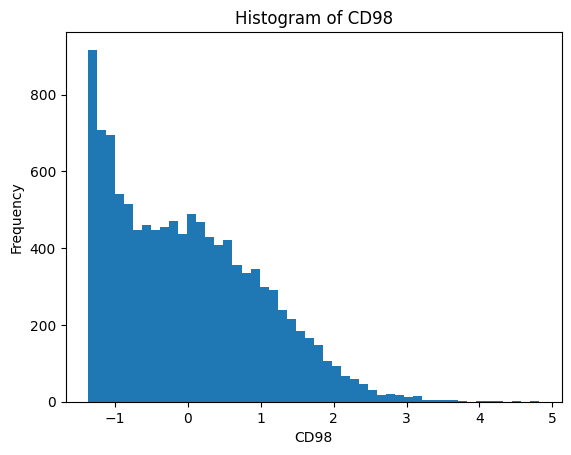

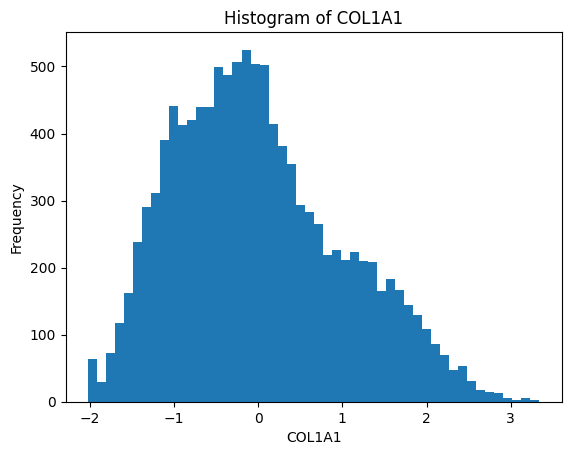

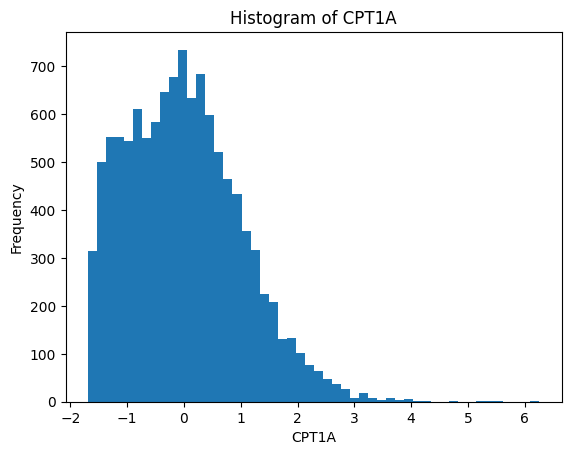

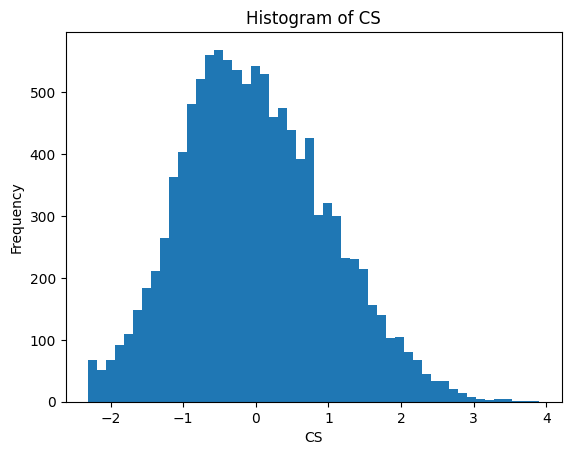

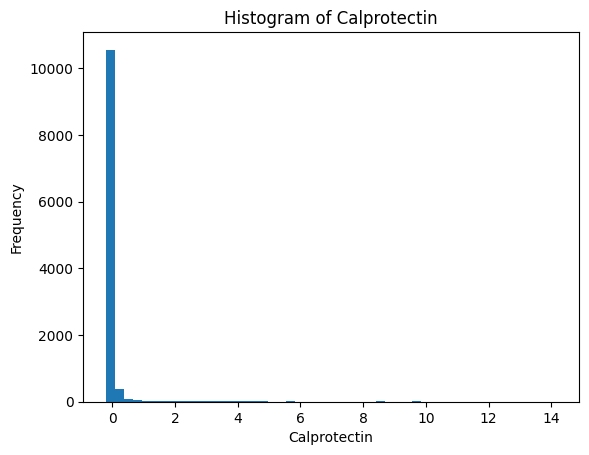

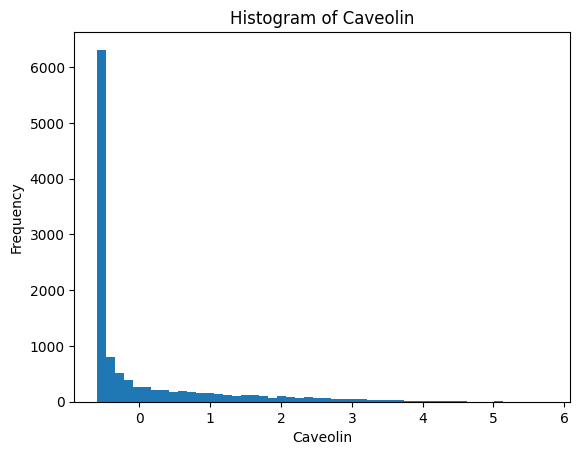

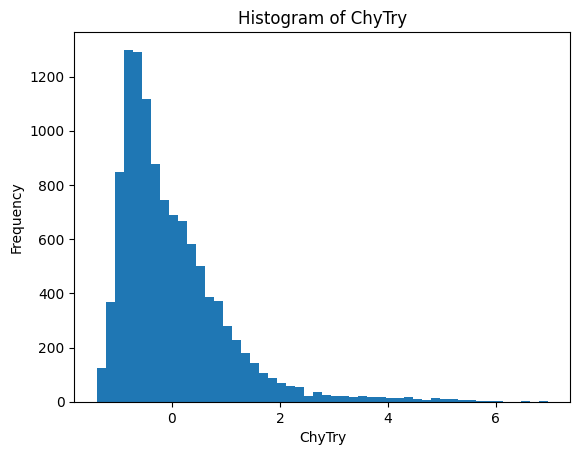

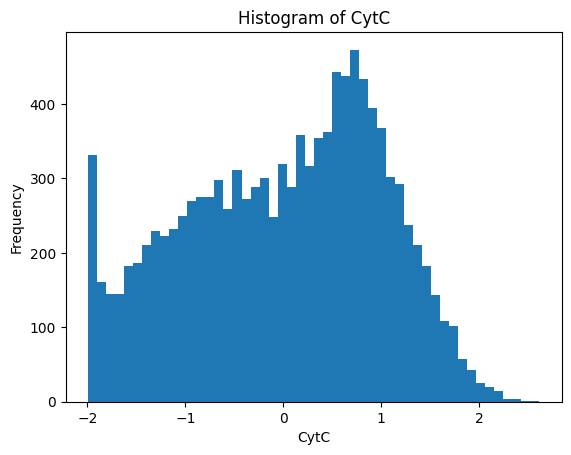

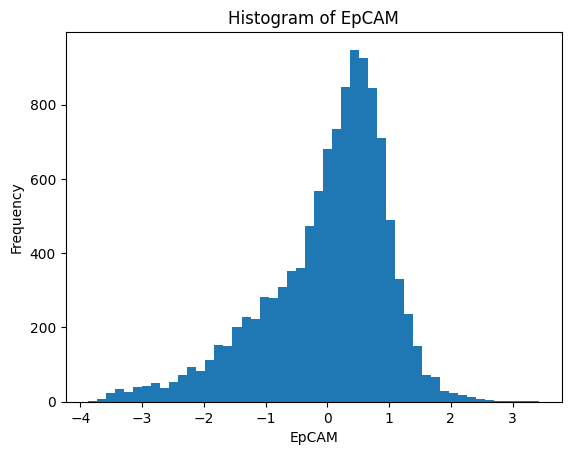

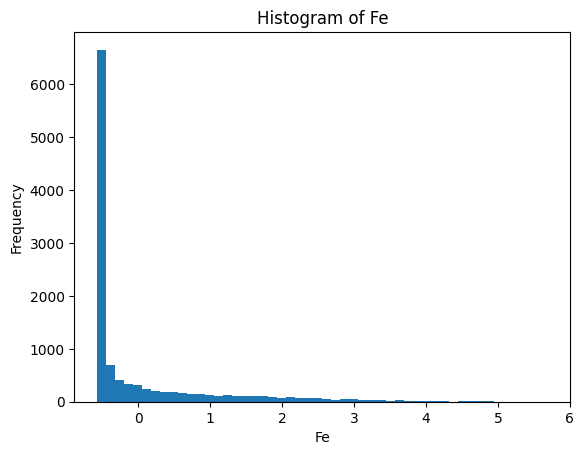

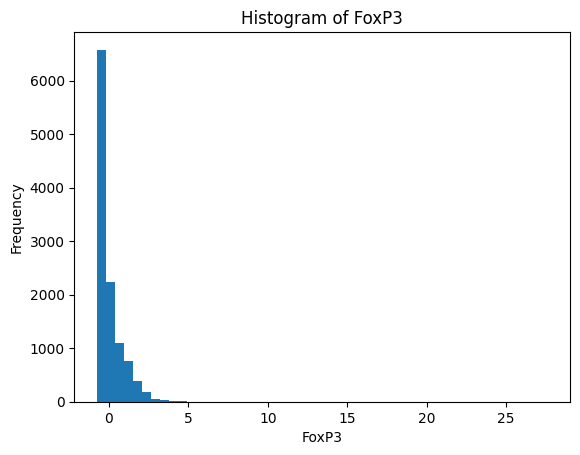

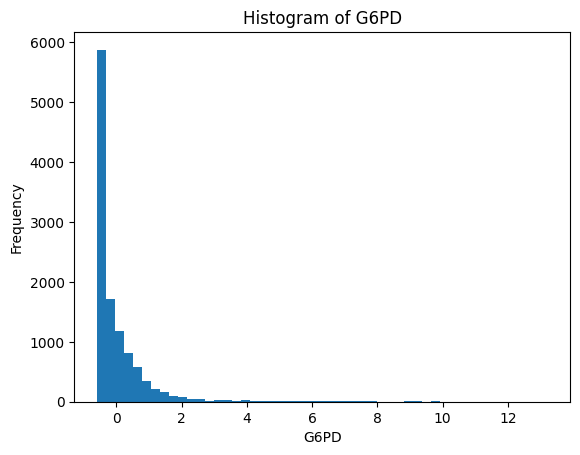

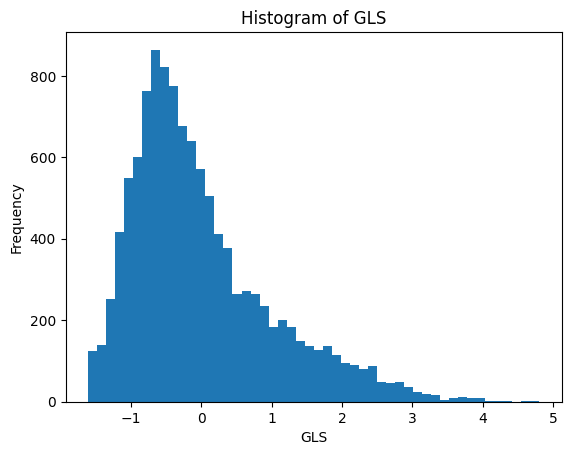

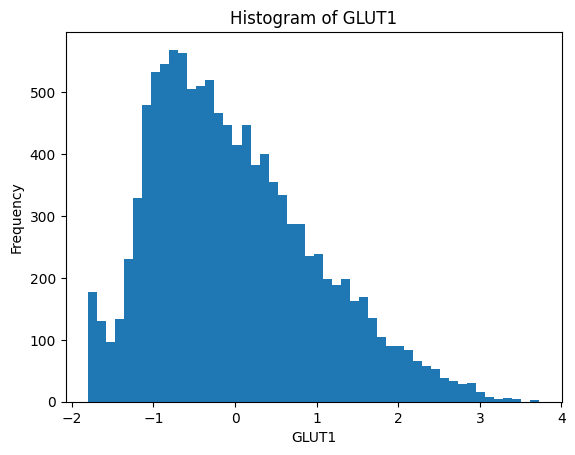

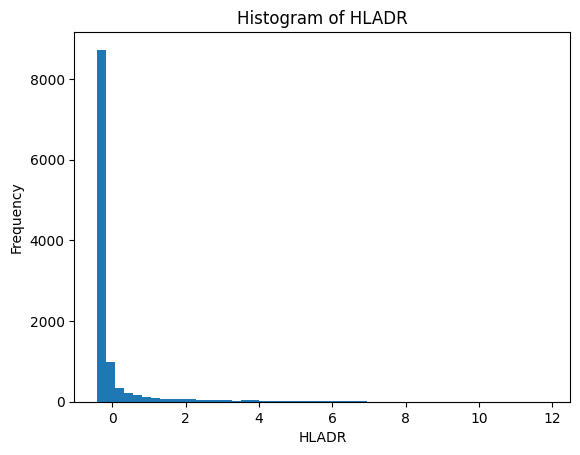

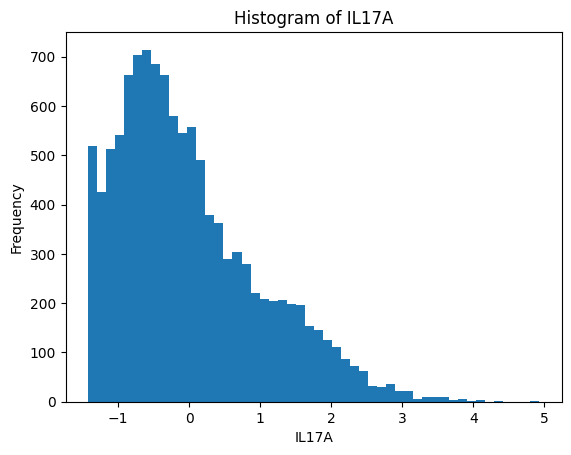

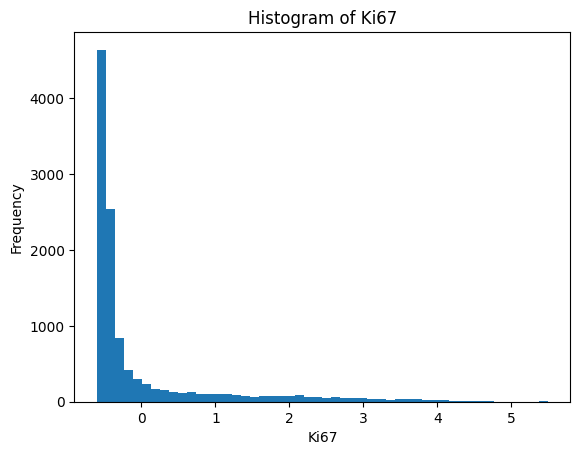

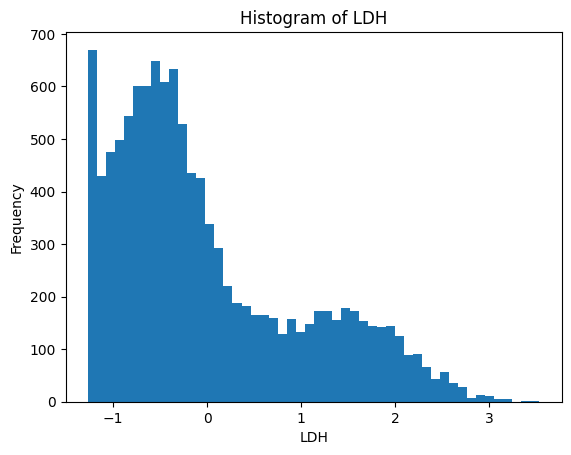

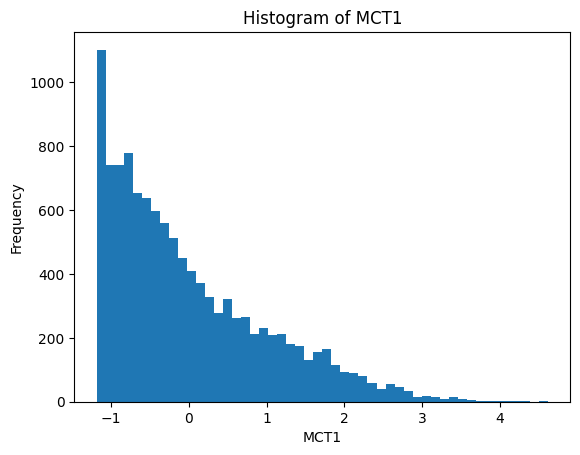

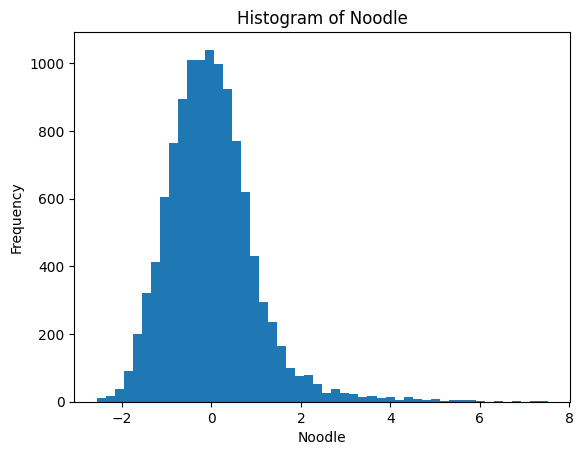

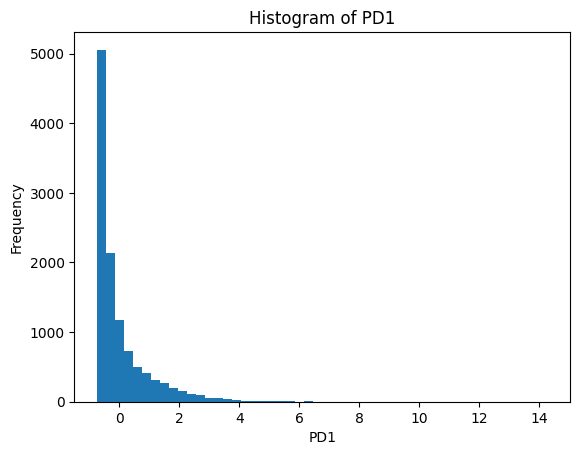

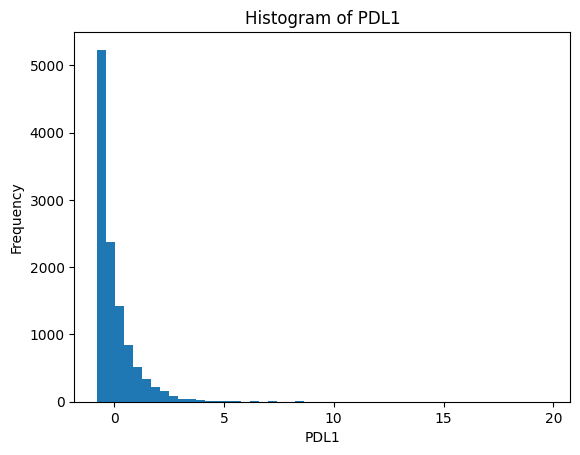

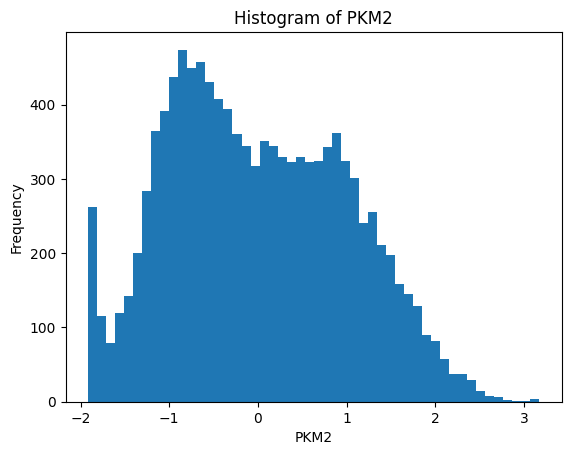

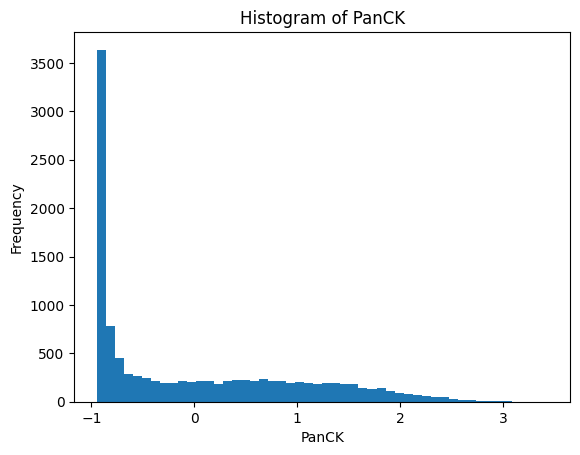

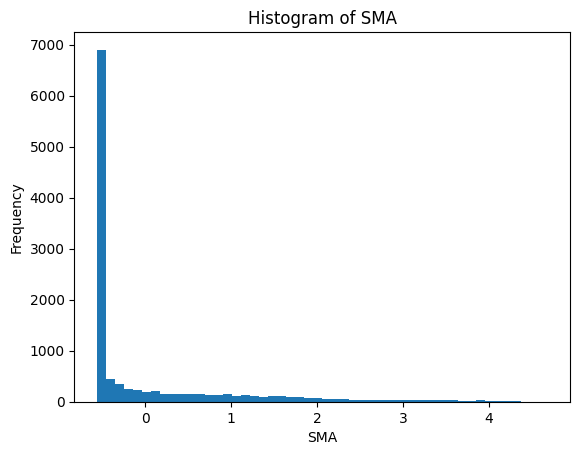

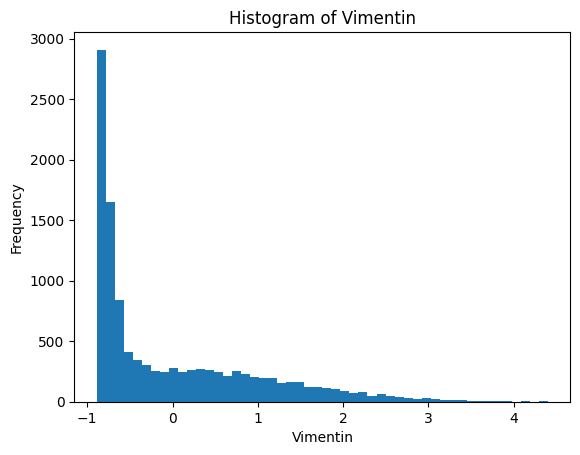

In [20]:
for column in channel_columns:
    plt.figure()  
    plt.hist(keren_df[column], bins=50) 
    plt.title(f'Histogram of {column}')  
    plt.xlabel(column)  
    plt.ylabel('Frequency') 
    plt.show()  

In [21]:
#Greenbaum paper: linearly scaled with a scaling factor of 100 and ArcSinh-transformed with a co-factor of 5.
                # All mass channels were normalized to the 99th percentile
#https://www.nature.com/articles/s41586-023-06298-9#Sec8

greenbaum_df= df.copy()
greenbaum_df=(greenbaum_df[channel_columns]*100)
greenbaum_df[channel_columns] = np.arcsinh(greenbaum_df[channel_columns] * 5)

percentiles = greenbaum_df[channel_columns].apply(lambda col: np.percentile(col, 99.9))
greenbaum_df[channel_columns] = greenbaum_df[channel_columns].divide(percentiles)

In [39]:
greenbaum_df.to_csv('greenbaumetal_norm_df.csv')

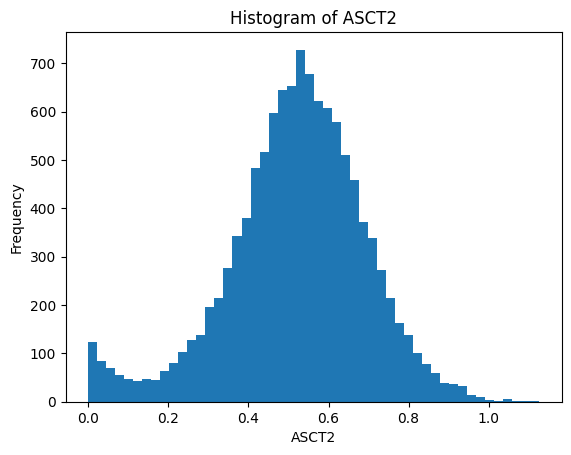

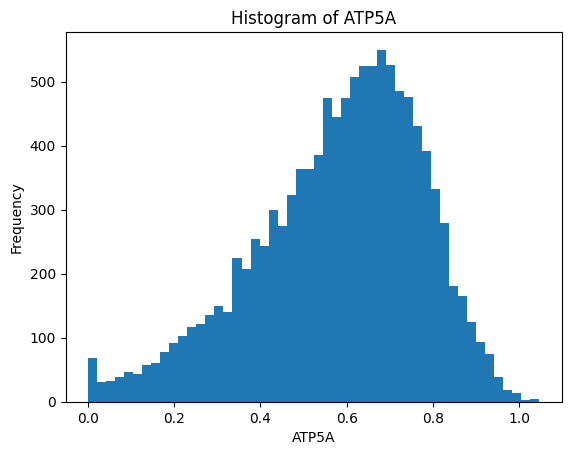

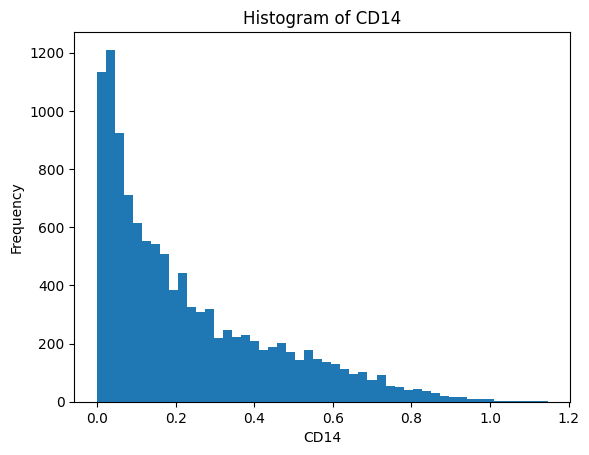

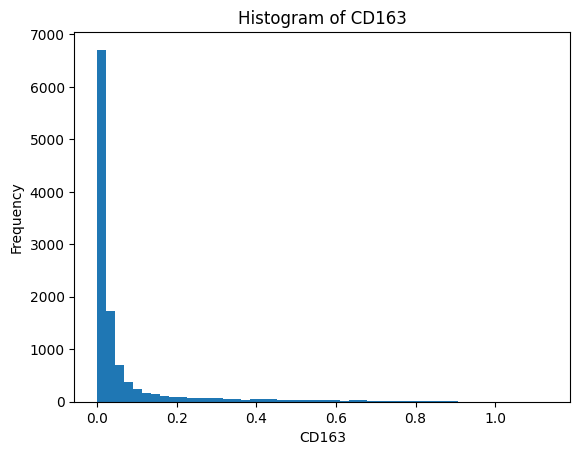

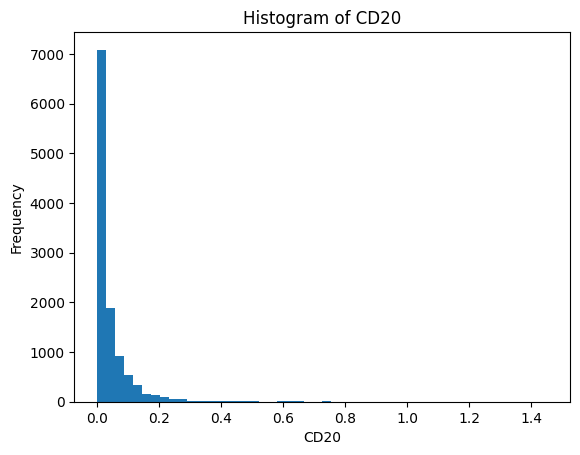

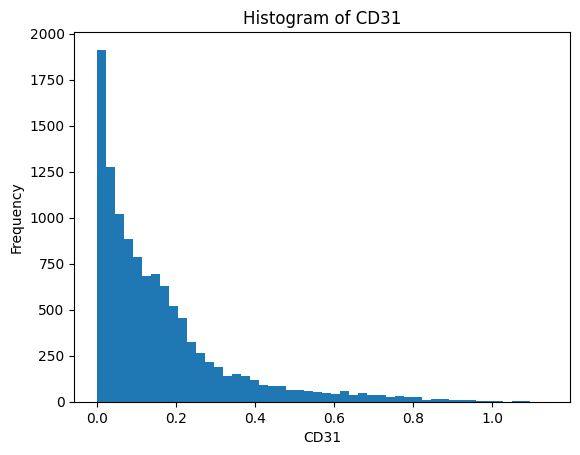

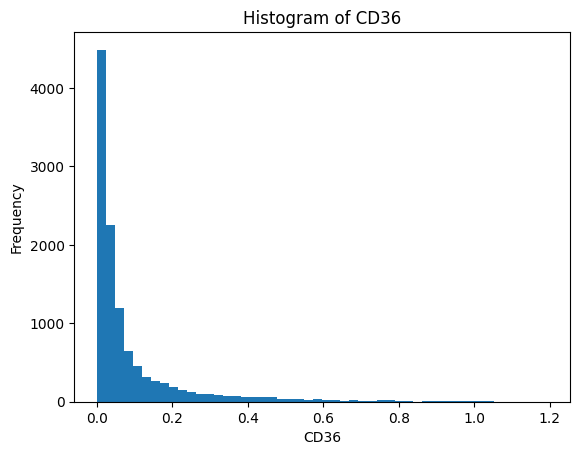

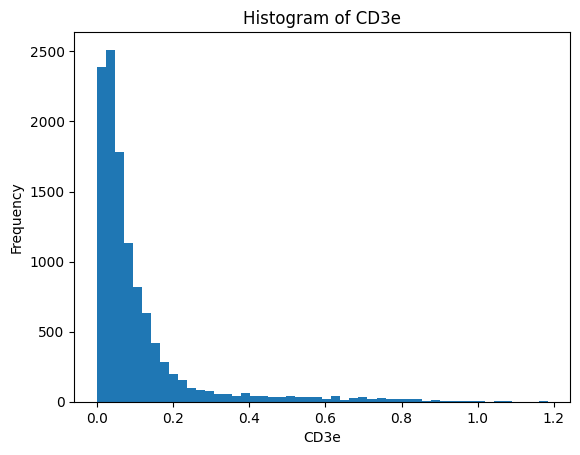

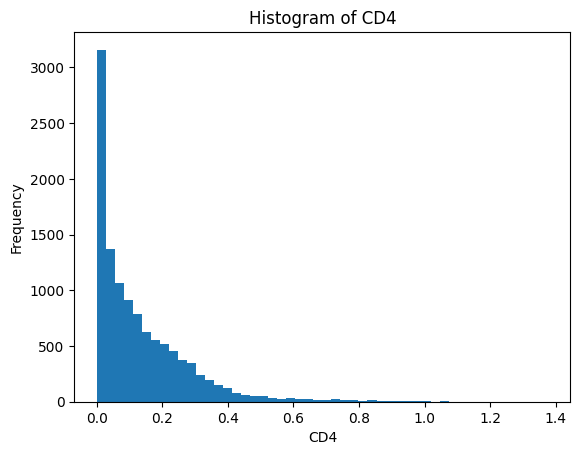

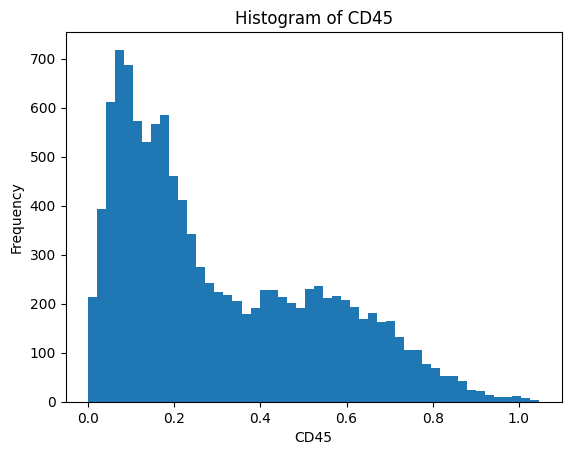

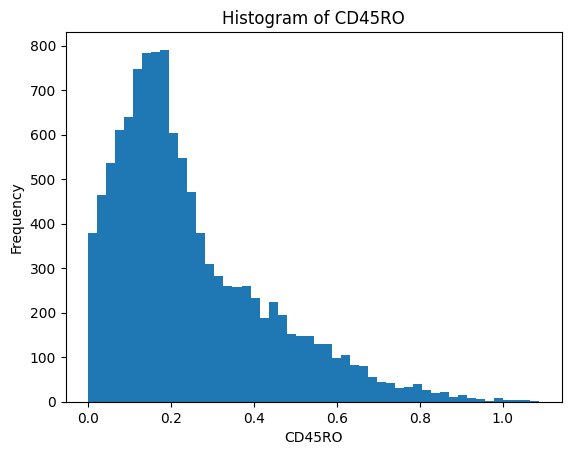

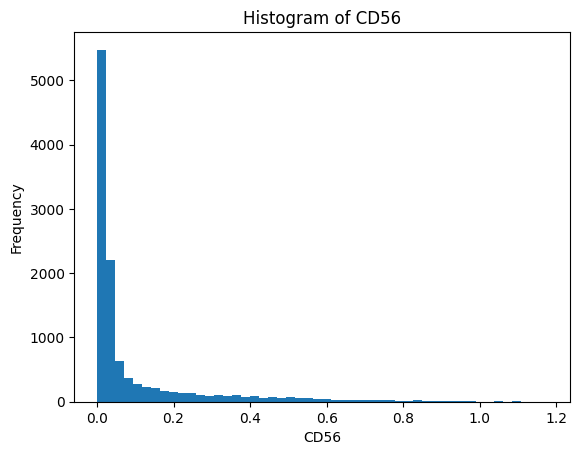

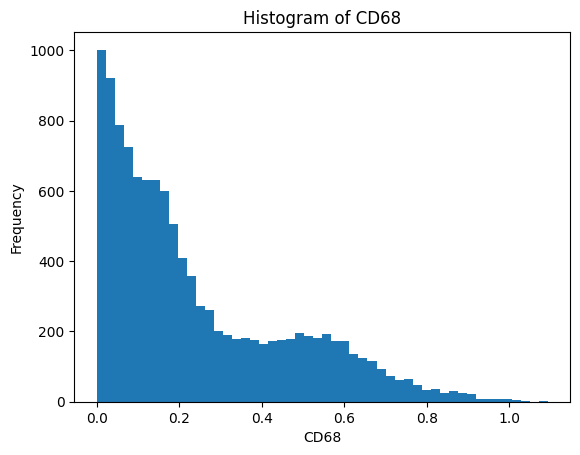

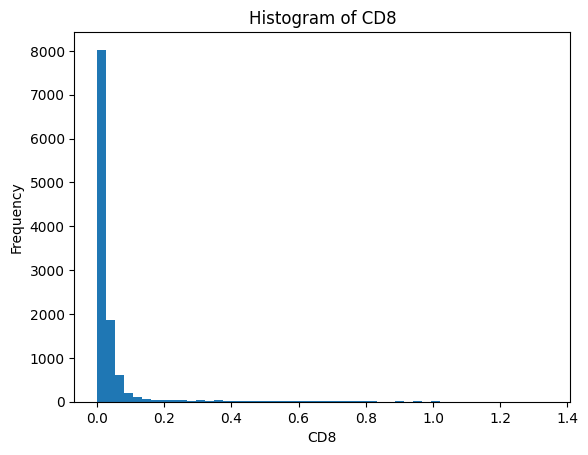

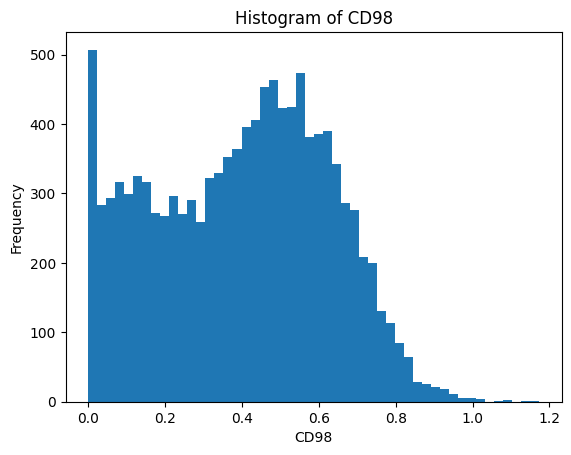

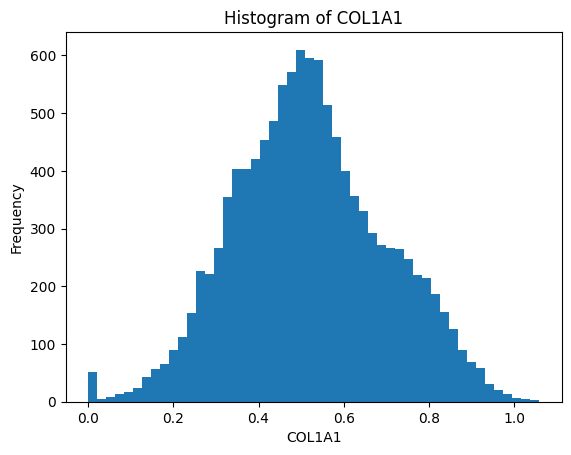

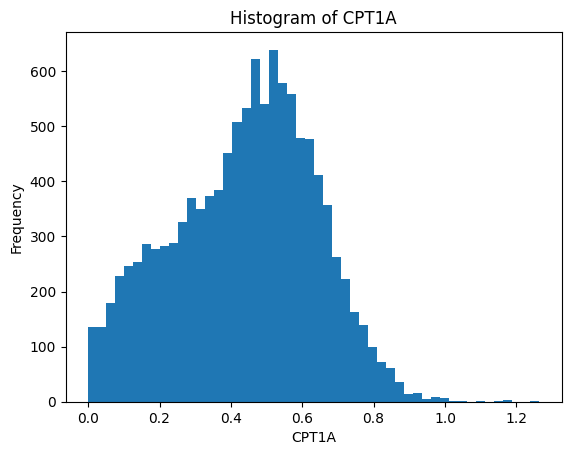

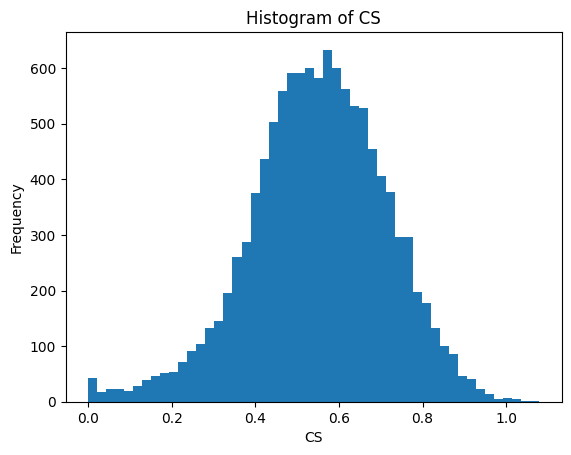

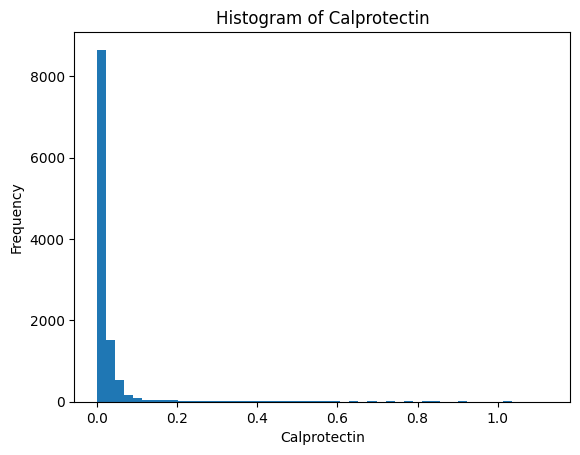

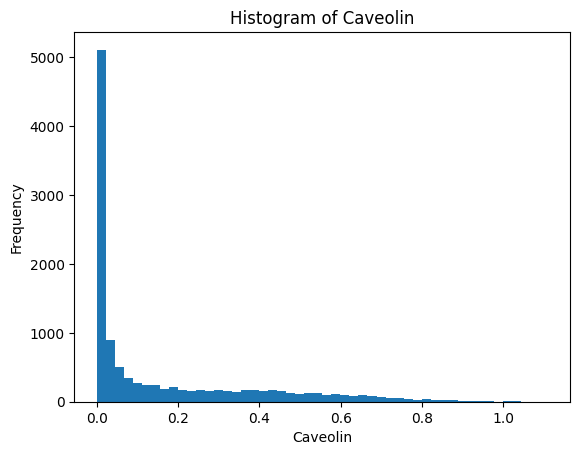

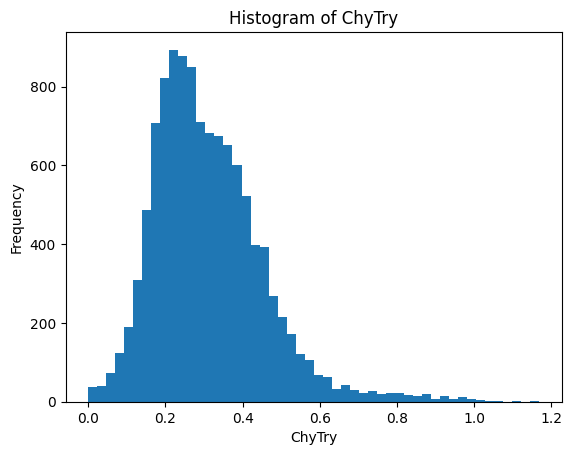

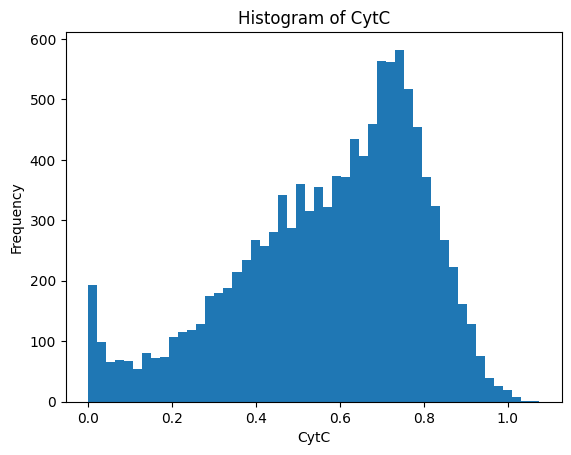

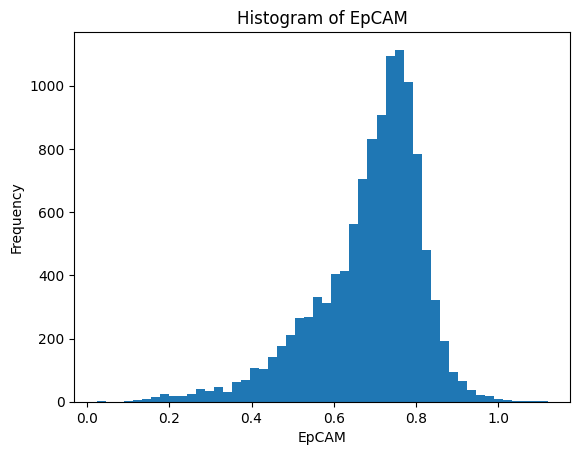

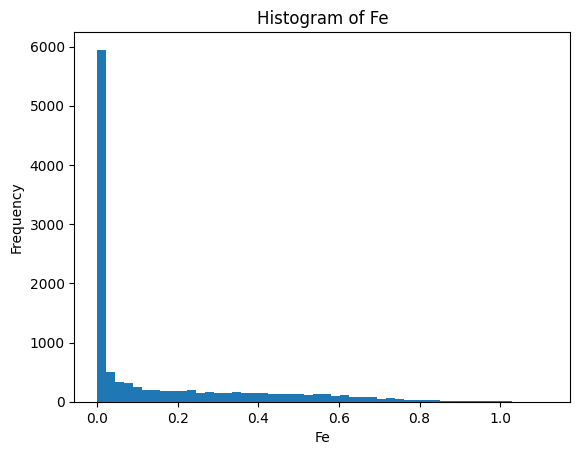

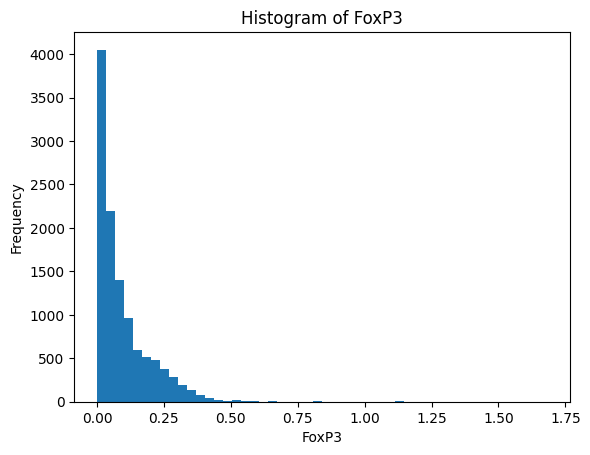

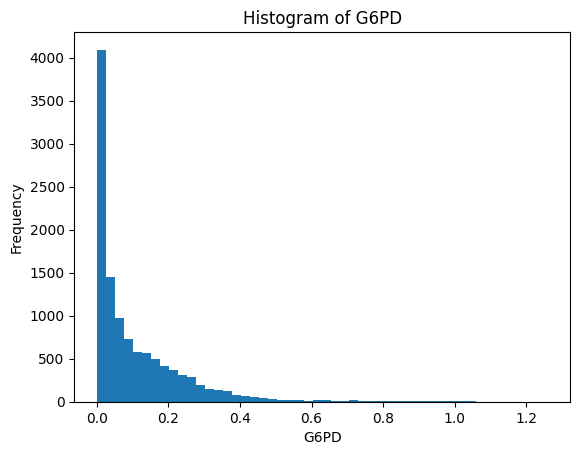

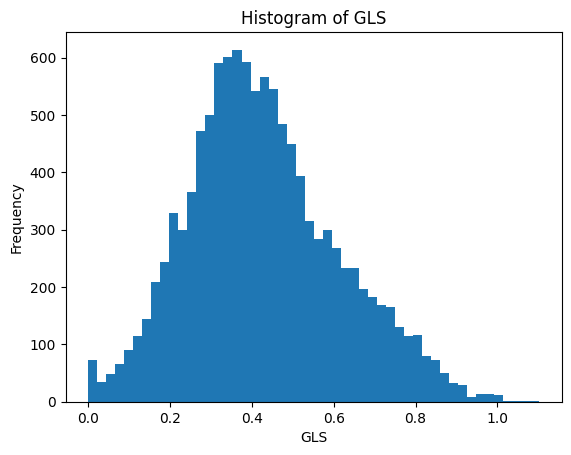

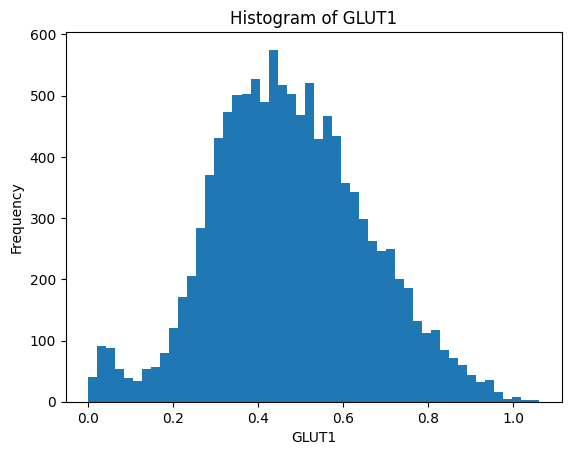

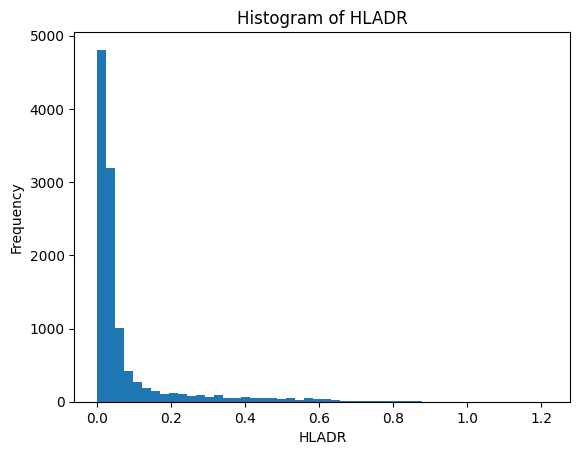

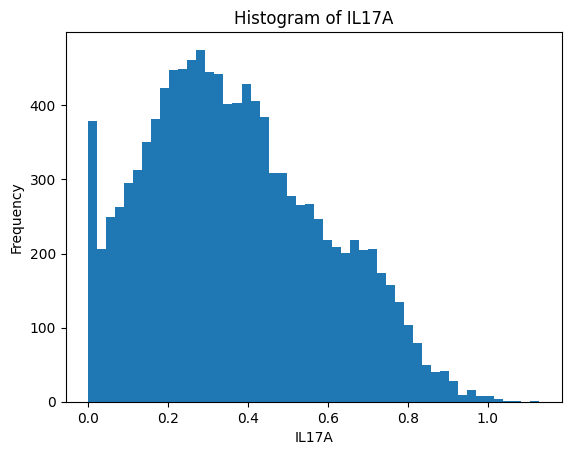

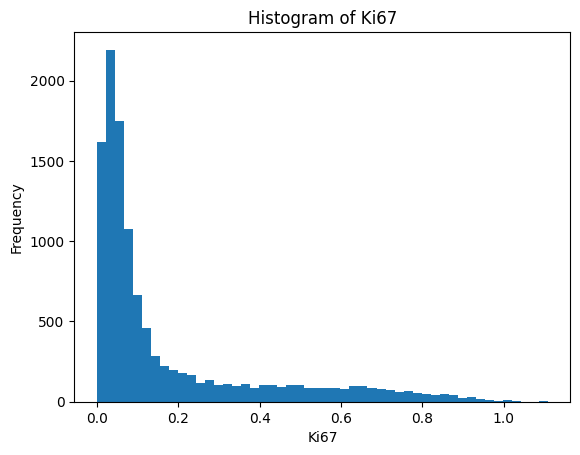

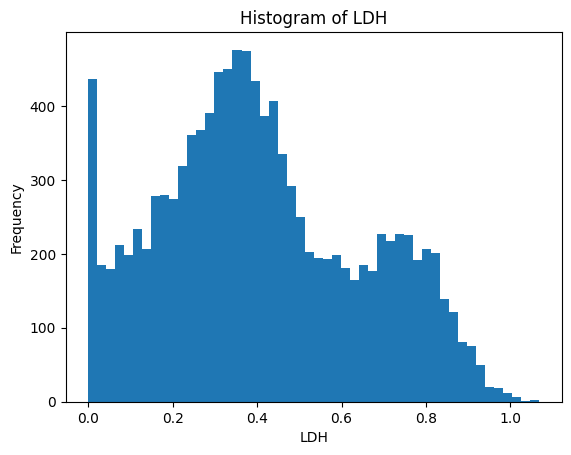

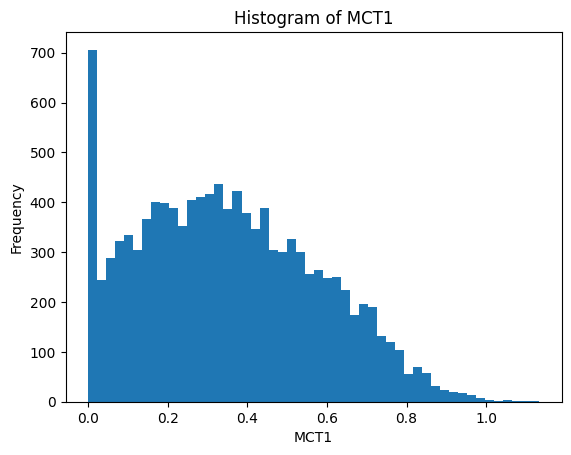

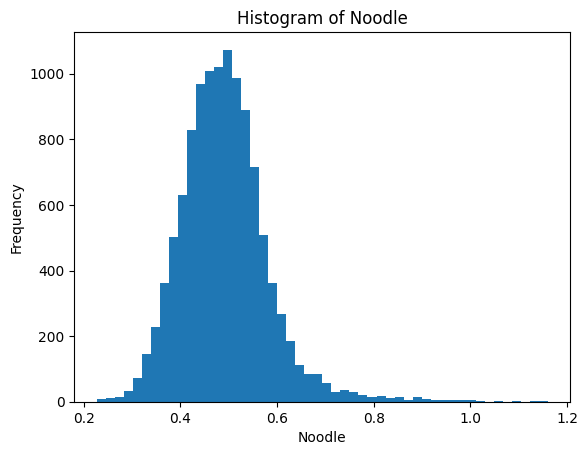

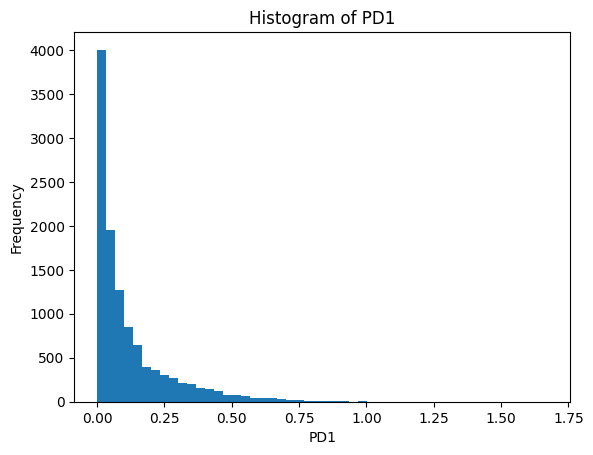

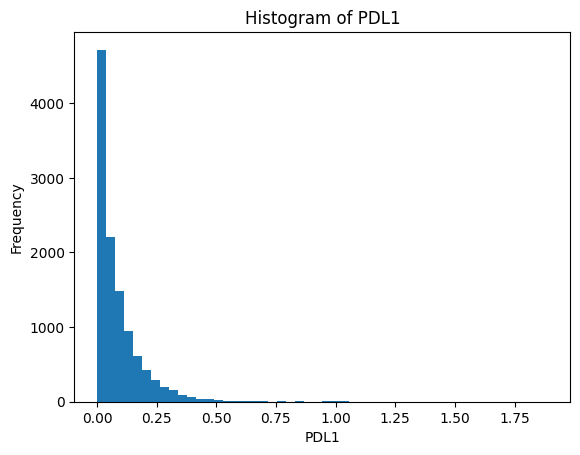

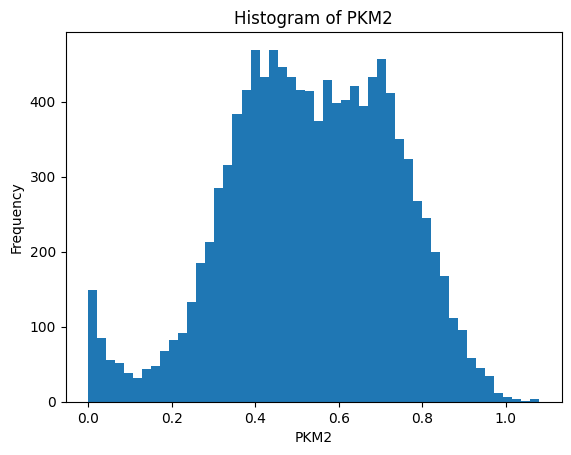

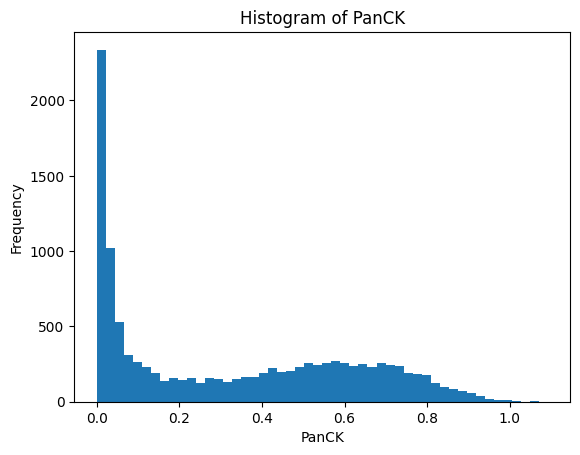

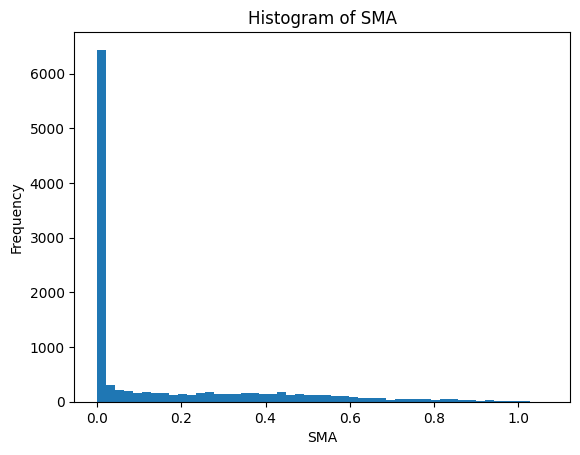

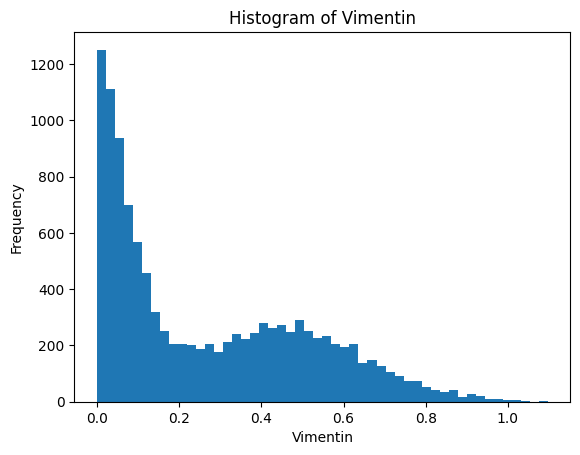

In [22]:
for column in channel_columns:
    plt.figure()  
    plt.hist(greenbaum_df[column], bins=50) 
    plt.title(f'Histogram of {column}')  
    plt.xlabel(column)  
    plt.ylabel('Frequency') 
    plt.show()  

In [28]:
#the average Histone H3 counts under cell segmentation masks of each FOV were calculated, 
# then, all FOVs Histone H3 counts were normalized towards the highest counts,
#  while other channels were multiplied by the same coefficient.


maps_df= df.copy()

# Calculate the average of the 'nuclei' column per 'fov'
average_nuclei_per_fov = maps_df.groupby('fov')['nuclei'].mean()

# Find the maximum average 'nuclei' count
max_average_nuclei = average_nuclei_per_fov.max()


# Normalize the 'nuclei' counts towards the highest counts
maps_df['nuclei'] = maps_df['nuclei'] / max_average_nuclei

coefficient= 1/ max_average_nuclei


# Multiply the other columns in channel_columns by the same coefficient
maps_df[channel_columns]= maps_df[channel_columns]*coefficient

In [40]:
maps_df.to_csv('mapsetal_norm_df.csv')

In [32]:
print(df[channel_columns].max())

ASCT2           0.133697
ATP5A           0.118636
CD14            0.042863
CD163           0.033228
CD20            0.029629
CD31            0.113522
CD36            0.088375
CD3e            0.054539
CD4             0.049802
CD45            0.149270
CD45RO          0.074590
CD56            0.079688
CD68            0.383469
CD8             0.110414
CD98            0.091970
COL1A1          0.304098
CPT1A           0.049161
CS              0.079025
Calprotectin    0.324903
Caveolin        0.243914
ChyTry          2.124646
CytC            0.220186
EpCAM           1.108135
Fe              0.327628
FoxP3           0.033296
G6PD            0.057780
GLS             0.047932
GLUT1           0.200086
HLADR           0.307409
IL17A           0.010533
Ki67            0.085755
LDH             0.045599
MCT1            0.138901
Noodle          2.947673
PD1             0.005985
PDL1            0.002865
PKM2            0.180137
PanCK           0.110672
SMA             0.967301
Vimentin        0.273197


In [33]:
print(maps_df[channel_columns].max())

ASCT2            0.971683
ATP5A            0.862220
CD14             0.311518
CD163            0.241493
CD20             0.215336
CD31             0.825056
CD36             0.642288
CD3e             0.396376
CD4              0.361953
CD45             1.084864
CD45RO           0.542101
CD56             0.579153
CD68             2.786974
CD8              0.802468
CD98             0.668416
COL1A1           2.210120
CPT1A            0.357292
CS               0.574339
Calprotectin     2.361328
Caveolin         1.772716
ChyTry          15.441479
CytC             1.600265
EpCAM            8.053691
Fe               2.381132
FoxP3            0.241990
G6PD             0.419930
GLS              0.348360
GLUT1            1.454184
HLADR            2.234181
IL17A            0.076552
Ki67             0.623250
LDH              0.331407
MCT1             1.009506
Noodle          21.423070
PD1              0.043499
PDL1             0.020821
PKM2             1.309195
PanCK            0.804342
SMA         

In [27]:
coefficient= 1/ max_average_nuclei
print(coefficient)

7.267789943260876


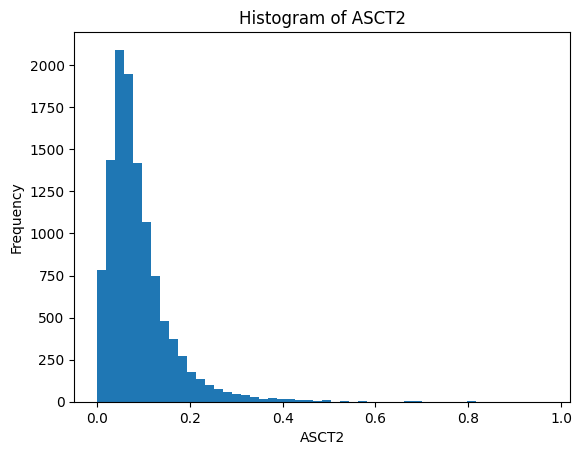

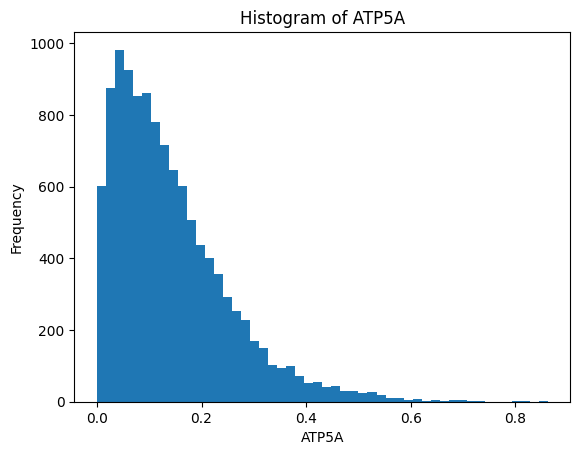

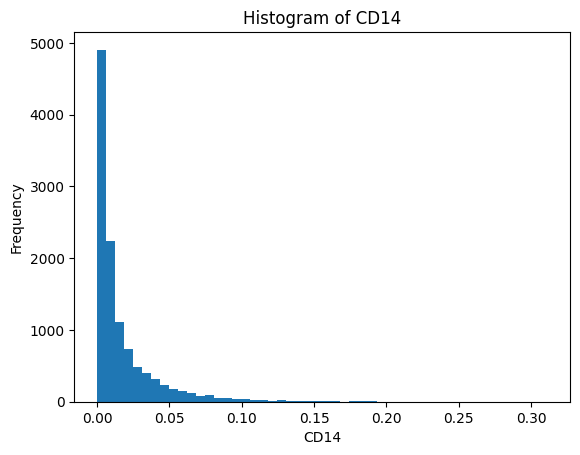

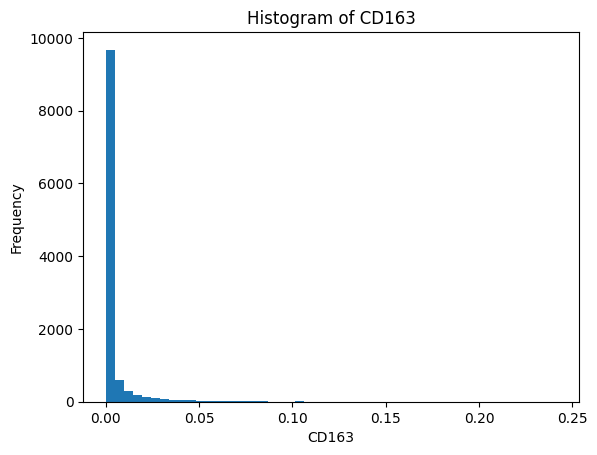

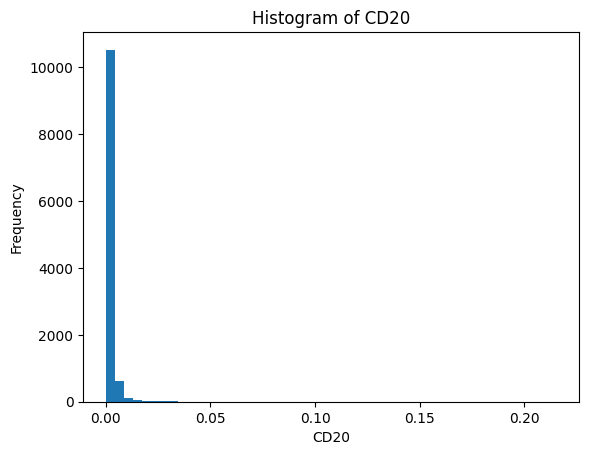

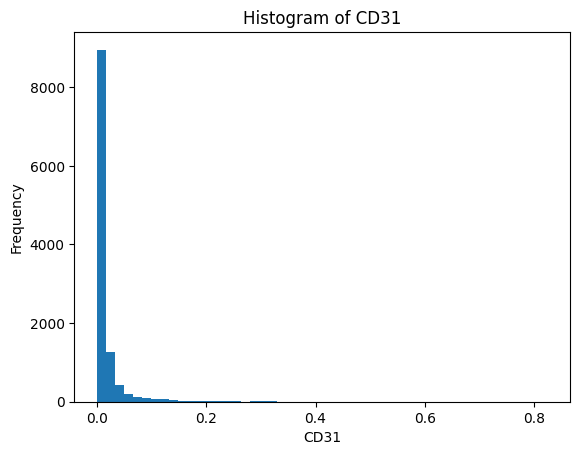

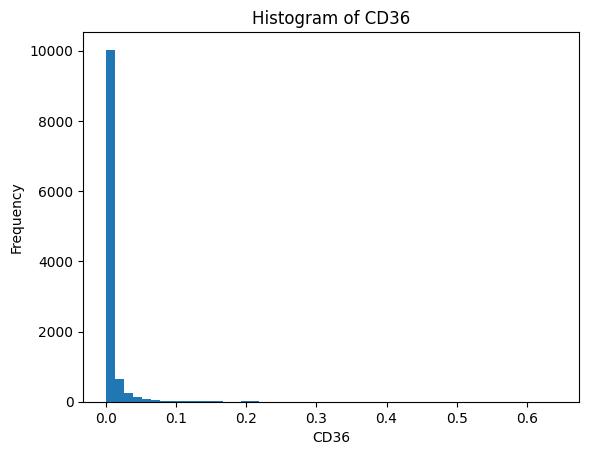

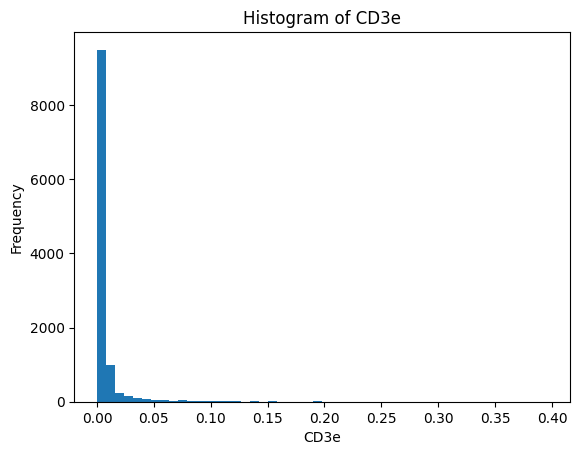

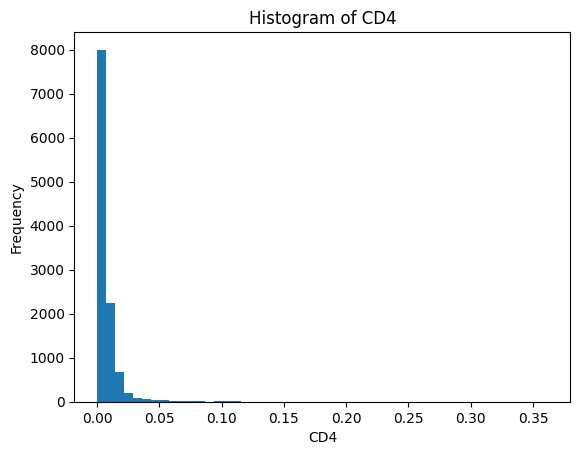

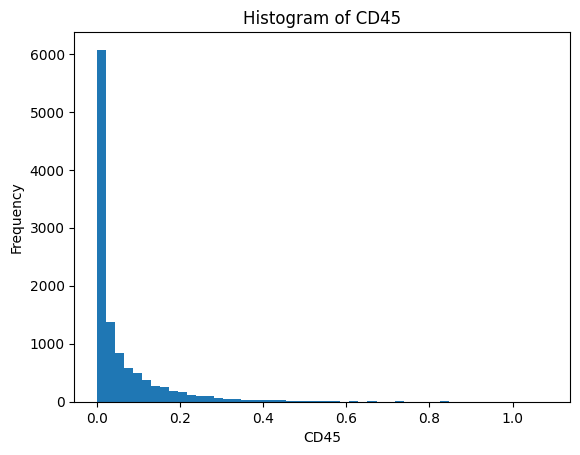

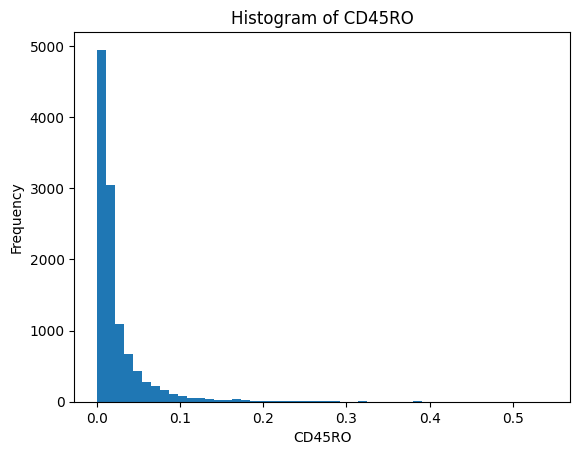

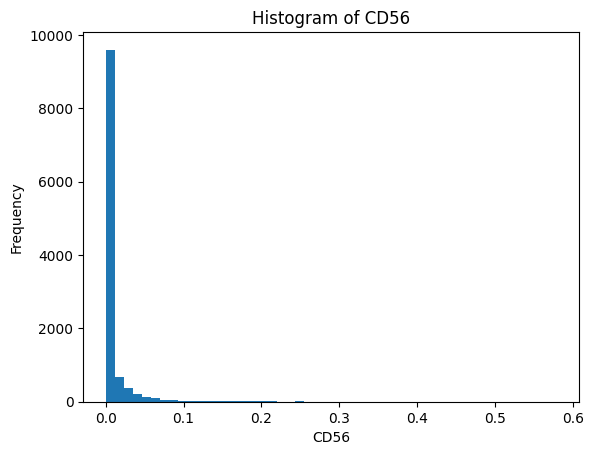

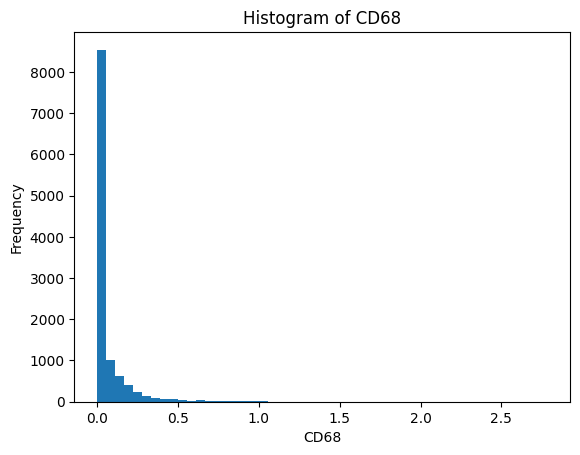

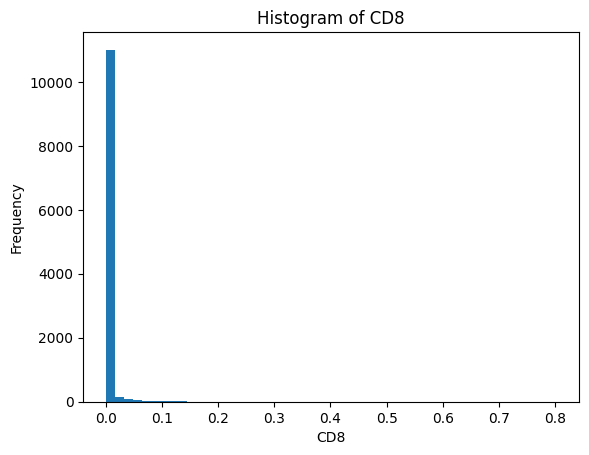

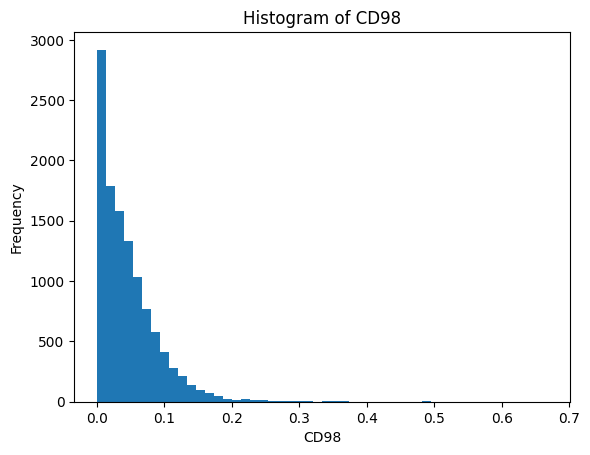

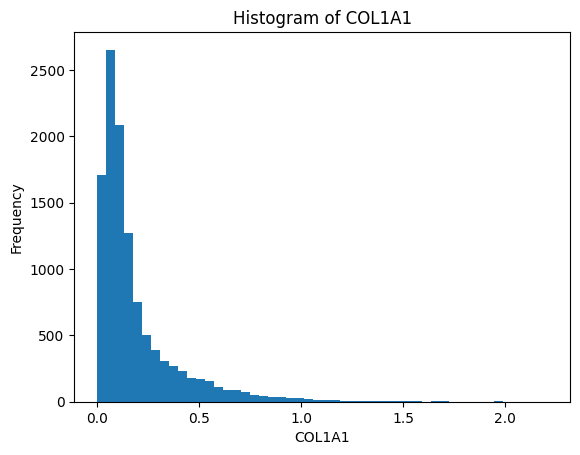

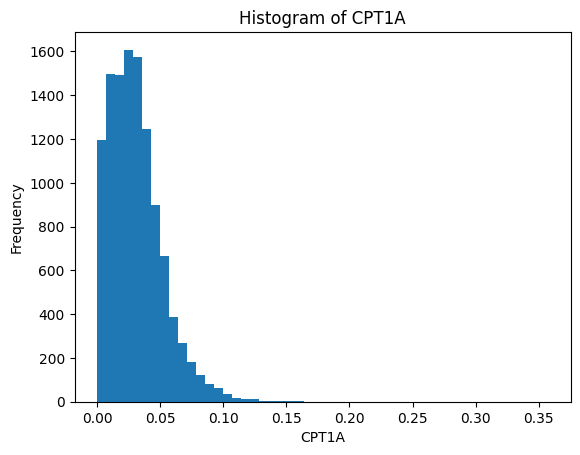

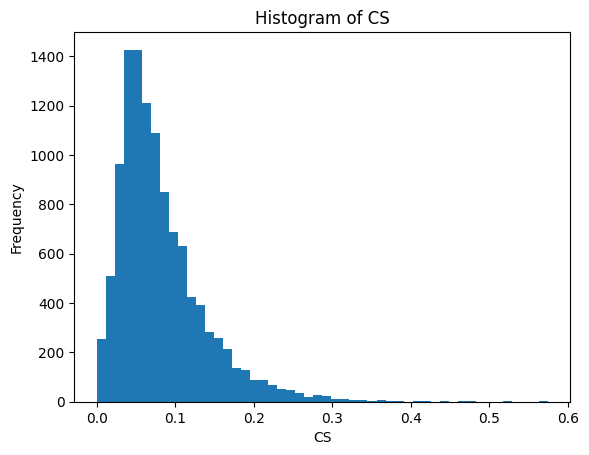

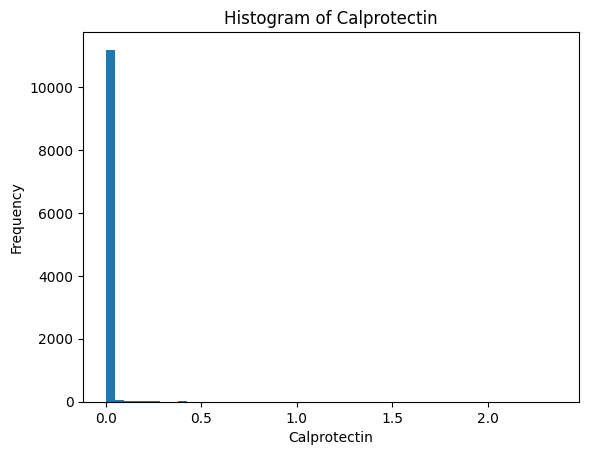

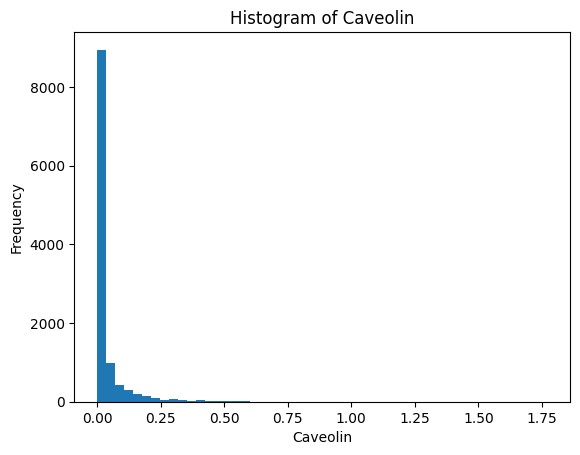

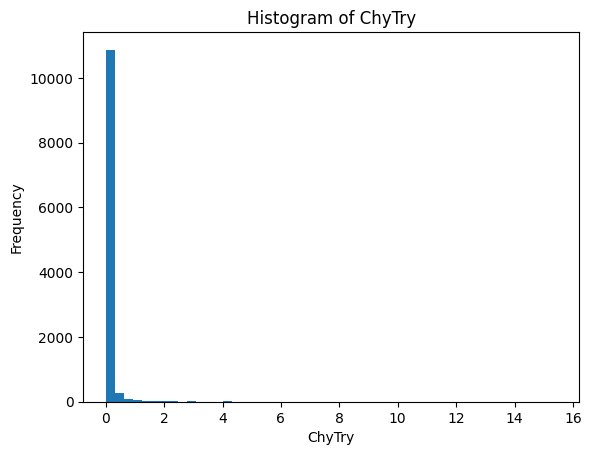

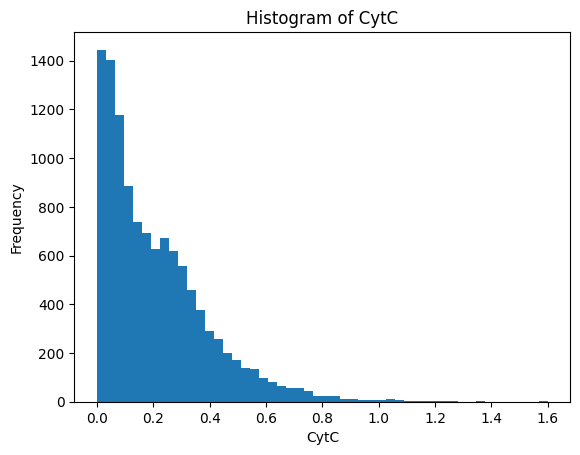

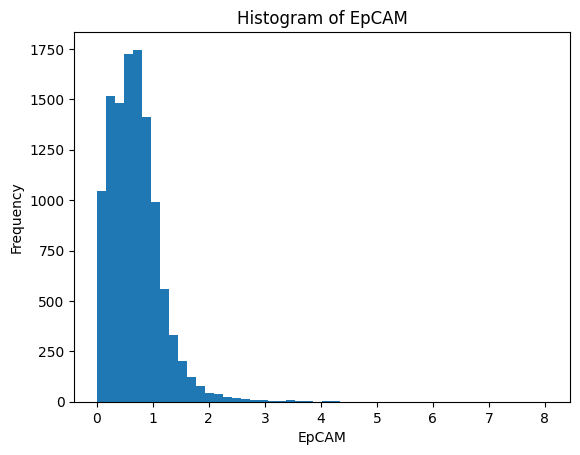

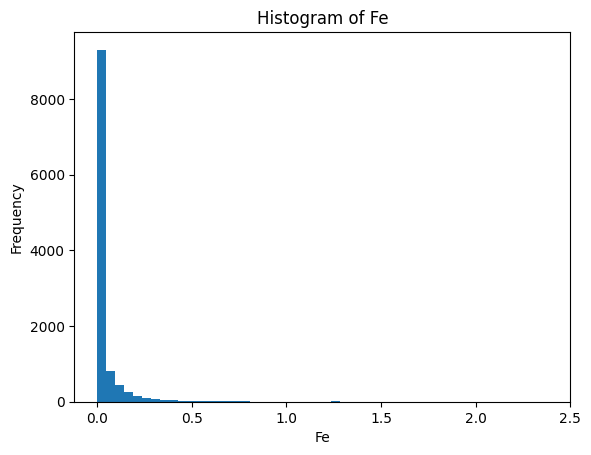

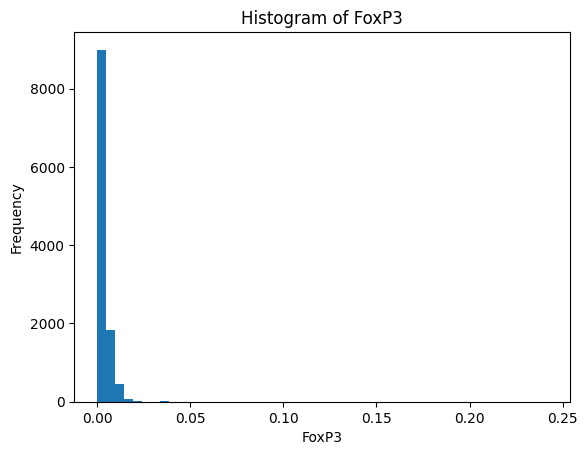

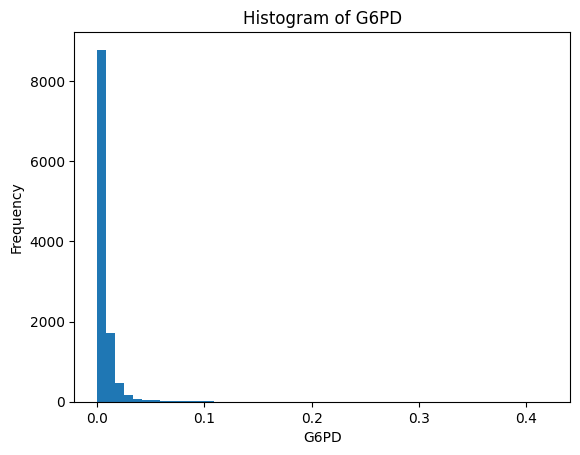

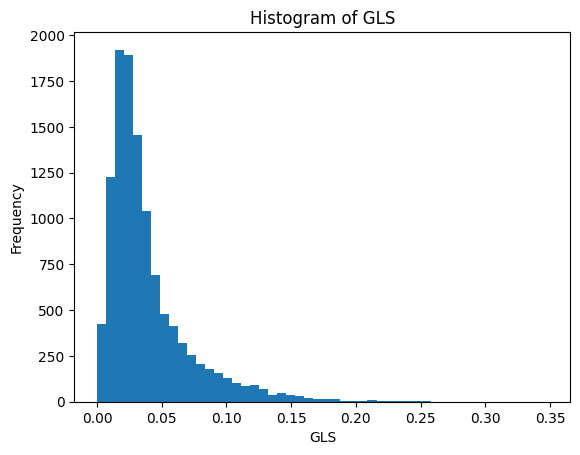

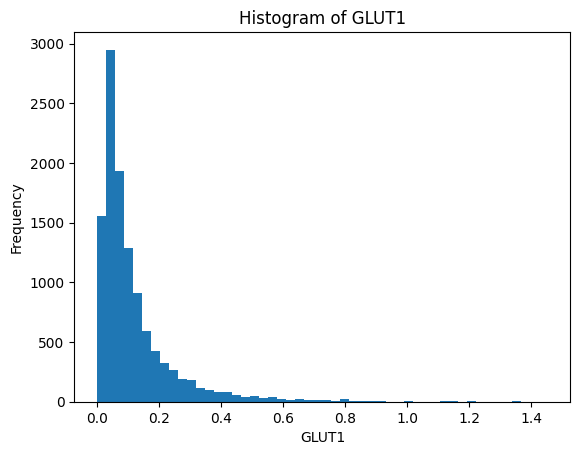

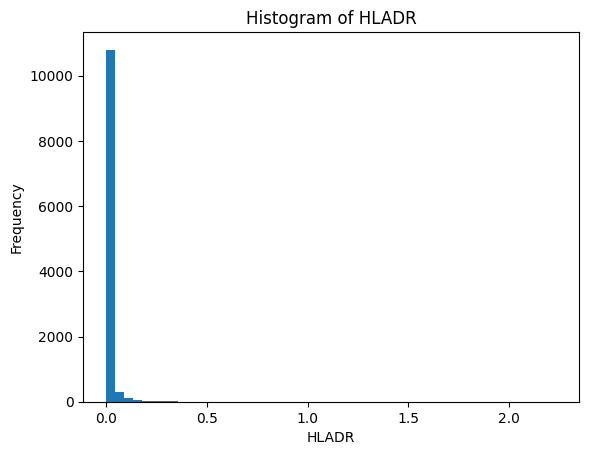

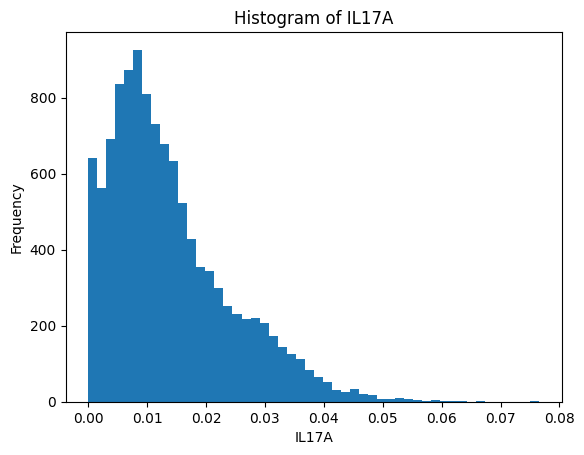

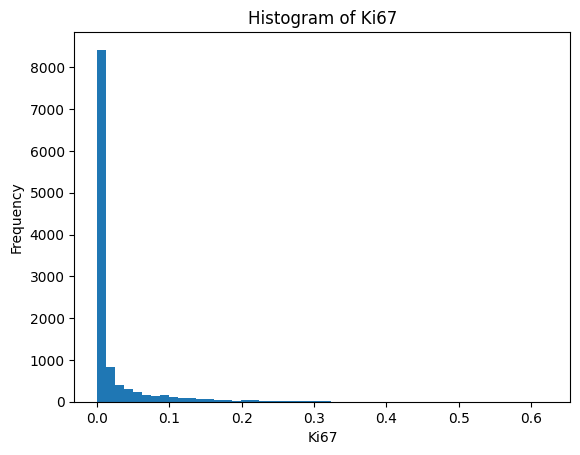

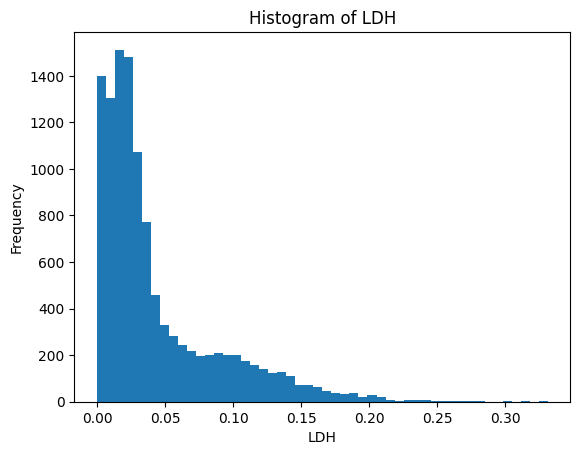

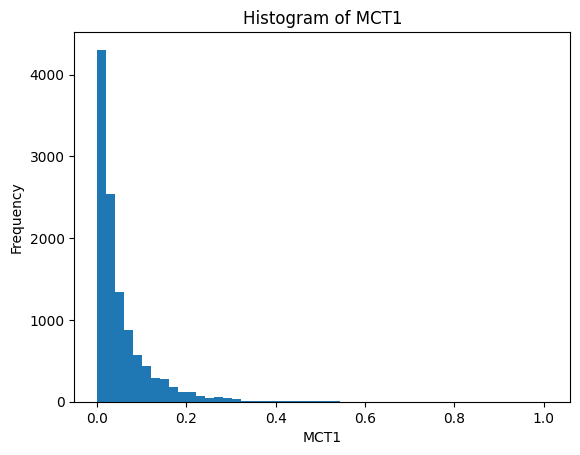

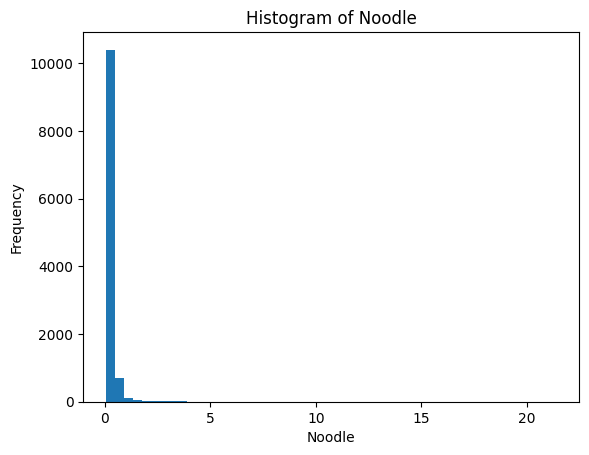

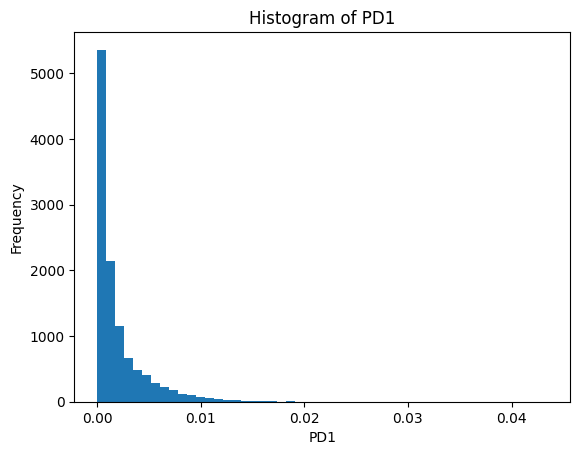

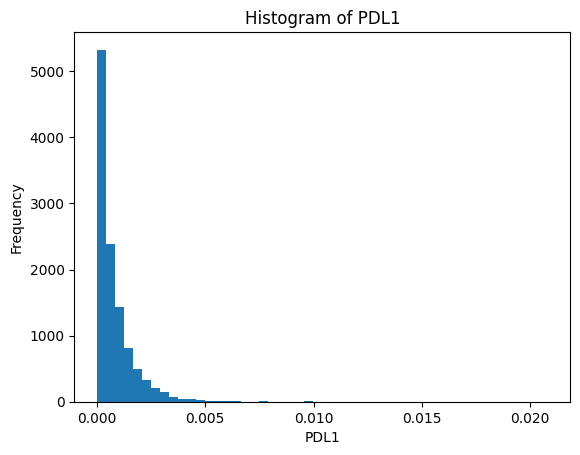

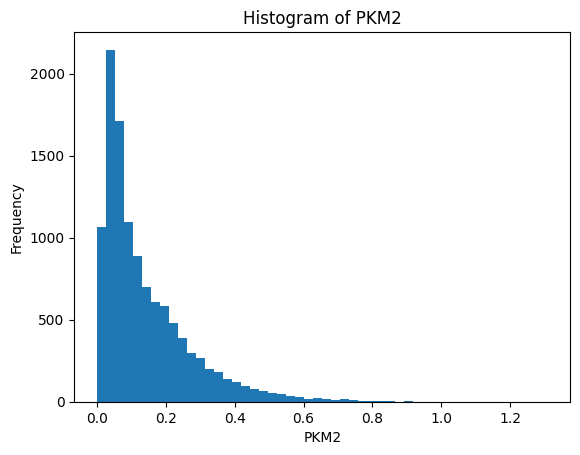

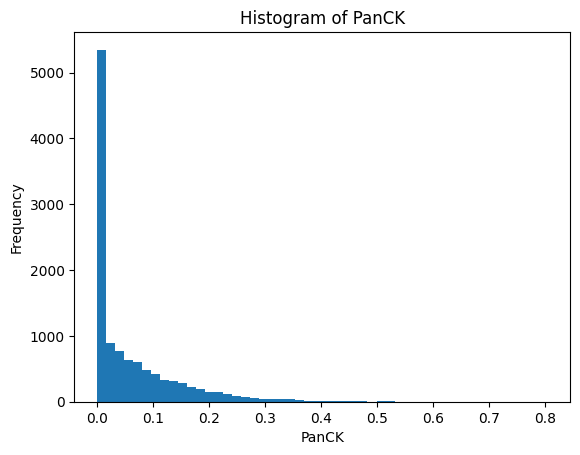

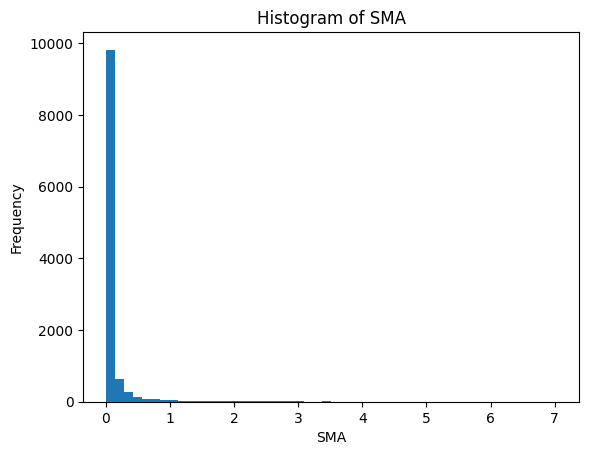

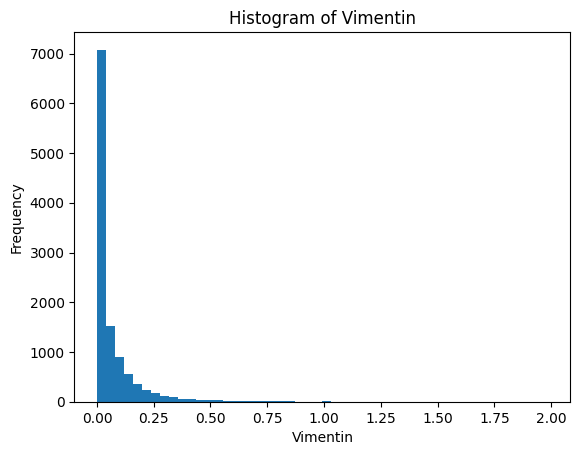

In [29]:
for column in channel_columns:
    plt.figure()  
    plt.hist(maps_df[column], bins=50) 
    plt.title(f'Histogram of {column}')  
    plt.xlabel(column)  
    plt.ylabel('Frequency') 
    plt.show() 

MAPS method followed by percentile normalisation:

In [34]:
#MAPS +percentile
maps_perc_df= maps_df.copy()
percentiles_maps = maps_perc_df[channel_columns].apply(lambda col: np.percentile(col, 99.9))
maps_perc_df[channel_columns] = maps_perc_df[channel_columns].divide(percentiles_maps)

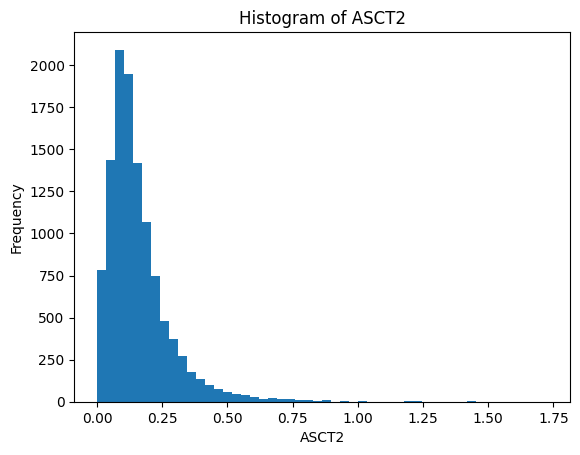

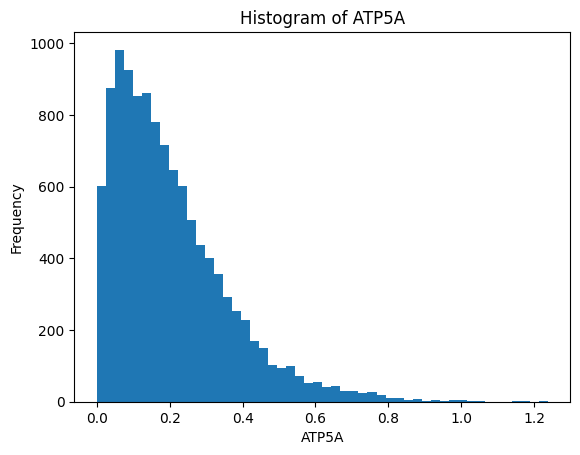

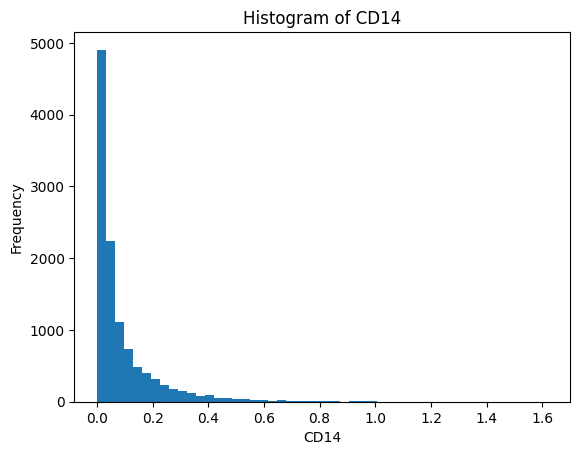

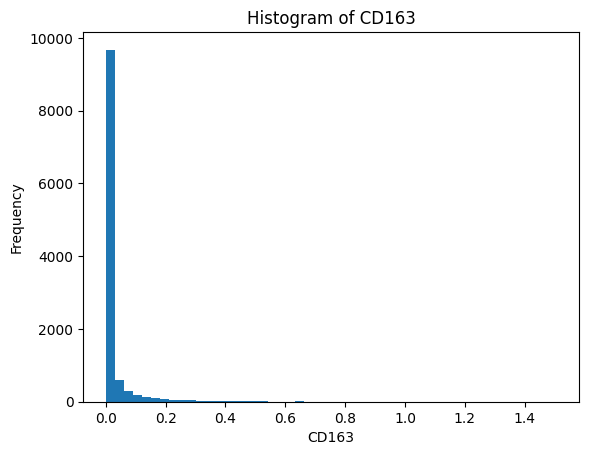

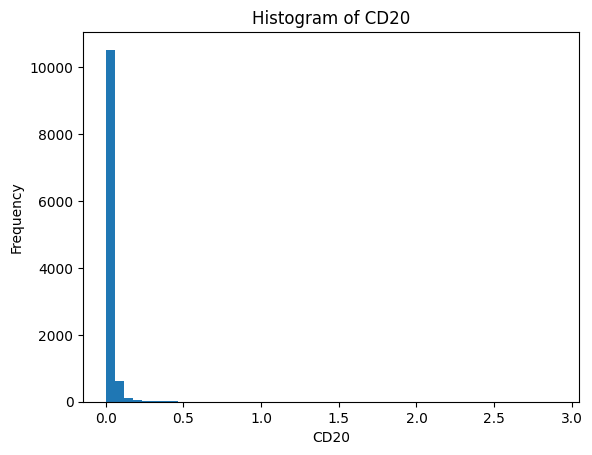

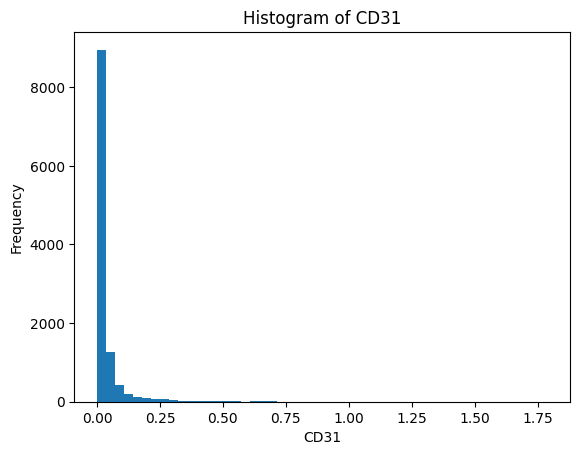

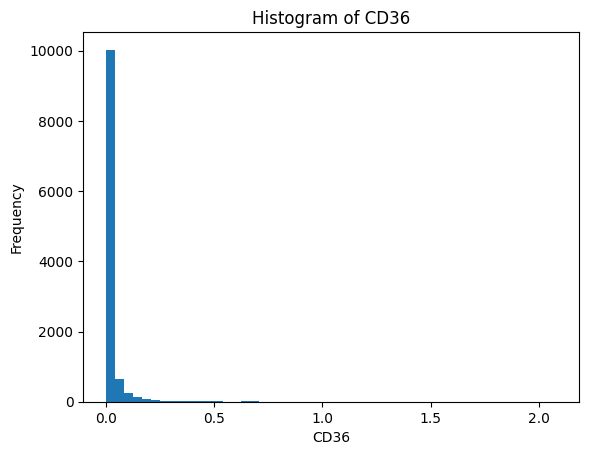

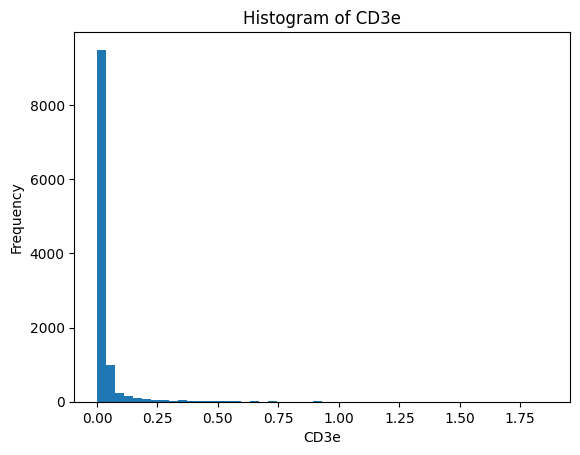

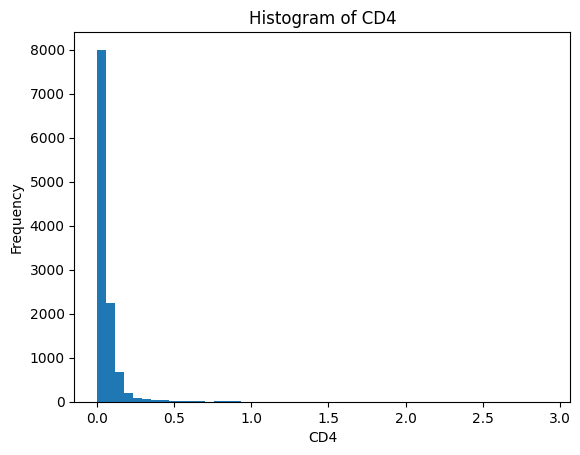

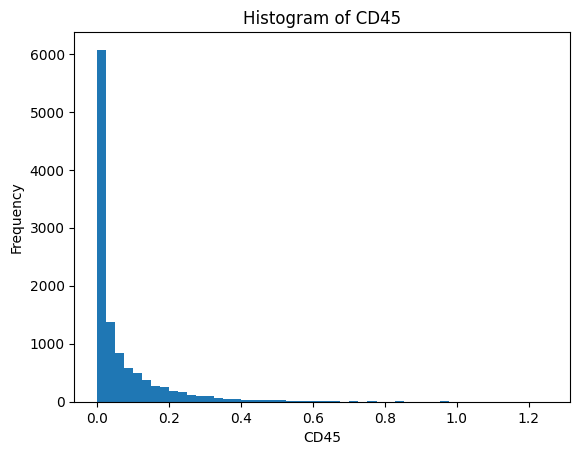

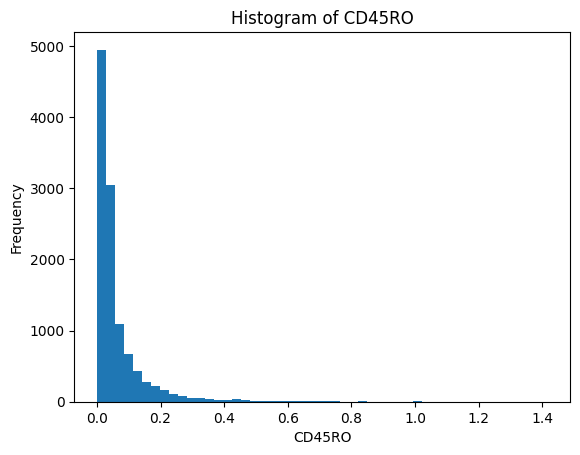

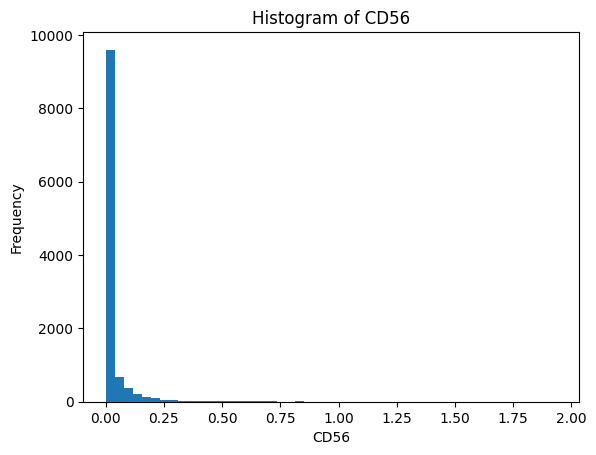

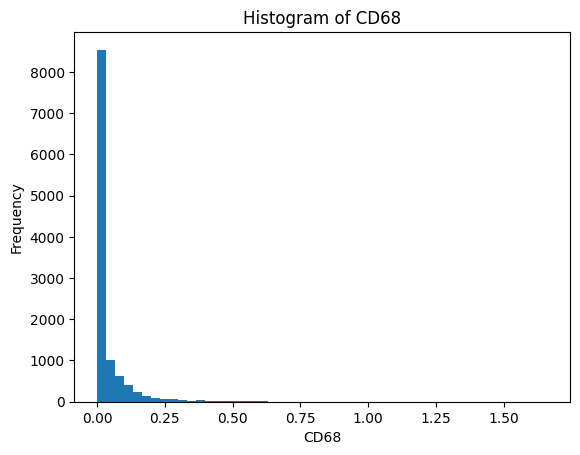

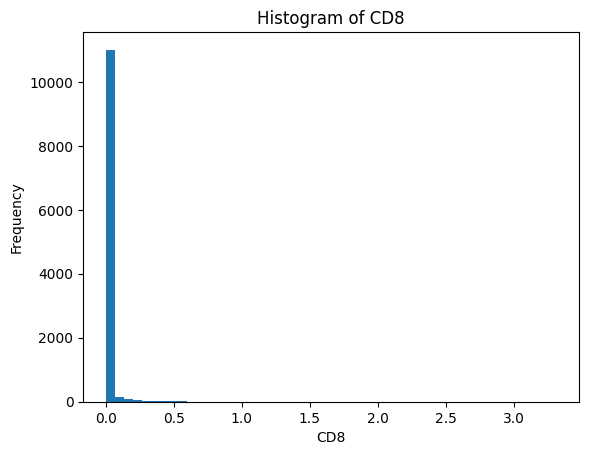

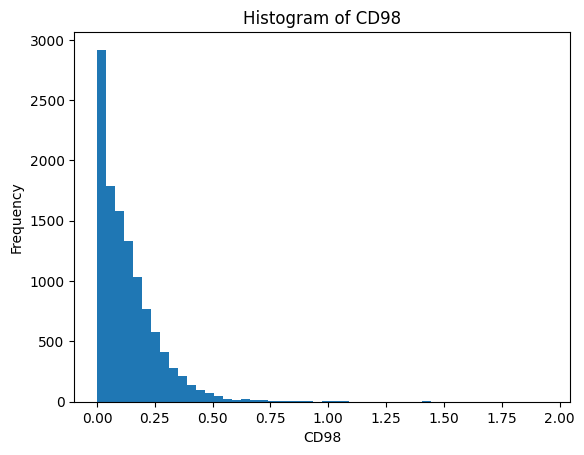

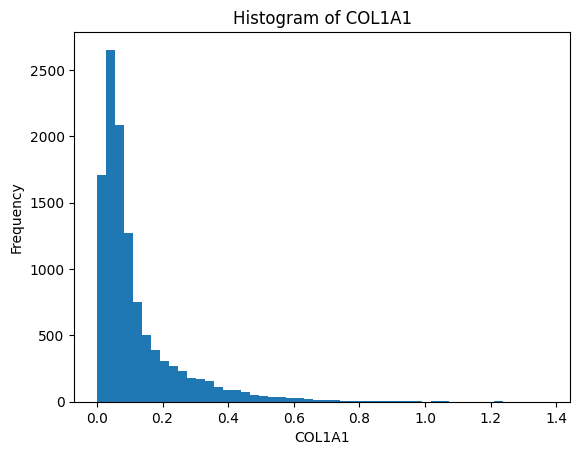

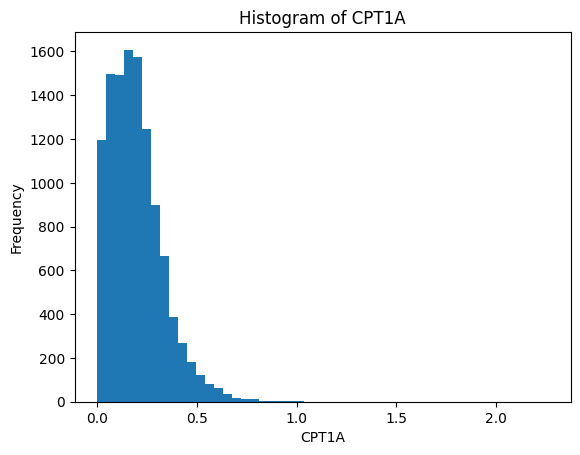

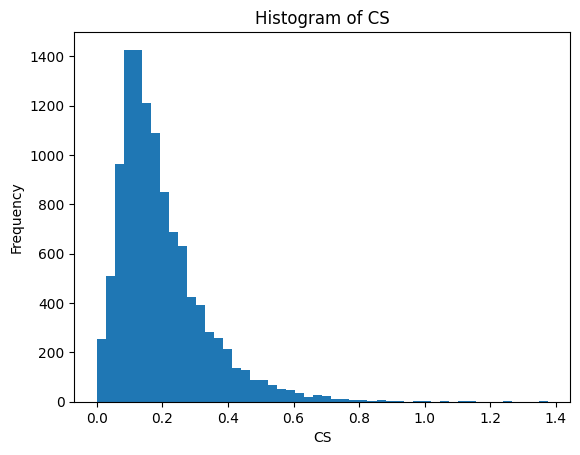

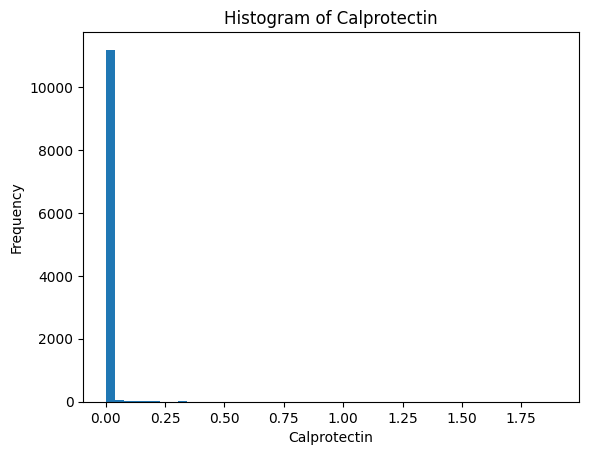

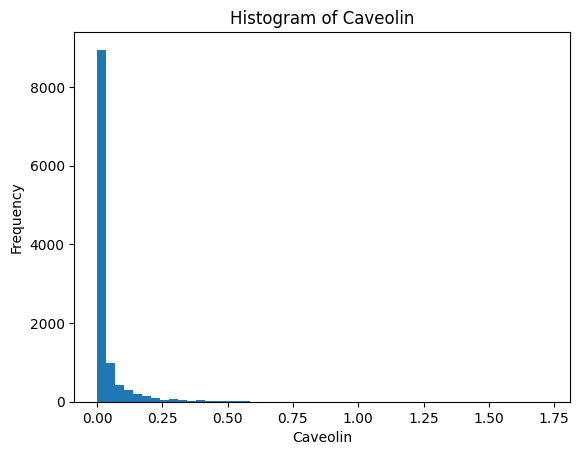

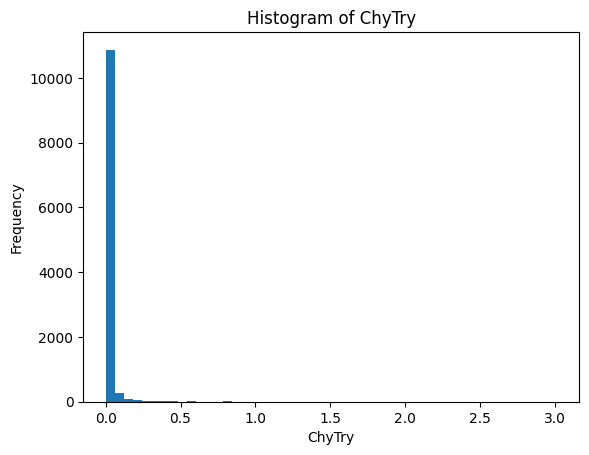

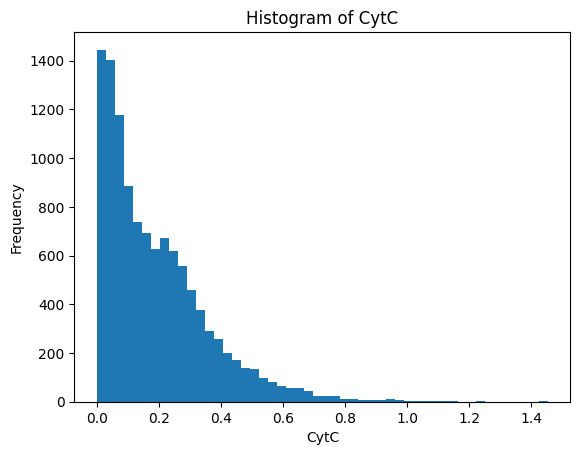

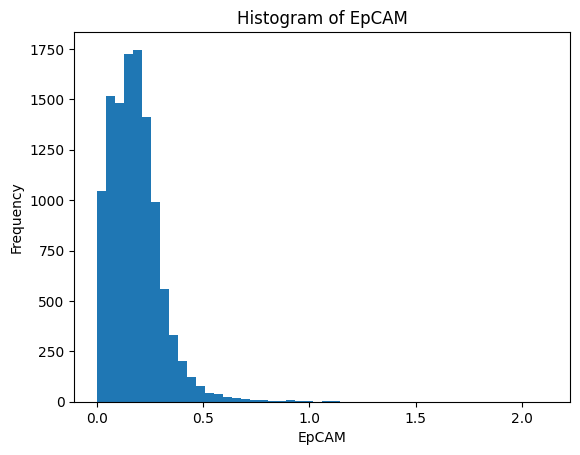

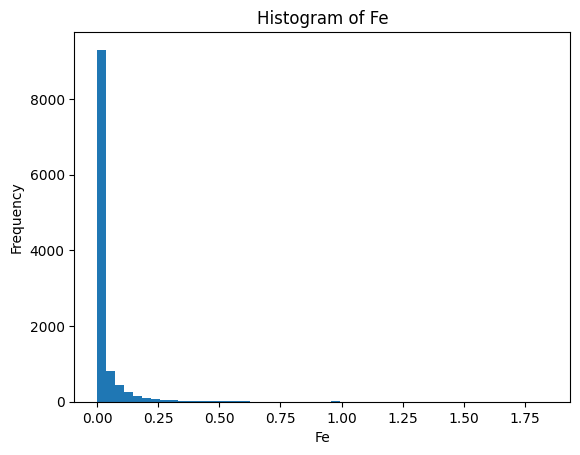

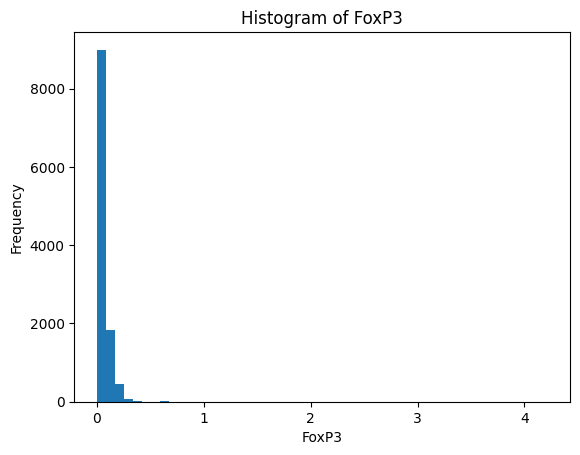

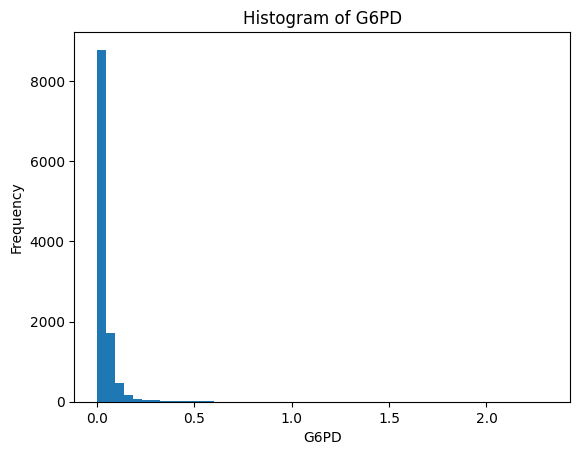

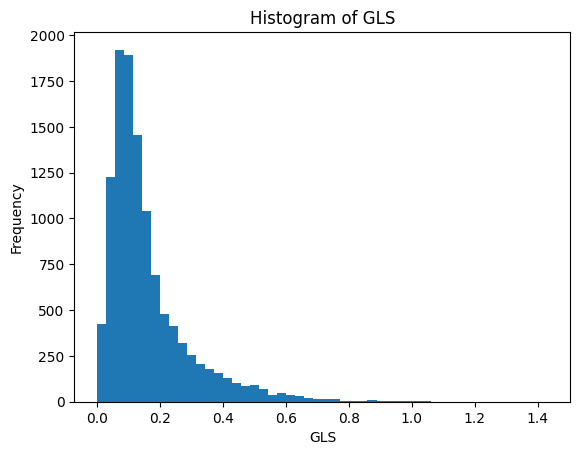

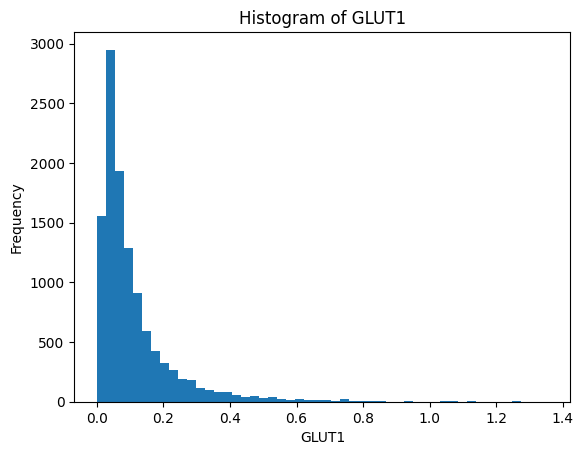

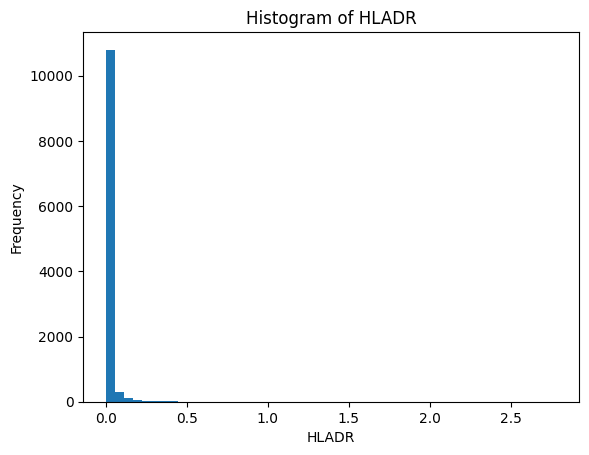

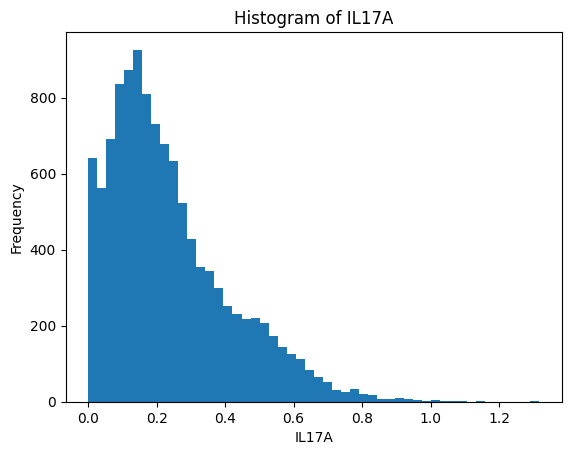

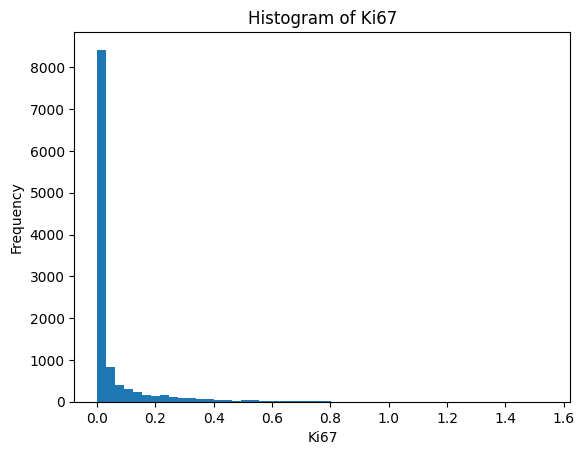

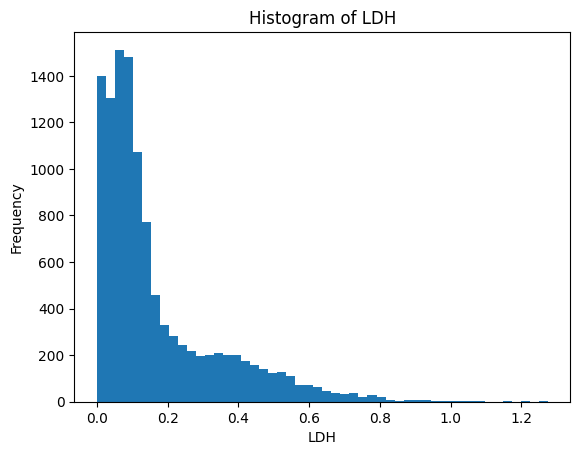

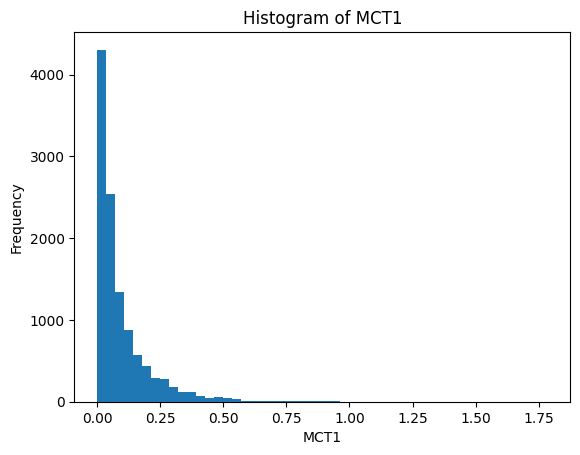

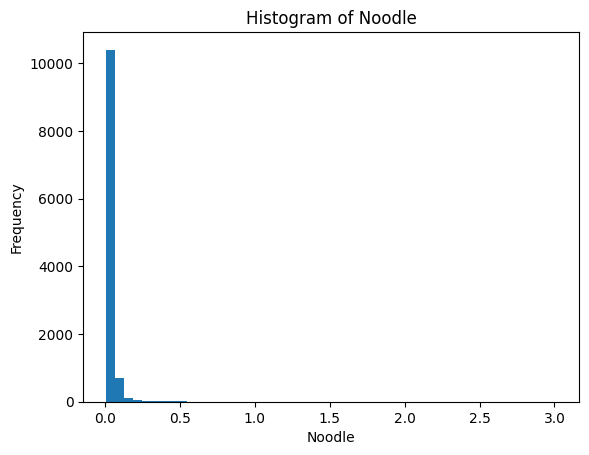

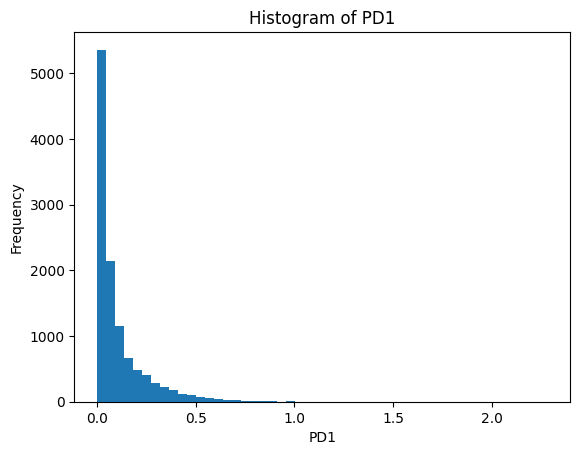

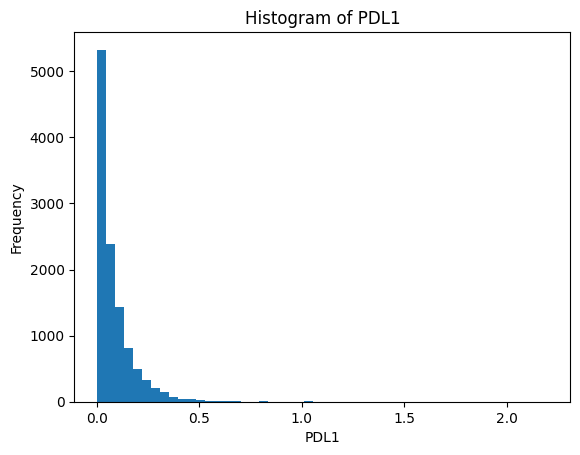

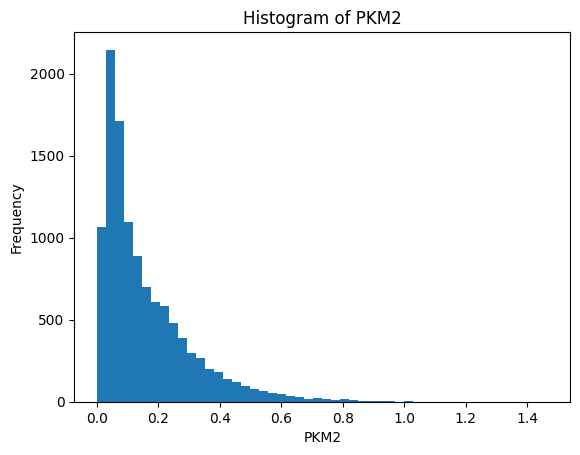

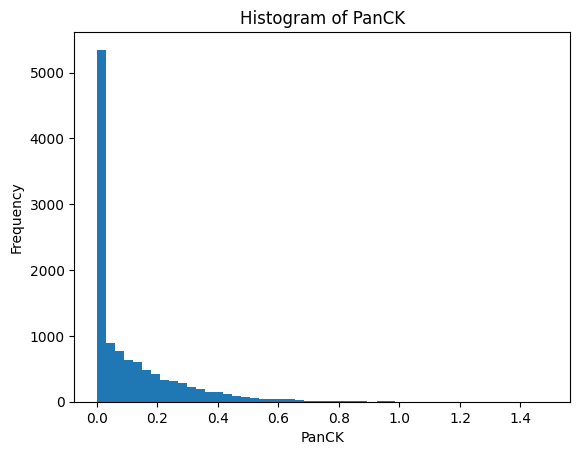

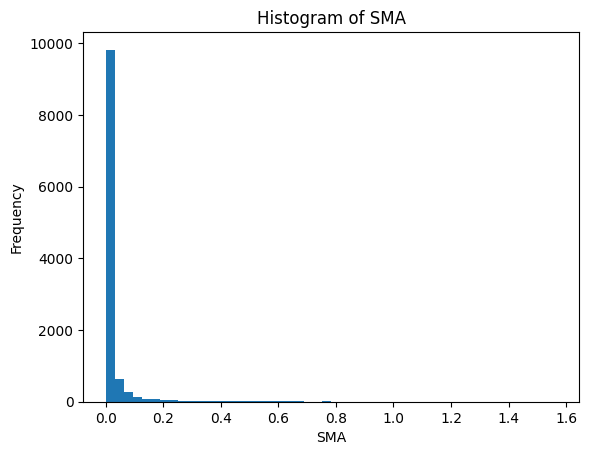

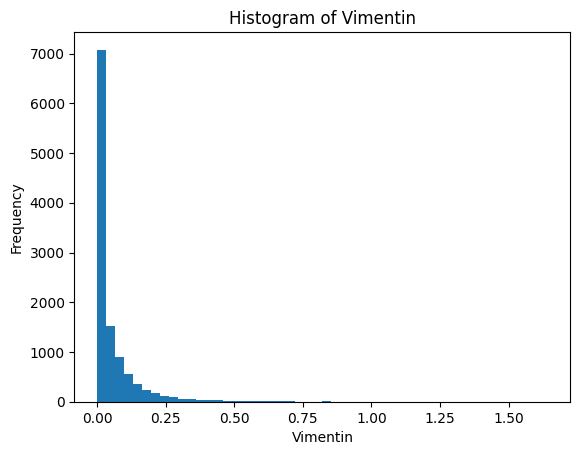

In [35]:
for column in channel_columns:
    plt.figure()  
    plt.hist(maps_perc_df[column], bins=50) 
    plt.title(f'Histogram of {column}')  
    plt.xlabel(column)  
    plt.ylabel('Frequency') 
    plt.show() 

MAPS method followed by the Greenbaum et al method:

In [36]:
maps_greenbaum_df= maps_df.copy()

maps_greenbaum_df=(maps_greenbaum_df[channel_columns]*100)
maps_greenbaum_df[channel_columns] = np.arcsinh(maps_greenbaum_df[channel_columns] * 5)

percentiles_maps_2 = maps_greenbaum_df[channel_columns].apply(lambda col: np.percentile(col, 99.9))
maps_greenbaum_df[channel_columns] = maps_greenbaum_df[channel_columns].divide(percentiles_maps_2)

In [41]:
maps_greenbaum_df.to_csv('maps_greenbaum_df.csv')

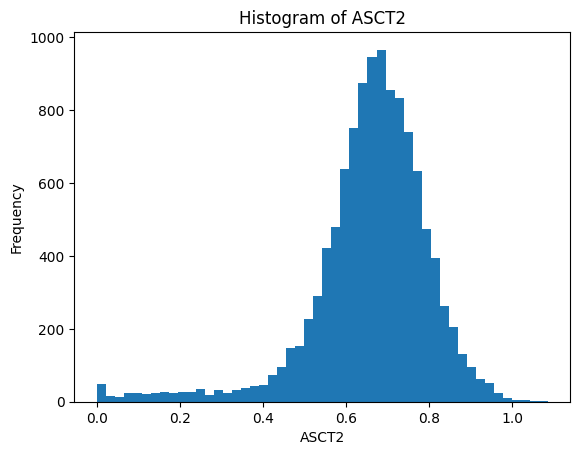

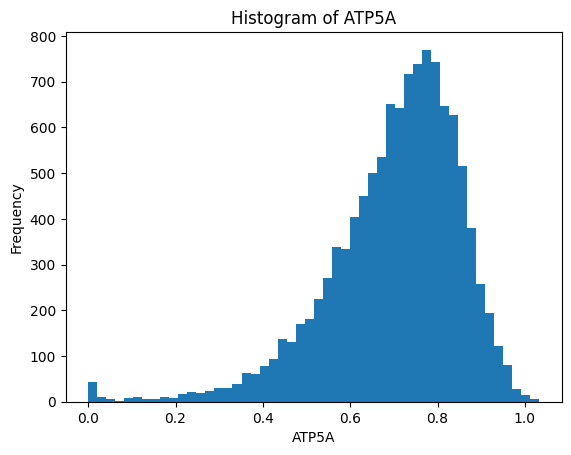

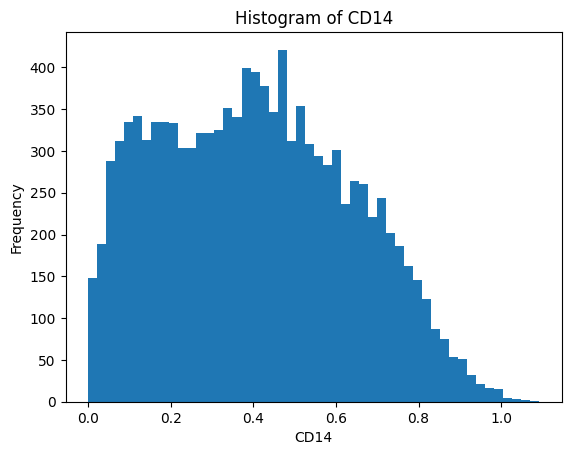

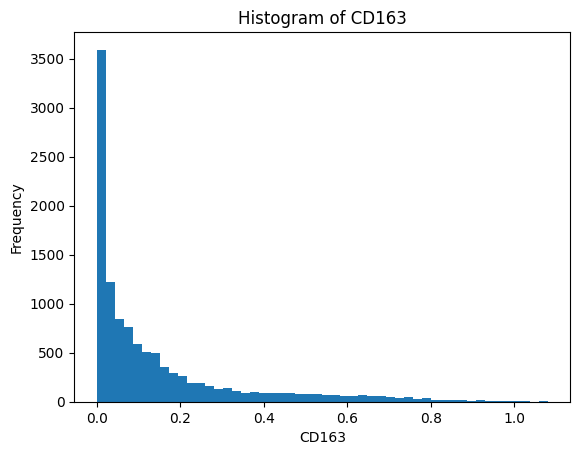

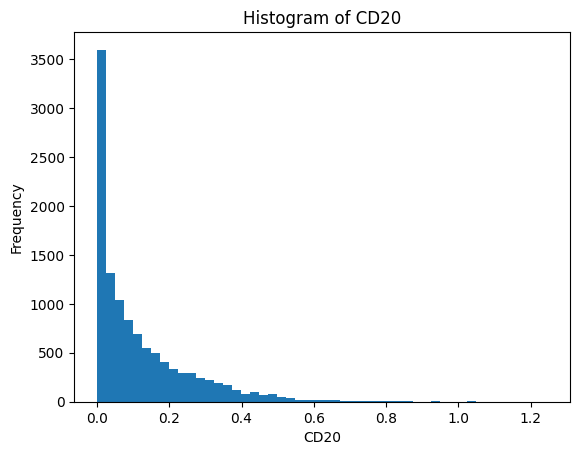

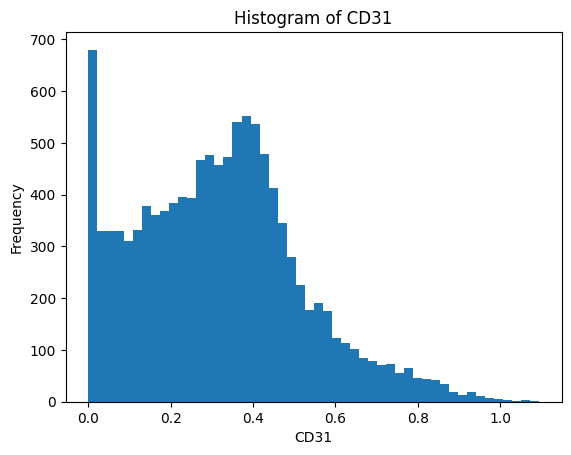

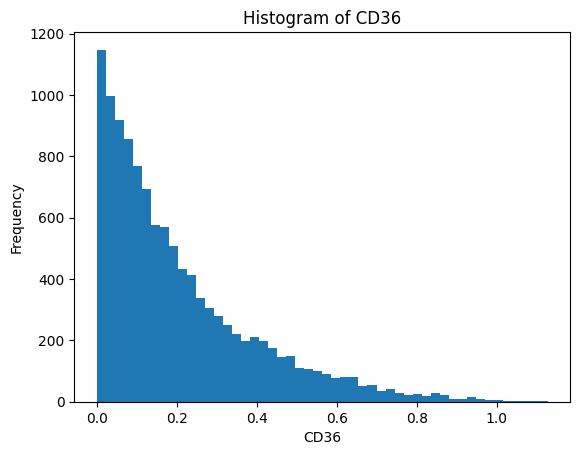

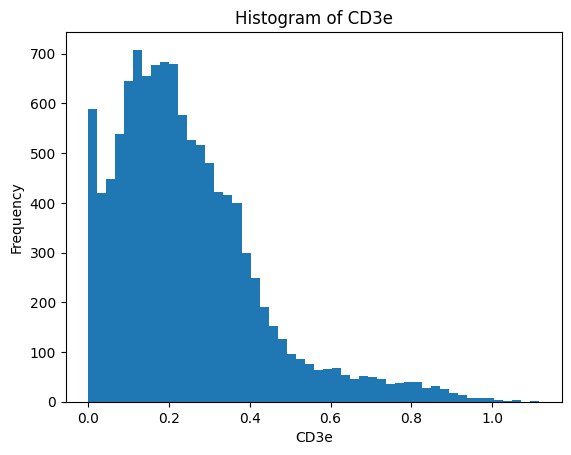

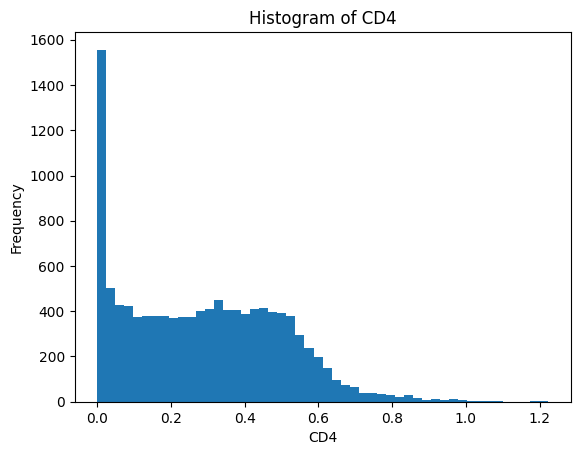

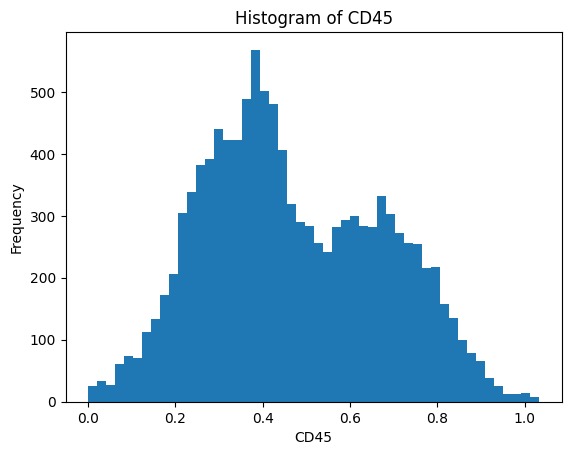

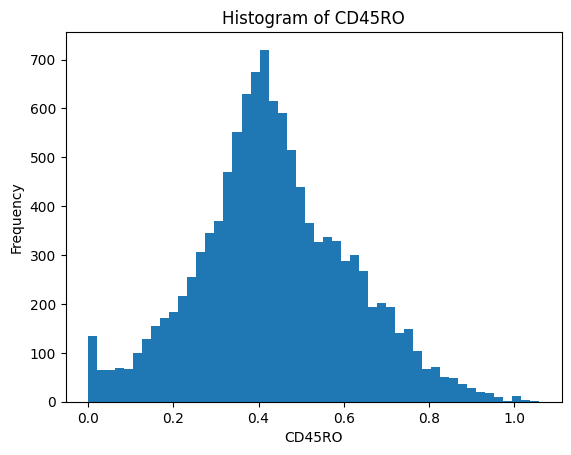

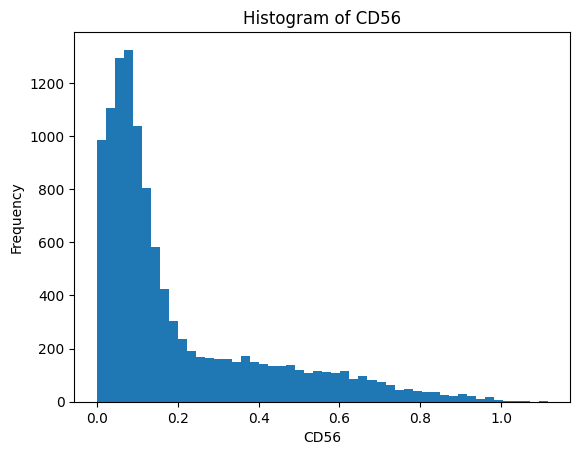

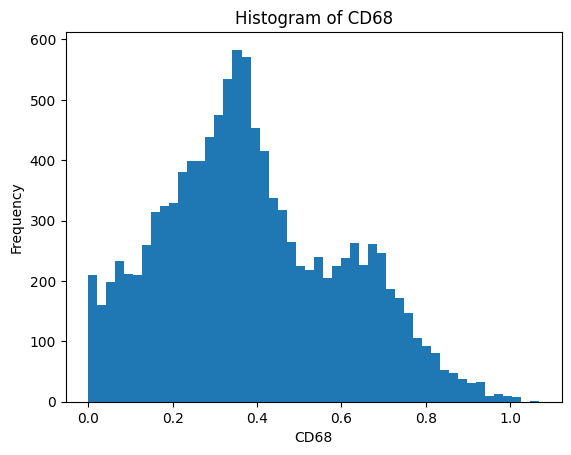

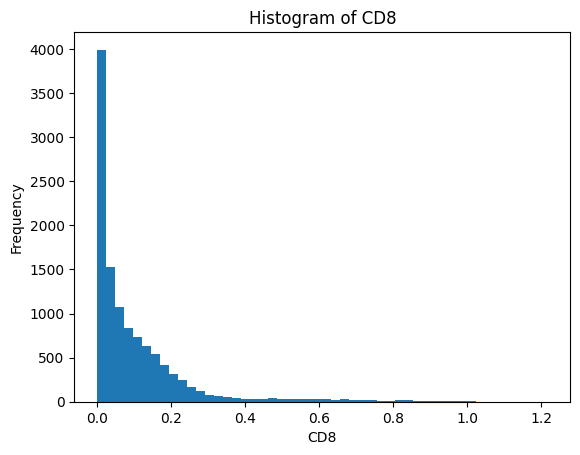

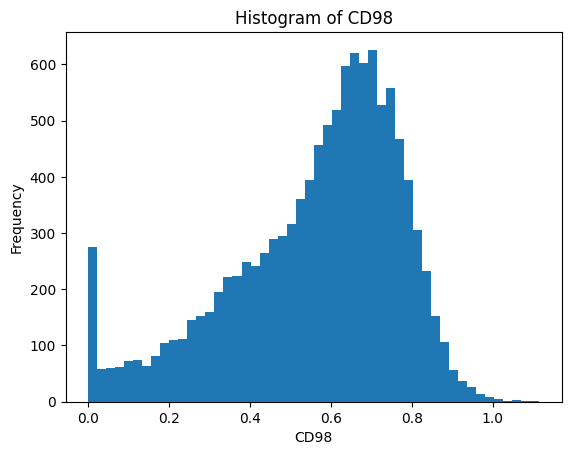

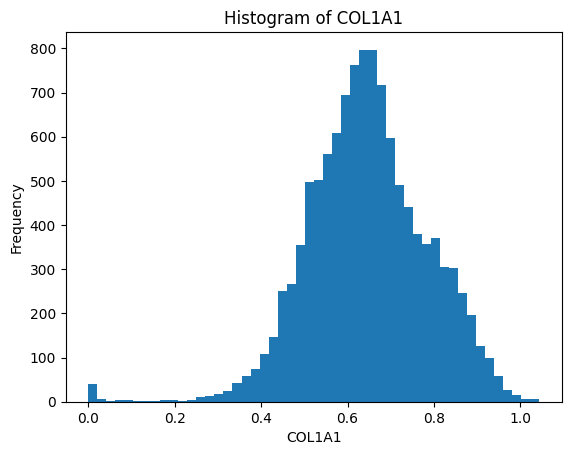

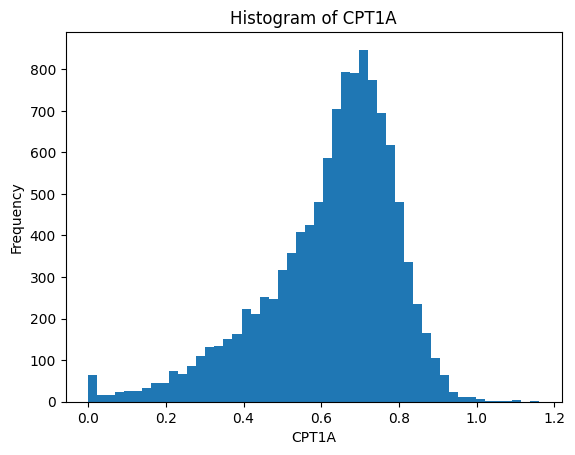

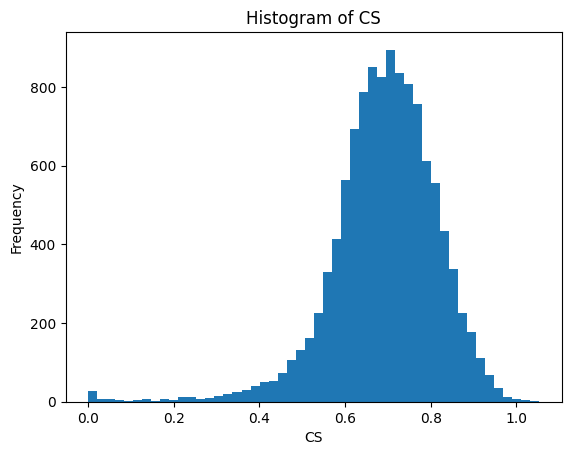

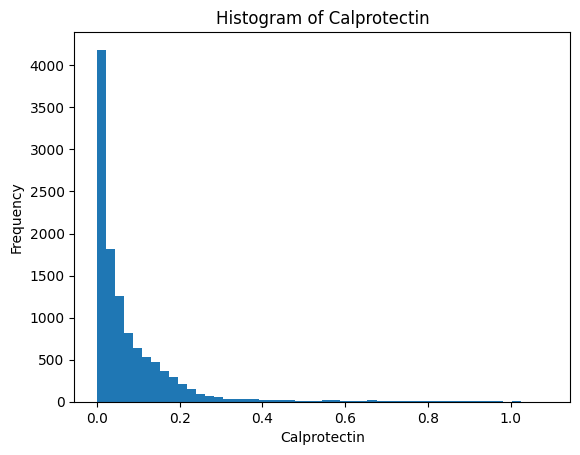

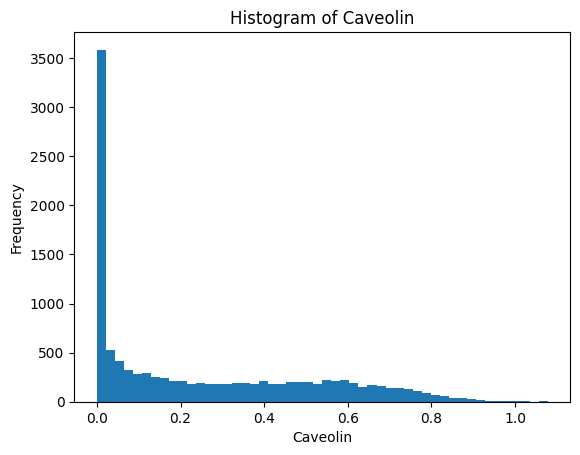

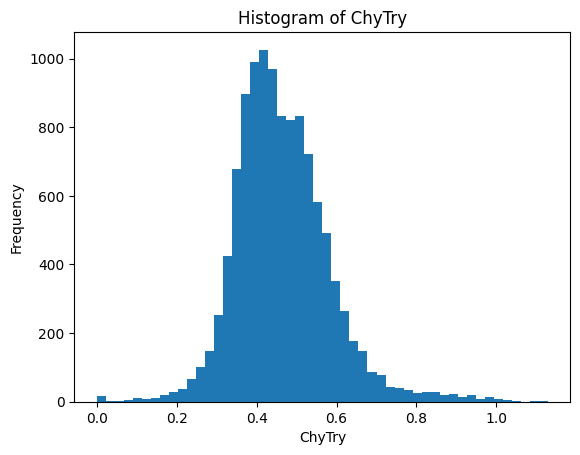

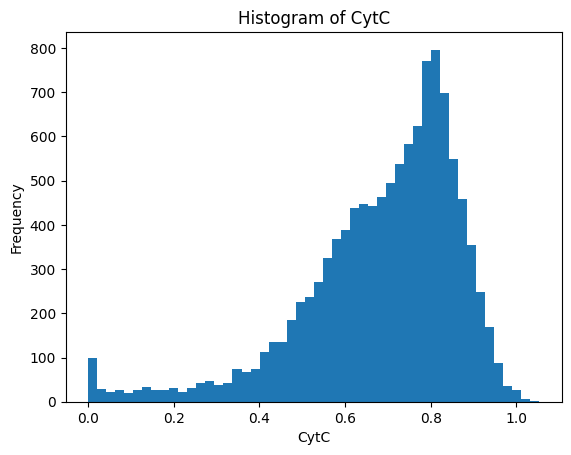

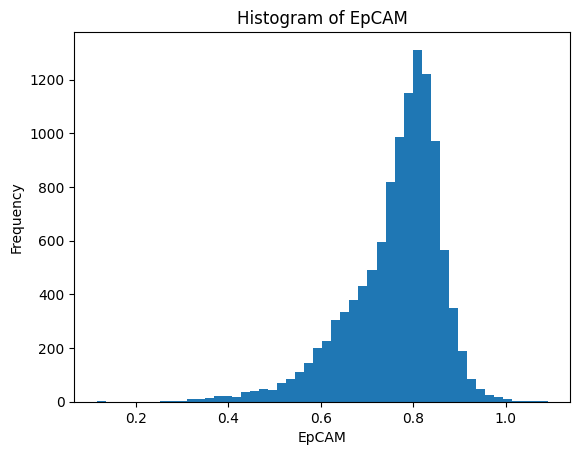

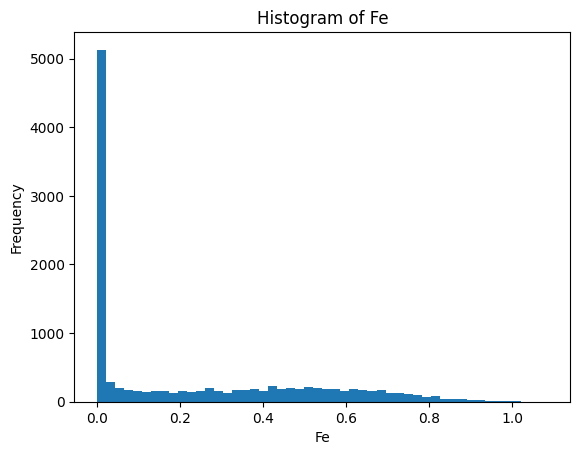

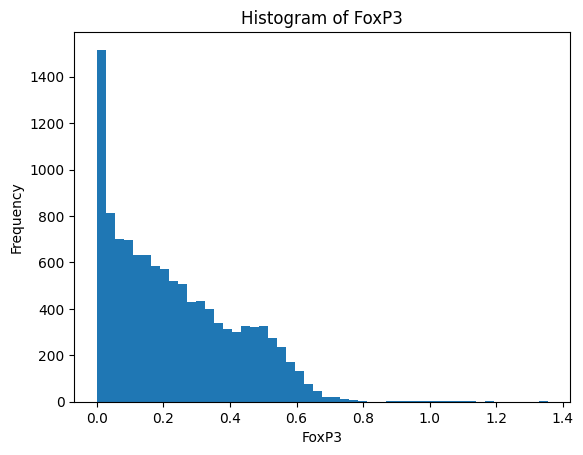

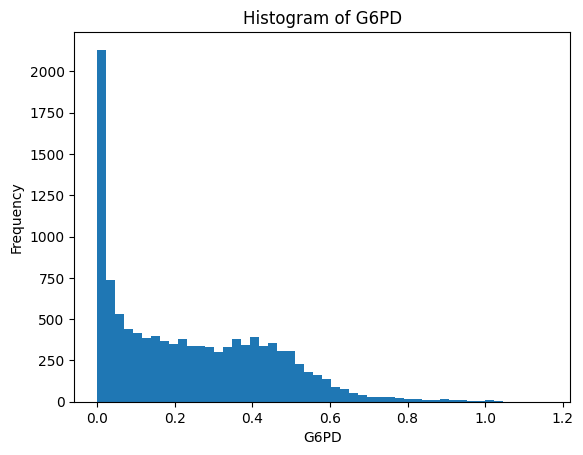

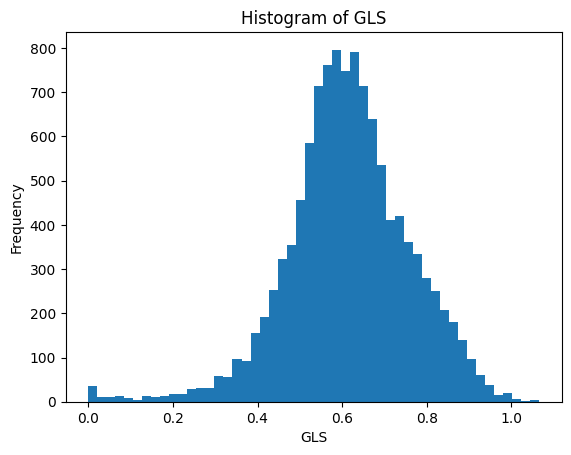

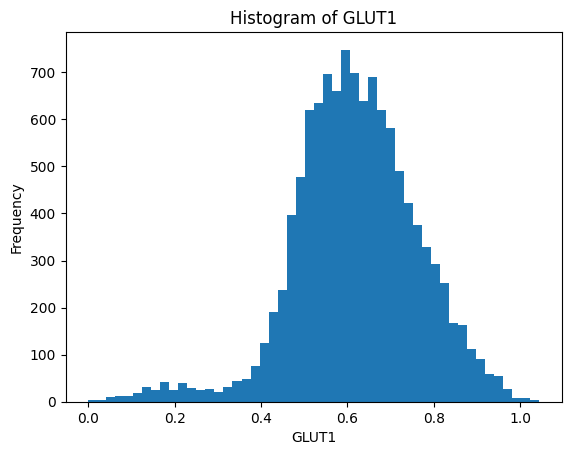

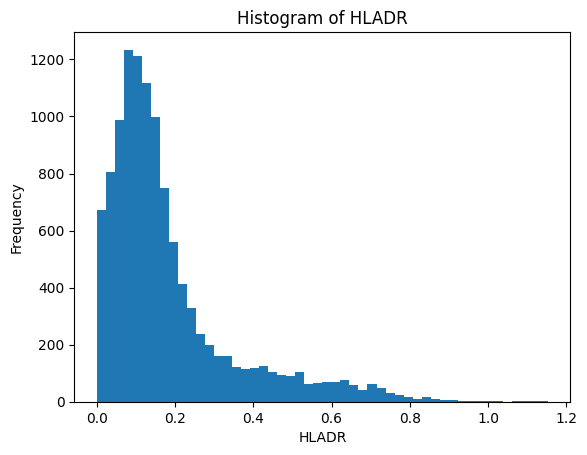

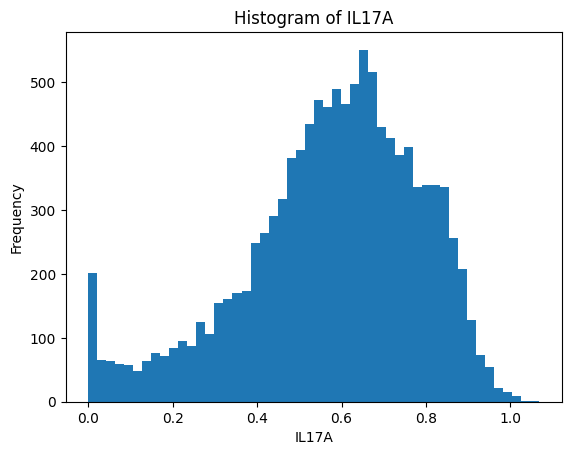

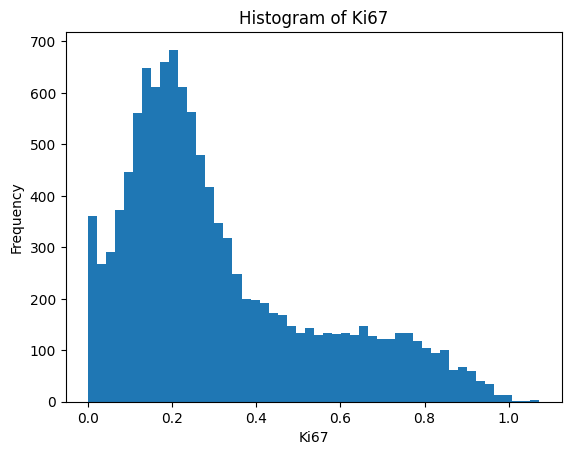

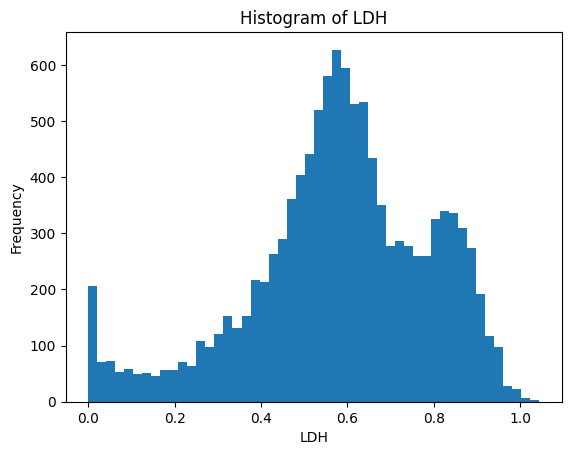

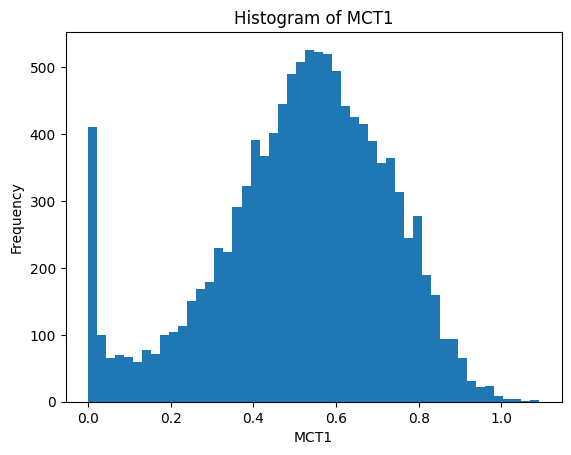

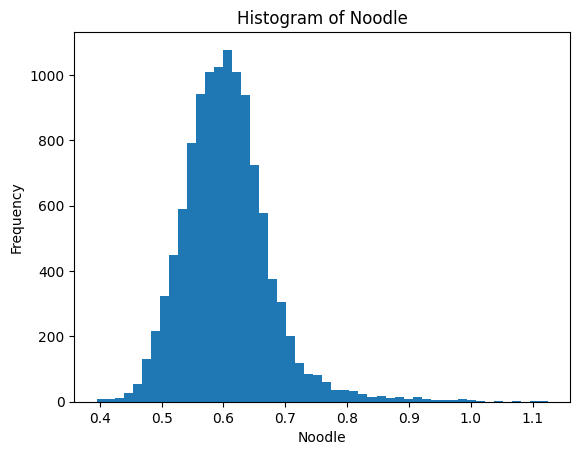

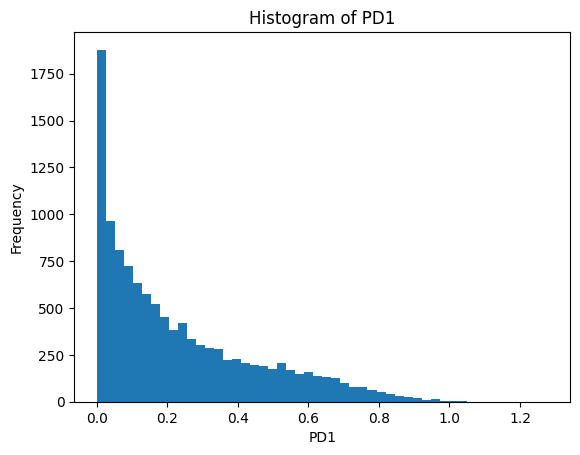

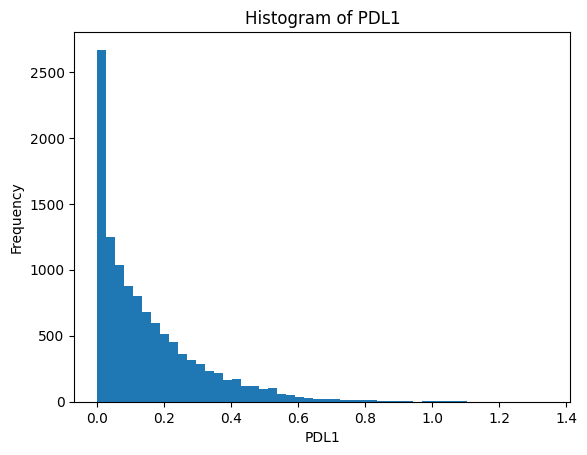

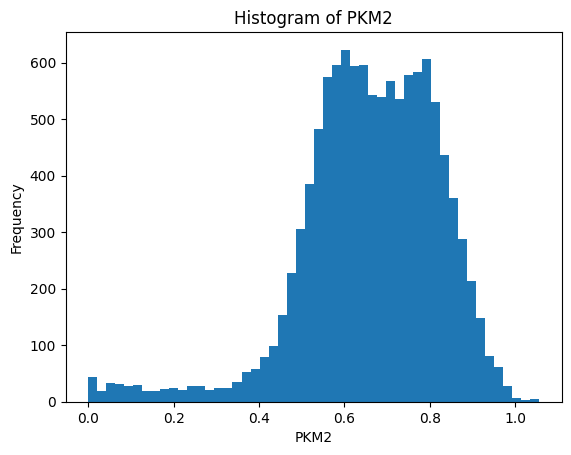

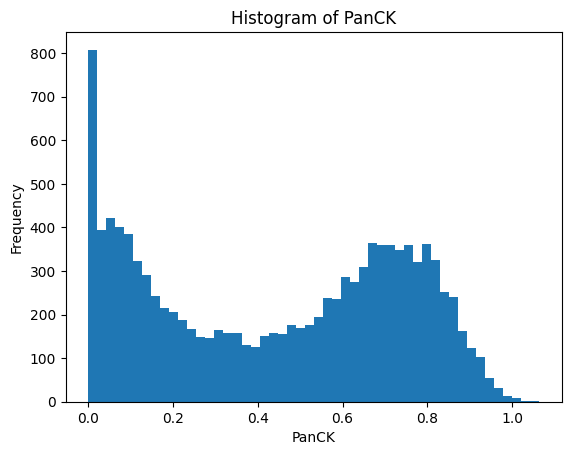

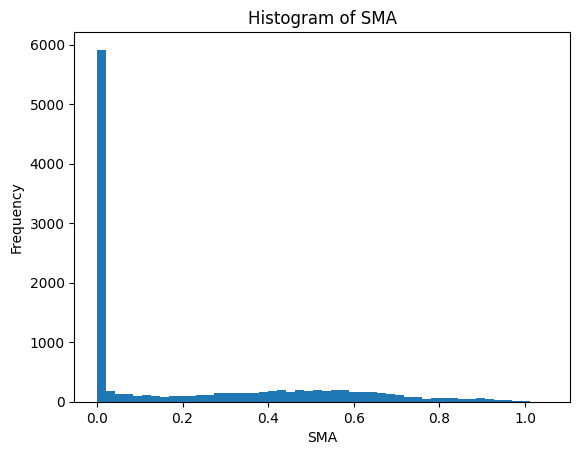

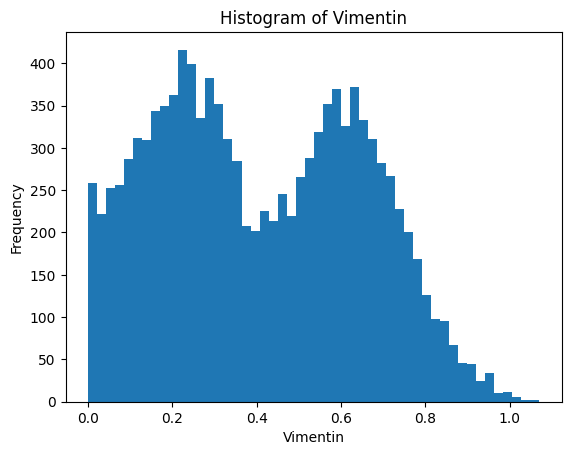

In [37]:
for column in channel_columns:
    plt.figure()  
    plt.hist(maps_greenbaum_df[column], bins=50) 
    plt.title(f'Histogram of {column}')  
    plt.xlabel(column)  
    plt.ylabel('Frequency') 
    plt.show() 